## Value 

#### Background

##### We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.

##### Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

#### Data Description

##### You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.

#### Goal

##### Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.

#### Success Metrics

##### Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

In [1]:
#Import the libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#importing functions and parameters files
from functions import preprocess_dataframe, plot_stock_data, candlestick_volume, draw_boxplots 
from functions import linear_regression_forecast, arima, sarimax_forecast, prophet_forecast
from functions import arima_monthly, sarimax_forecast_monthly, prophet_forecast_monthly
from functions import preprocess_and_resample, sarimax_recommend, lr_recommend

In [2]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
# Display the columns
russia.head()


Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02     294  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

In [3]:
russia.shape

(312, 7)

In [4]:
russia.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      312 non-null    object 
 1   Price     312 non-null    object 
 2   Open      312 non-null    object 
 3   High      312 non-null    object 
 4   Low       312 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 17.2+ KB


In [6]:
#Check index type
russia.index.dtype

dtype('int64')

In [7]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
# Display the columns
turkey.head()

Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2  2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
3  2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
4  2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

In [8]:
turkey.shape

(316, 7)

In [9]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
# Display the columns
egypt.head()

Date Price  Open  High   Low   Vol.  Change %
0  2021-03-31 00:00:00  3.75  3.74  3.82  3.71  1.57M    0.0054
1  2021-03-30 00:00:00  3.73  3.71  3.76  3.67  3.43M    0.0081
2  2021-03-29 00:00:00   3.7  3.69  3.73  3.68  1.25M   -0.0027
3  2021-03-28 00:00:00  3.71  3.76  3.76  3.68  2.34M    0.0000
4  2021-03-25 00:00:00  3.71  3.62  3.78  3.59  2.50M    0.0137

In [10]:
egypt.shape

(306, 7)

In [11]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
# Display the columns
brazil.head()

Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00   10.2  10.35   10.4  10.12   7.77M   -0.0154
1  2021-03-30 00:00:00  10.36  10.41  10.62   10.3   9.93M   -0.0105
2  2021-03-29 00:00:00  10.47   9.85   10.5   9.81  22.04M    0.0651
3  2021-03-26 00:00:00   9.83    9.8   9.94    9.7   5.11M    0.0031
4  2021-03-25 00:00:00    9.8  10.01  10.01   9.66   8.88M   -0.0151

In [12]:
brazil.shape

(310, 7)

In [13]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
# Display the columns
argentina.head()

Date  Price   Open   High    Low     Vol.  Change %
0  2021-03-31 00:00:00  85.15   86.5   88.1  85.15  564.30K   -0.0110
1  2021-03-30 00:00:00   86.1  85.15  86.75   84.6  141.40K    0.0129
2  2021-03-29 00:00:00     85     80     86     79  371.22K    0.0385
3  2021-03-26 00:00:00  81.85     84   84.6   80.7  462.55K   -0.0209
4  2021-03-25 00:00:00   83.6   85.2   87.3   82.1  389.78K   -0.0313

In [14]:
argentina.shape

(301, 7)

In [15]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
# Display the columns
colombia.head()

Date Price  Open  High   Low     Vol.  Change %
0  2021-03-31 00:00:00  5150  5100  5170  5100  212.44K    0.0098
1  2021-03-30 00:00:00  5100  5010  5100  5010  583.70K    0.0109
2  2021-03-29 00:00:00  5045  5020  5045  5015  117.54K    0.0050
3  2021-03-26 00:00:00  5020  5085  5085  4980  203.46K   -0.0020
4  2021-03-25 00:00:00  5030  5035  5045  4950  317.06K    0.0010

In [16]:
colombia.shape

(304, 7)

In [17]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
# Display the columns
safrica.head()

Date  Price   Open   High    Low   Vol.  Change %
0  2021-03-31 00:00:00  27373  26980  27526  26657  2.49M    0.0177
1  2021-03-30 00:00:00  26898  26766  27443  26360  3.02M   -0.0030
2  2021-03-29 00:00:00  26980  27800  28174  26614  4.44M   -0.0201
3  2021-03-26 00:00:00  27533  27083  28006  26728  3.36M    0.0365
4  2021-03-25 00:00:00  26564  25954  27128  25954  2.83M    0.0255

In [18]:
safrica.shape

(315, 7)

In [19]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
# Display the columns
skorea.head()

Date  Price   Open   High    Low   Vol.  Change %
0  2021-03-31 00:00:00  13650  13700  13750  13450  0.19K    0.0000
1  2021-03-30 00:00:00  13650  13850  14200  13050  3.17M    0.0074
2  2021-03-29 00:00:00  13550  12500  13800  12500  0.20K    0.1107
3  2021-03-28 00:00:00  12200  12200  12200  12200      -    0.0000
4  2021-03-26 00:00:00  12200  11500  12300  11350  2.34M    0.0796

In [20]:
skorea.shape

(342, 7)

##### Data Exploration

##### We will convert the volume column to millions and also add a year and a month column for more analysis.

In [21]:
russia=preprocess_dataframe(russia)
russia.head()

Date   Price    Open    High     Low  Change %  Volume (M)  Year  \
0 2020-01-03  255.00  255.99  258.19   253.7    0.0010       35.85  2020   
1 2020-01-06  253.90  254.75  254.84   251.4   -0.0043       22.35  2020   
2 2020-01-08  259.15  253.57  259.15  253.03    0.0207       40.82  2020   
3 2020-01-09  257.99   259.4  261.76  257.01   -0.0045       38.33  2020   
4 2020-01-10  258.19  257.86  259.25  256.88    0.0008       18.85  2020   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1

In [22]:
#Do the same for all dataframes
turkey = preprocess_dataframe(turkey)
turkey.head()

Date  Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  20.38  20.42  20.44  20.24    0.0030        2.53  2020      1
1 2020-01-03  20.30   20.3  20.44  19.97   -0.0039        3.31  2020      1
2 2020-01-06  20.08  20.34  20.34  19.97   -0.0108        1.94  2020      1
3 2020-01-07  19.93  20.22  20.28  19.92   -0.0075        2.89  2020      1
4 2020-01-08  19.94  19.89  19.95  19.66    0.0005        2.79  2020      1

In [23]:
egypt = preprocess_dataframe(egypt)
egypt.head()

Date  Price  Open  High   Low  Change %  Volume (M)  Year  Month
0 2020-01-02   4.81  4.81  4.87  4.78   -0.0021    0.000242  2020      1
1 2020-01-05   4.41   4.7   4.7  4.33   -0.0832    3.760000  2020      1
2 2020-01-06   4.28  4.16  4.44  4.12   -0.0295    2.520000  2020      1
3 2020-01-08   4.41  4.19  4.59  4.15    0.0304    3.520000  2020      1
4 2020-01-09   4.62  4.55   4.7  4.55    0.0476    2.090000  2020      1

In [24]:
brazil = preprocess_dataframe(brazil)
brazil.head()

Date  Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  12.57  12.88  12.99  12.57   -0.0210        5.78  2020      1
1 2020-01-03  12.90  12.45  12.93  12.27    0.0263        4.88  2020      1
2 2020-01-06  12.89   12.9  12.91  12.57   -0.0008        4.17  2020      1
3 2020-01-07  13.48  13.03  13.48  13.03    0.0458        8.20  2020      1
4 2020-01-08  13.63   13.5  13.68  13.18    0.0111        6.18  2020      1

In [25]:
argentina = preprocess_dataframe(argentina)
argentina.head()

Date  Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  48.25  49.35   50.2  47.55   -0.0292    0.000878  2020      1
1 2020-01-03  48.80  48.25  49.45   46.5    0.0114    0.000595  2020      1
2 2020-01-06  48.50   48.4   48.7     47   -0.0061    0.000719  2020      1
3 2020-01-07  47.60  48.35     49   46.9   -0.0186    0.000902  2020      1
4 2020-01-08  46.50   47.5   47.5     46   -0.0231    1.180000  2020      1

In [26]:
colombia = preprocess_dataframe(colombia)
colombia.head()

Date   Price  Open  High   Low  Change %  Volume (M)  Year  Month
0 2020-01-02  7120.0  7300  7300  7120   -0.0247    0.000139  2020      1
1 2020-01-03  7000.0  7040  7100  6960   -0.0169    0.000471  2020      1
2 2020-01-07  6950.0  6950  6950  6850   -0.0071    0.000169  2020      1
3 2020-01-08  6880.0  6940  6950  6880   -0.0101    0.000085  2020      1
4 2020-01-09  6810.0  6880  6890  6800   -0.0102    0.000263  2020      1

In [27]:
safrica = preprocess_dataframe(safrica)
safrica.head()

Date    Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  14330.0  14525  14764  14325   -0.0015        2.01  2020      1
1 2020-01-03  14843.0  14700  14884  14360    0.0358        3.19  2020      1
2 2020-01-06  14620.0  14985  15045  14574   -0.0150        2.61  2020      1
3 2020-01-07  14500.0  14688  14688  13940   -0.0082        3.94  2020      1
4 2020-01-08  15290.0  14775  15465  14468    0.0545        6.24  2020      1

In [28]:
skorea = preprocess_dataframe(skorea)
skorea.head()


Date   Price  Open  High   Low  Change %  Volume (M)  Year  Month
0 2020-01-02  5850.0  5930  5980  5820   -0.0168    0.000240  2020      1
1 2020-01-03  5900.0  5870  5920  5830    0.0085    0.000230  2020      1
2 2020-01-06  5730.0  5890  5890  5680   -0.0288    0.000320  2020      1
3 2020-01-07  5690.0  5740  5770  5650   -0.0070    0.000304  2020      1
4 2020-01-08  5430.0  5640  5640  5390   -0.0457    0.000524  2020      1

##### Data Visualization

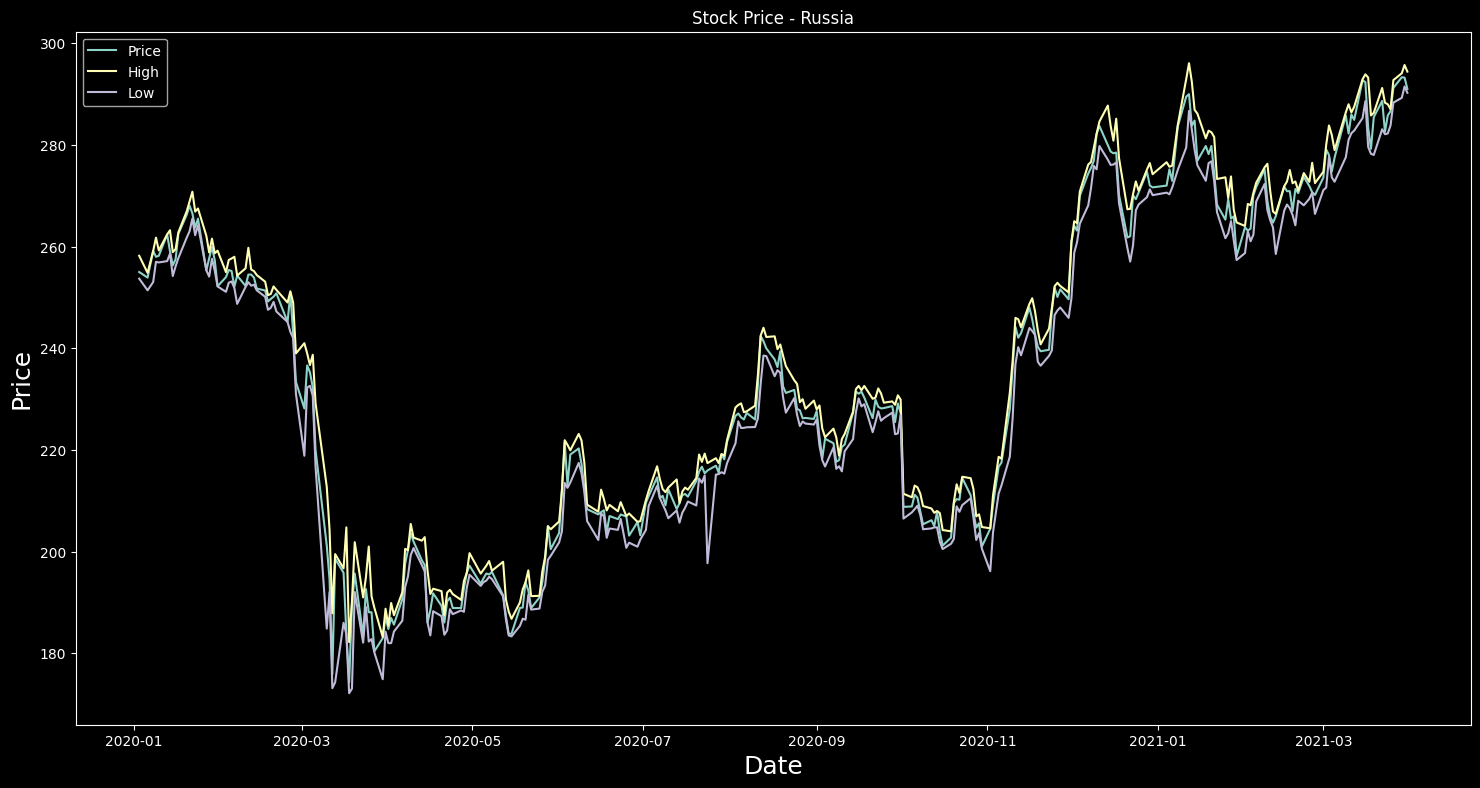

In [29]:
plot_stock_data(russia, "Russia")
candlestick_volume(russia, "Russia")

##### There doesn't seem to be any specific pattern in the Russia market other than the price has been trending up even since March 2020 which is when the COVID-19 pandemic started. The volume is highest around March 2020 and November 2020.

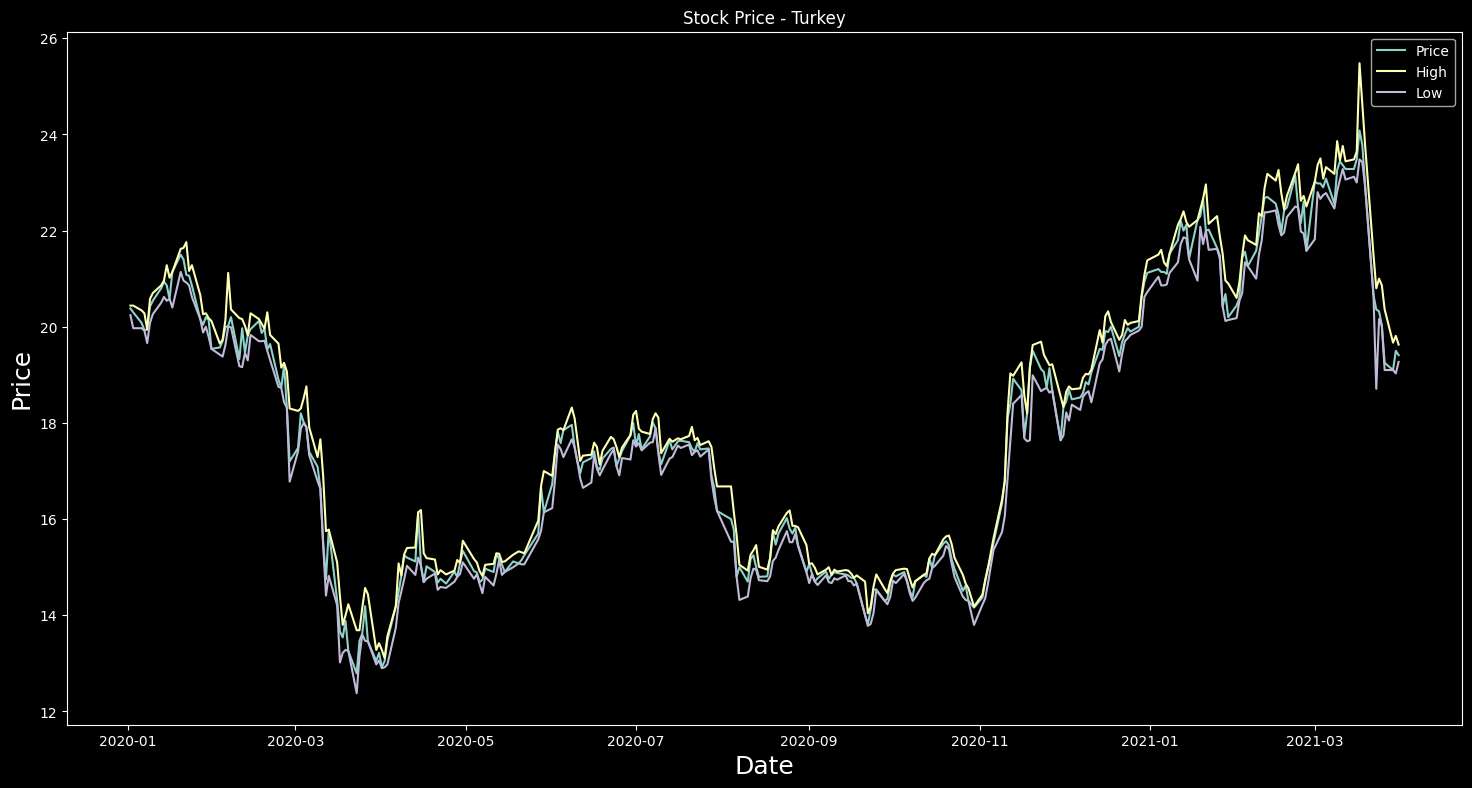

In [30]:
plot_stock_data(turkey, "Turkey")
candlestick_volume(turkey, "Turkey")

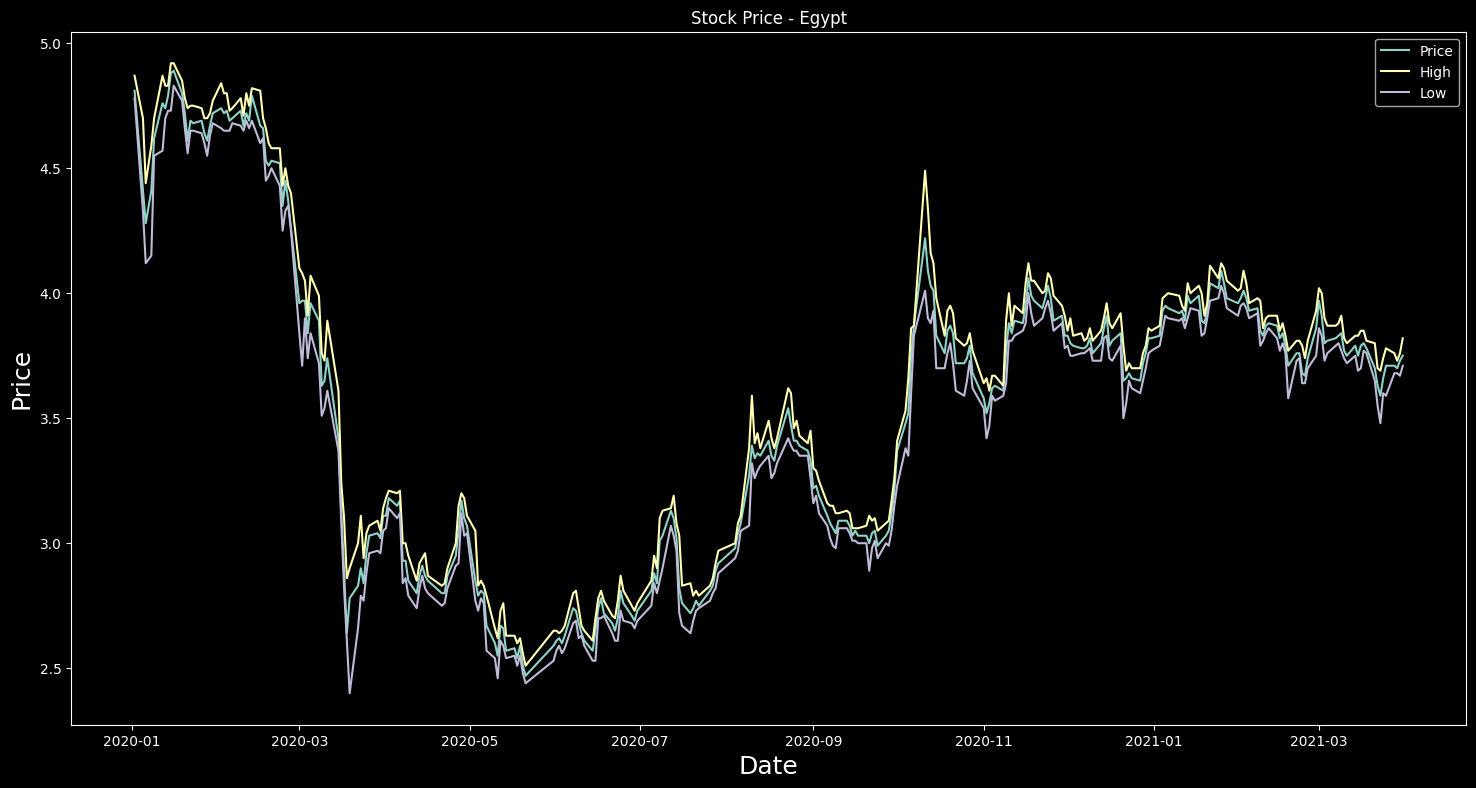

In [31]:
plot_stock_data(egypt, "Egypt")
candlestick_volume(egypt, "Egypt")

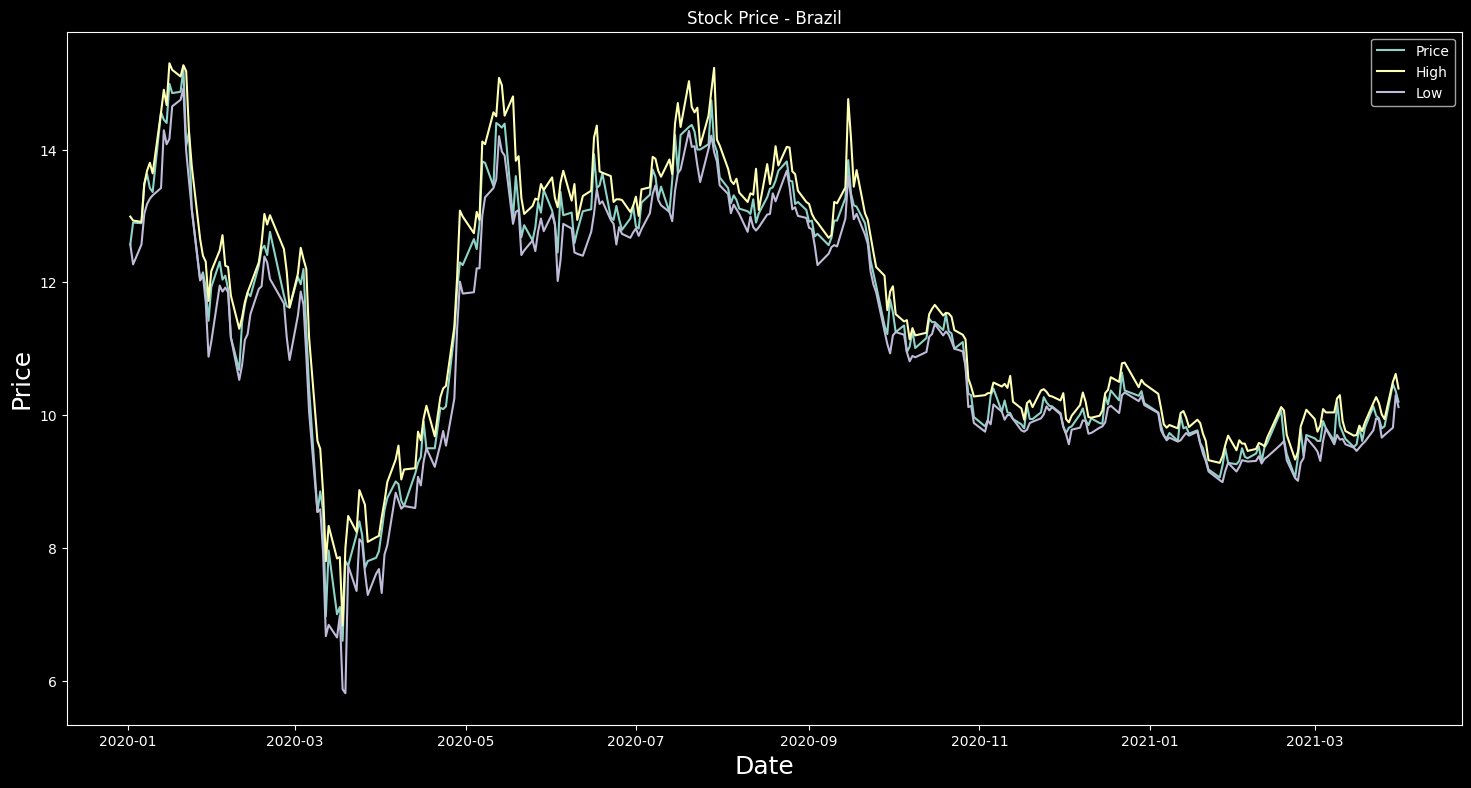

In [32]:
plot_stock_data(brazil, "Brazil")
candlestick_volume(brazil, "Brazil")

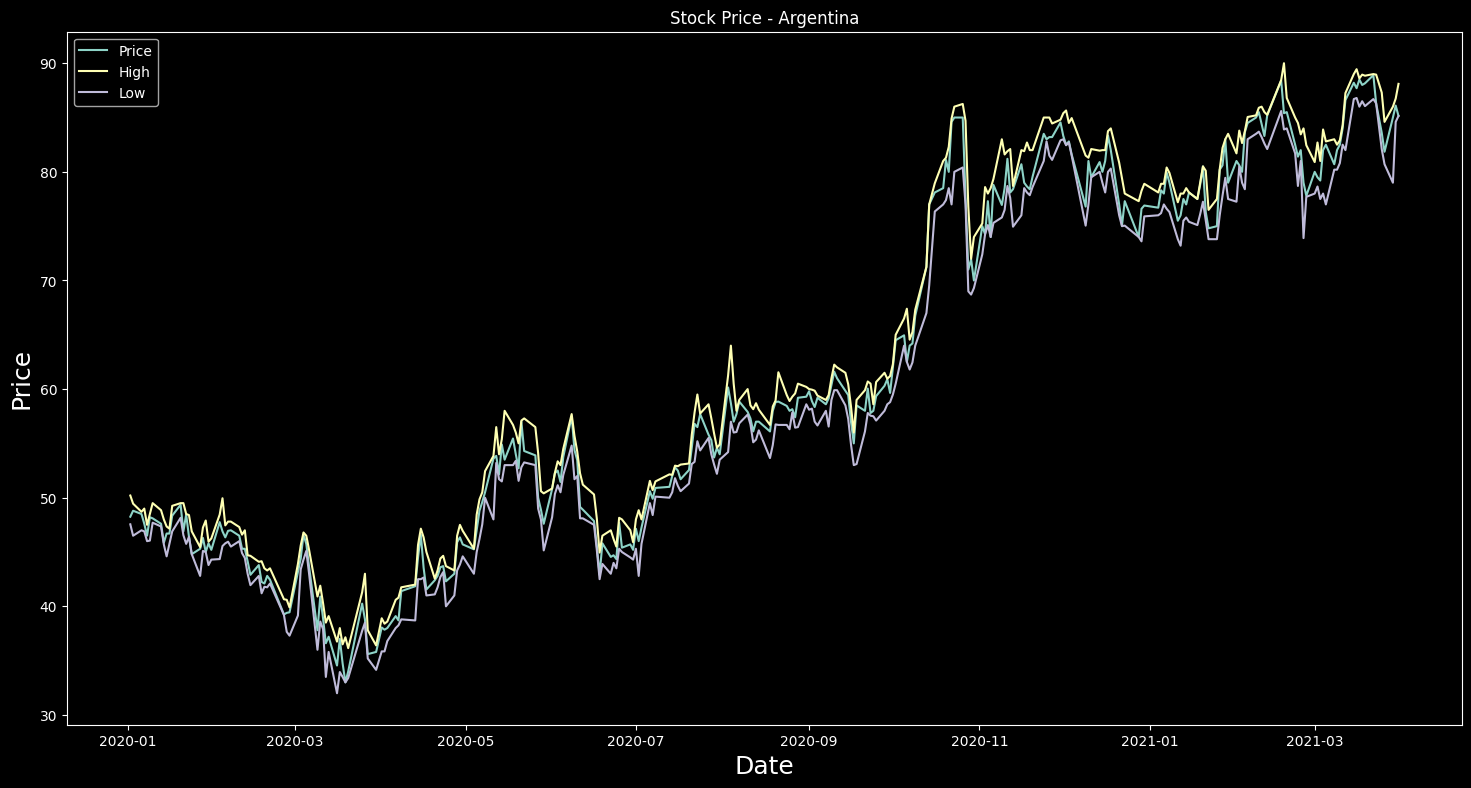

In [33]:
plot_stock_data(argentina, "Argentina")
candlestick_volume(argentina, "Argentina")

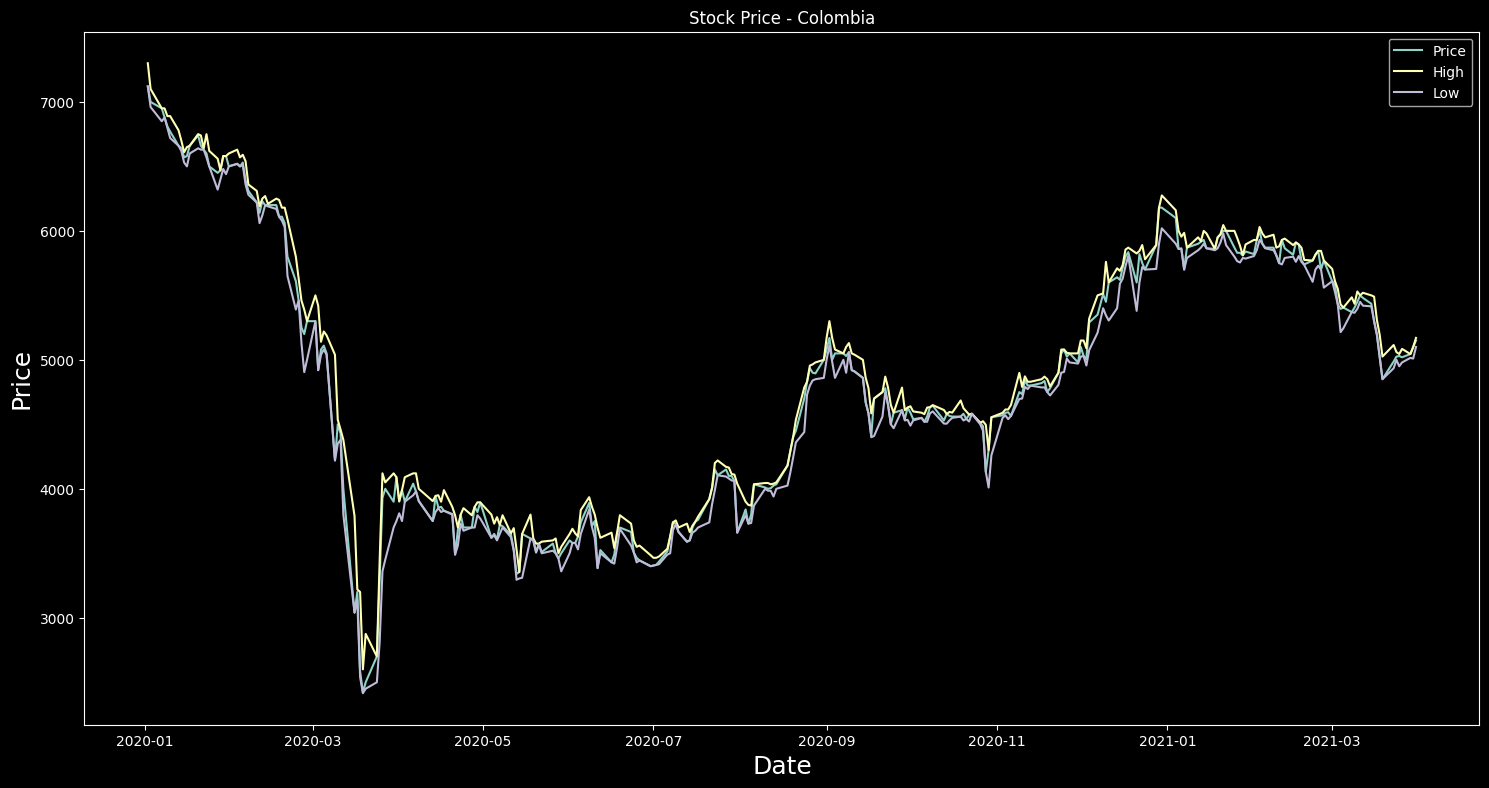

In [34]:
plot_stock_data(colombia, "Colombia")
candlestick_volume(colombia, "Colombia")

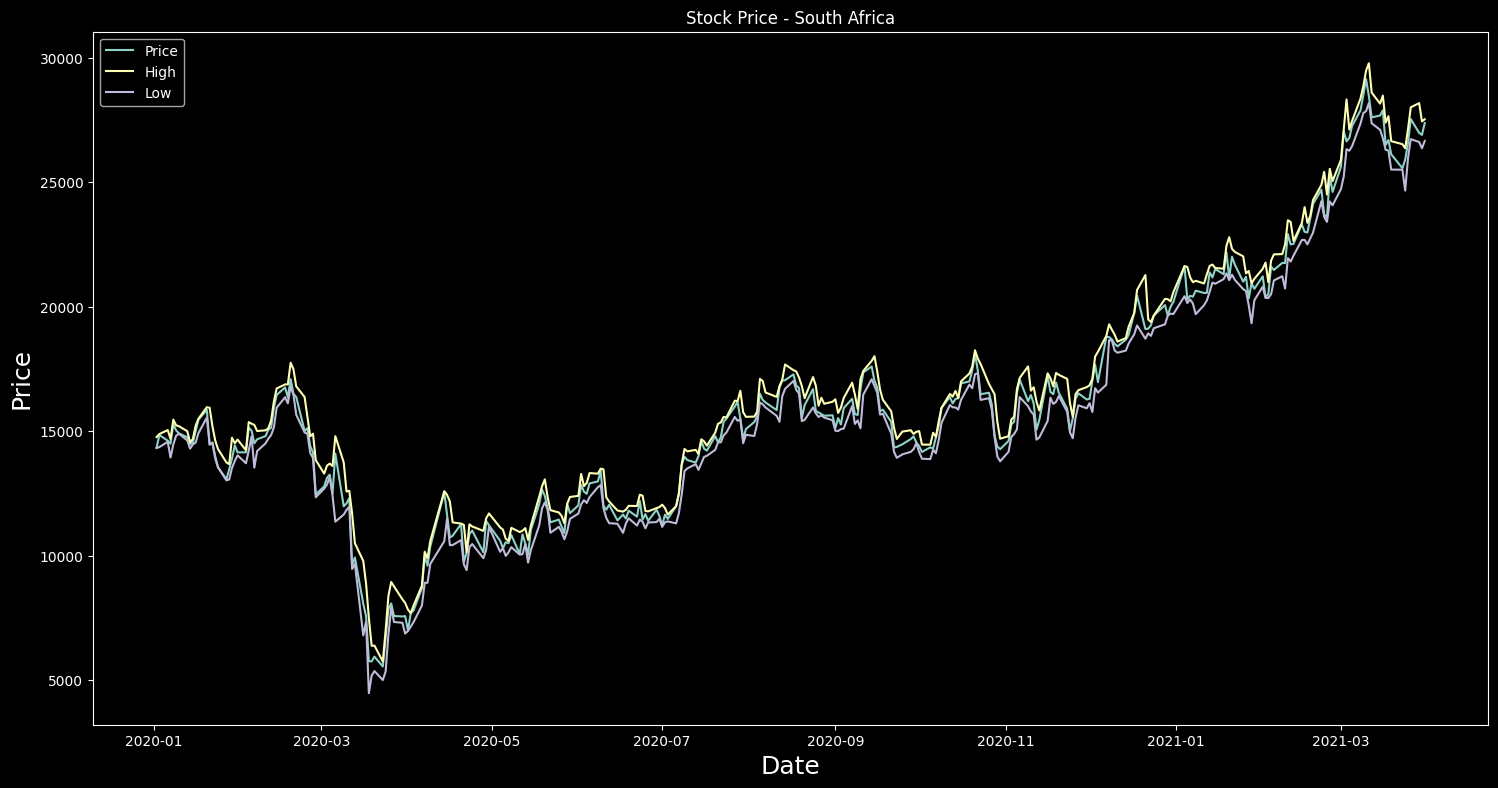

In [35]:
plot_stock_data(safrica, "South Africa")
candlestick_volume(safrica, "South Africa")

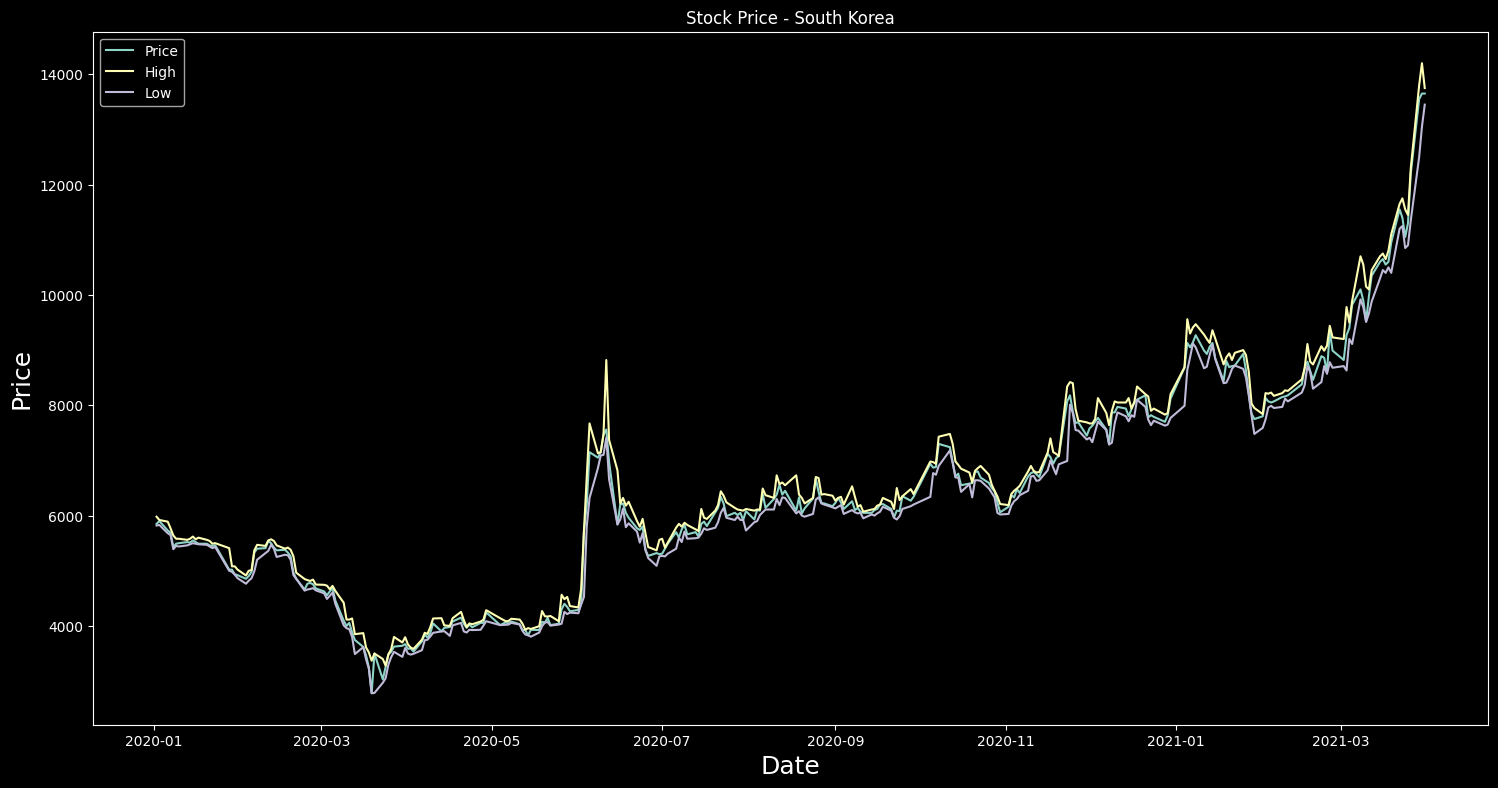

In [36]:
plot_stock_data(skorea, "South Korea")
candlestick_volume(skorea, "South Korea")

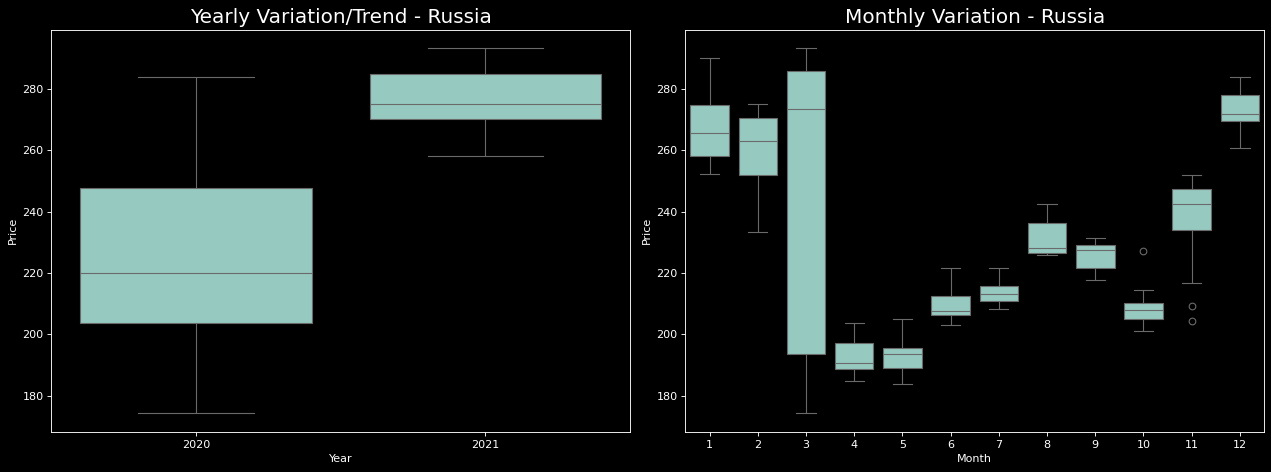

In [37]:
draw_boxplots(russia, "Russia")

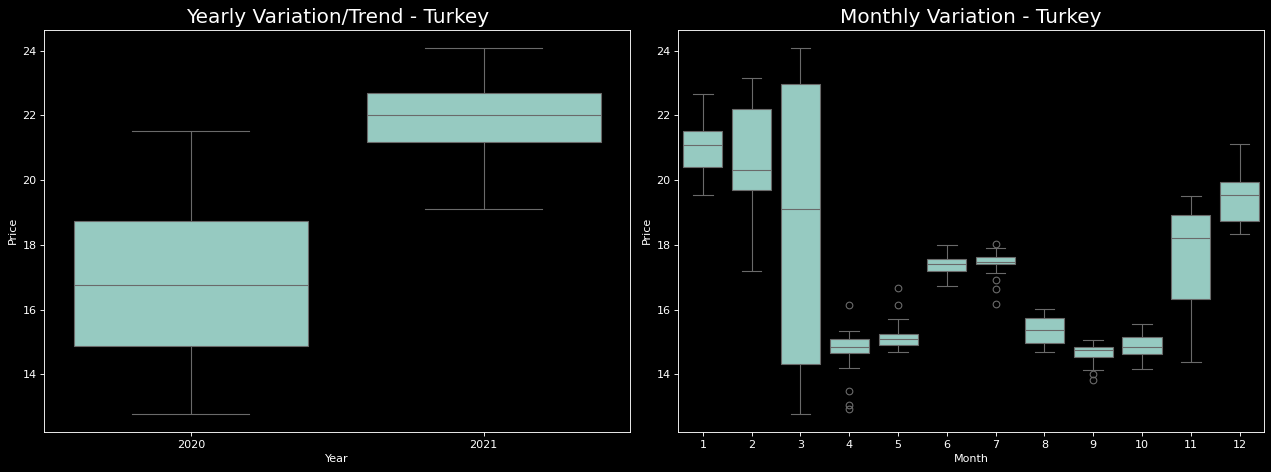

In [38]:
draw_boxplots(turkey, "Turkey")

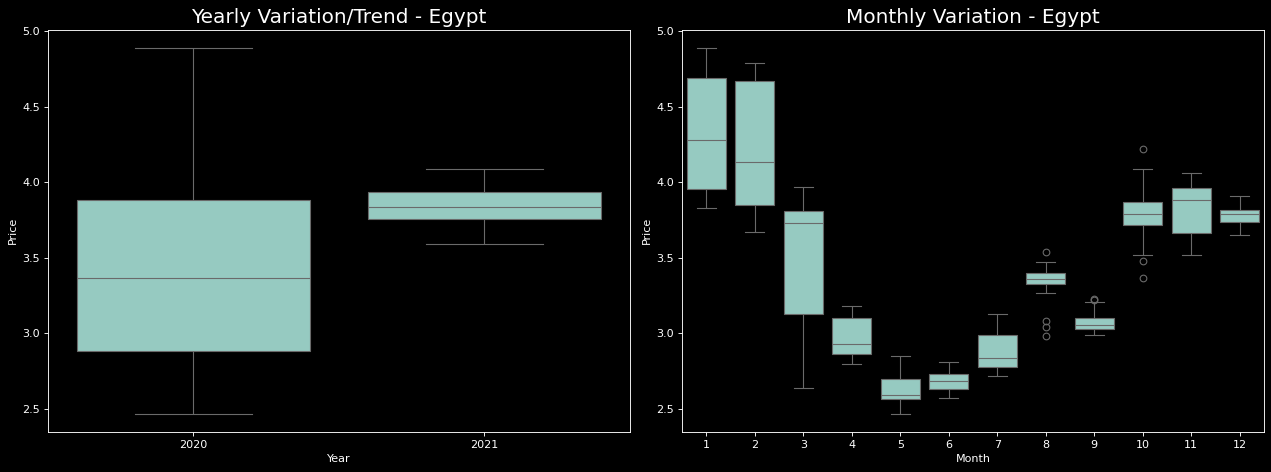

In [39]:
draw_boxplots(egypt, "Egypt")

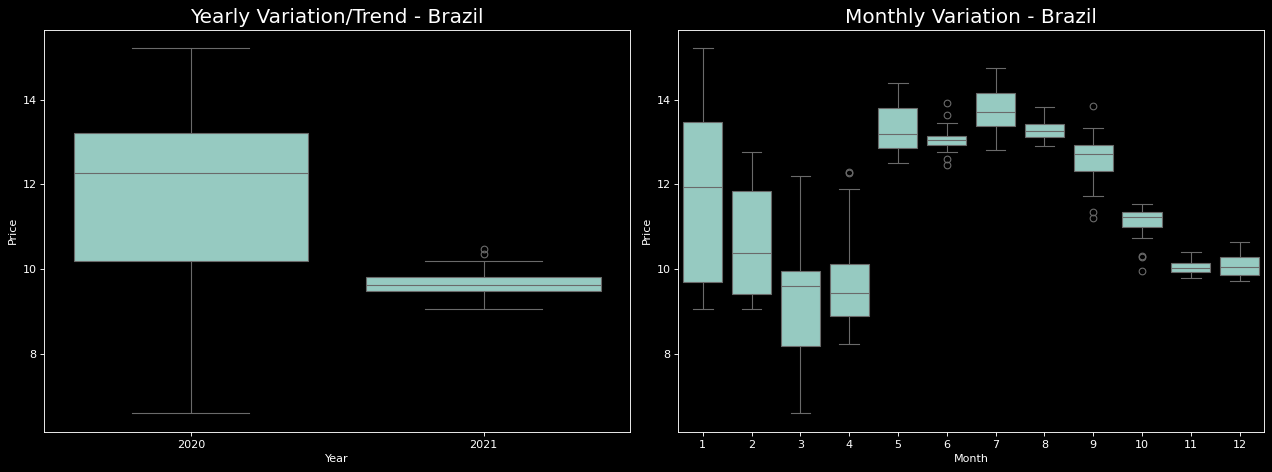

In [40]:
draw_boxplots(brazil, "Brazil")

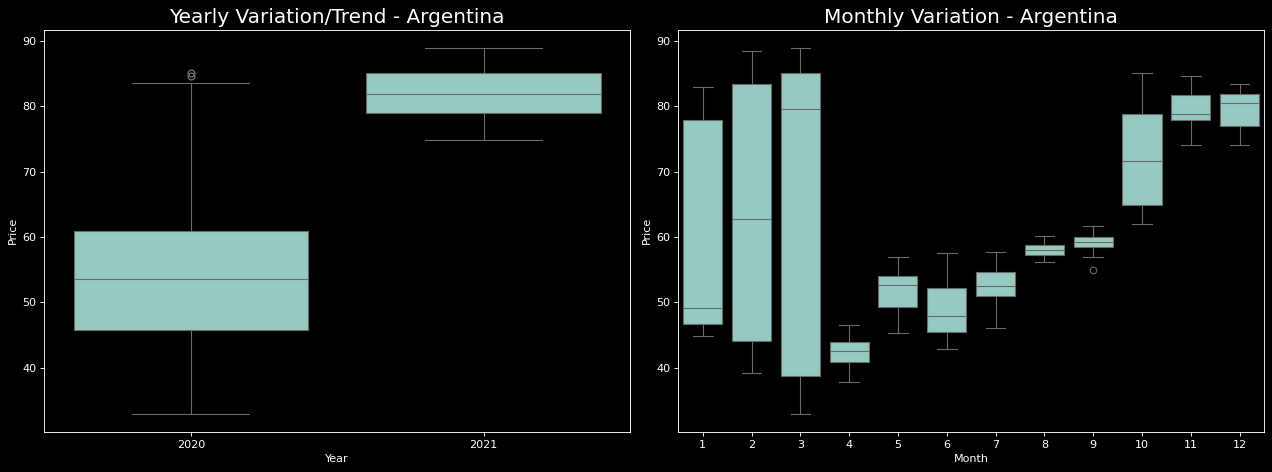

In [41]:
draw_boxplots(argentina, "Argentina")

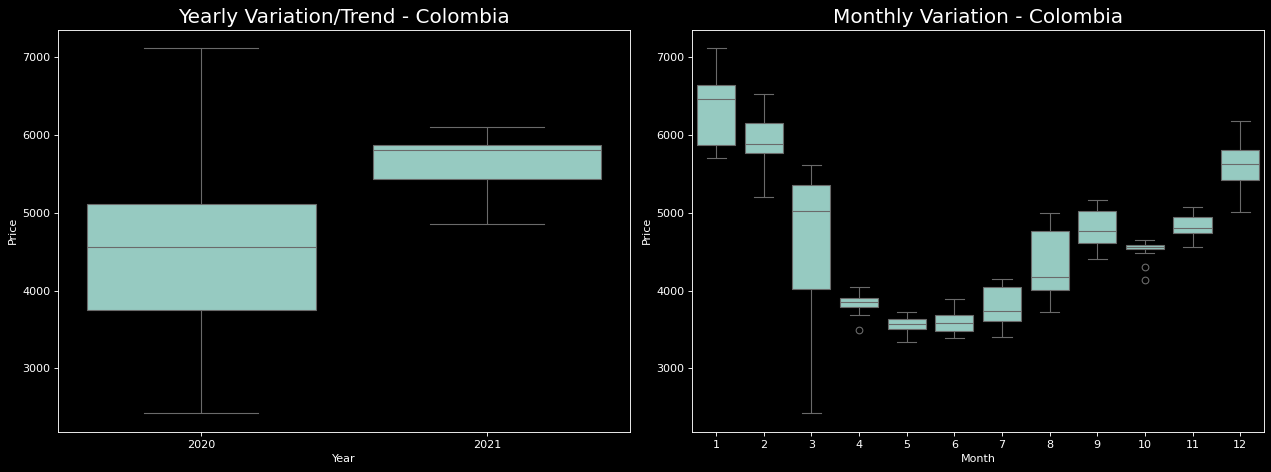

In [42]:
draw_boxplots(colombia, "Colombia")

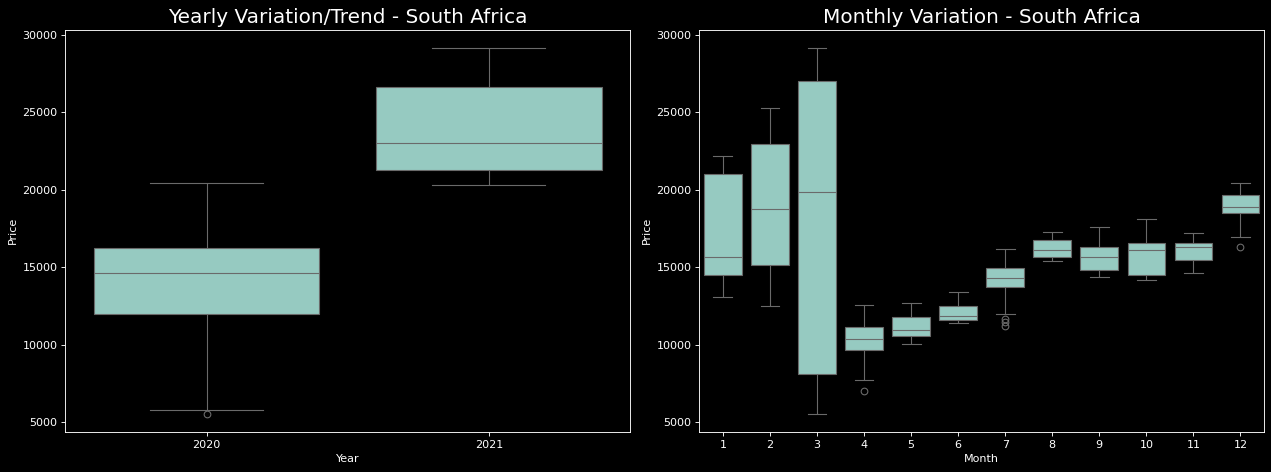

In [43]:
draw_boxplots(safrica, "South Africa")

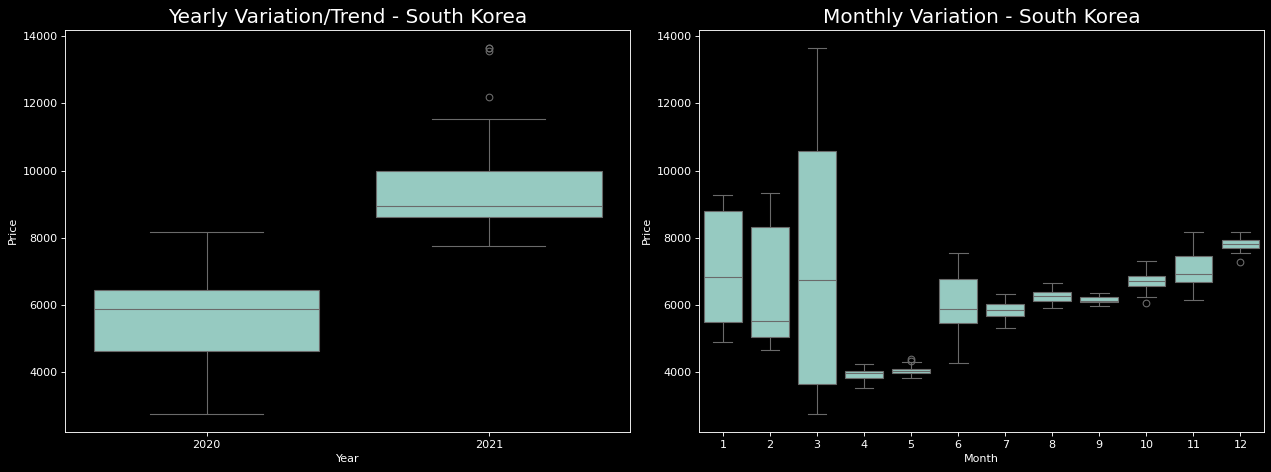

In [44]:
draw_boxplots(skorea, "South Korea")

##### Data Modeling

##### We will used different models (Linear Regression, ARIMA, SARIMAX, Prophet) in order to determine which is best in order to predict future prices.

##### We will use the Root Mean Squared (RMSE) and the mean absolute percentage erro (MAPE) in order to determine the goodness of fit. RMSE is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. MAPE expresses accurary as the ratio of the absolute value of the difference between actual and forecasted value divided by the actual value. The absolute value of this ratio is summed for every forecasted point in time and divided by the number of fitted points n.

##### Bollinger Bands are composed of three lines. One of the more common calculations uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation to that amount. The lower band is calculated by taking the middle band and subtracting twice the daily standard deviation.

##### A common approach when using Bollinger Bands® is to identify overbought or oversold market conditions. When the price of the asset breaks below the lower band of the Bollinger Bands, it suggests that prices have perhaps fallen too much and are due to bounce. Conversely, when the price breaks above the upper band, it indicates that the market may be overbought and due for a pullback.

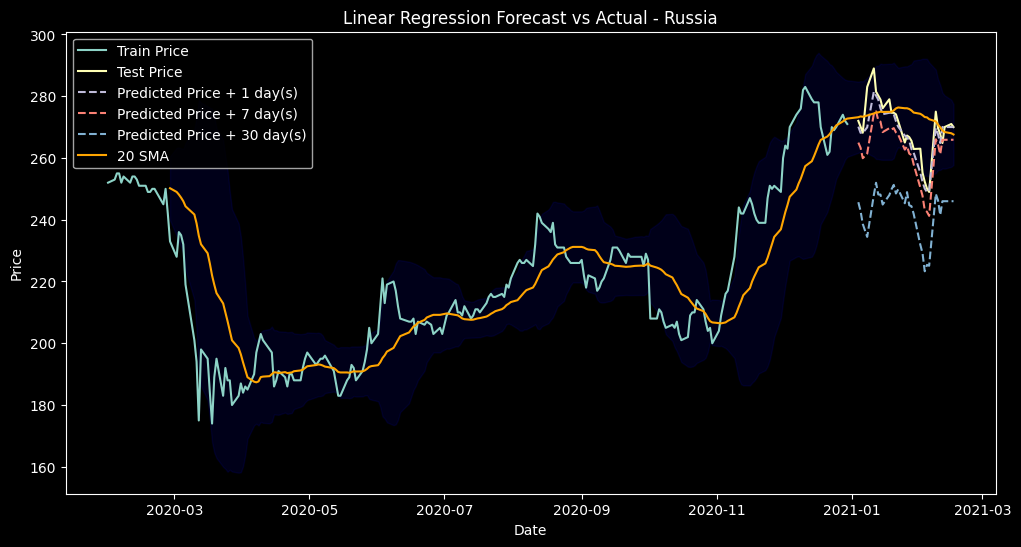

Lead 1 day(s):
Root Mean Squared Error: 9.139918710470539
Mean Absolute Percentage Error: 2.1958828838247886%

Lead 7 day(s):
Root Mean Squared Error: 12.390135199835711
Mean Absolute Percentage Error: 3.5987397060725033%

Lead 30 day(s):
Root Mean Squared Error: 39.429749593676846
Mean Absolute Percentage Error: 13.239346500103743%



lead_1      lead_7     lead_30
Date                                          
2021-01-04   270.14431  264.978204   245.67897
2021-01-05  268.156663  263.337504  242.832358
2021-01-06  268.075889  259.920797  238.640473
2021-01-08  269.924656  261.422642  234.448707
2021-01-11  281.478676  274.259603  247.992523
2021-01-12  280.189751  275.085189  251.967284
2021-01-13  278.908948  272.256712  248.180627
2021-01-14   276.09271  271.773587  248.144527
2021-01-15  274.170408  268.374612  244.919834
2021-01-18  274.625704  269.633646  247.977716
2021-01-19  274.639177  269.189001  249.862822
2021-01-20  274.124772  269.673988  251.282035
2021-01-21    271.9076  268.262942  248.497388
2021-01-22  270.134306  267.574626  249.833427
2021-01-25  267.251463  262.720106   245.33284
2021-01-26  266.746401  263.810429  248.947714
2021-01-27  265.556828  261.412968  244.698882
2021-01-28  262.905136  260.933622  244.373402
2021-01-29  261.690039   257.93176  241.906424
2021-02-01  255.243644  250.449961  231.889111
2021-02-02   252.30005  247.761945  229.176777
2021-02-03  250.086974  243.134527  223.304028
2021-02-04  248.991146  242.589412  225.378834
2021-02-05  249.247582  241.250426   225.09001
2021-02-08   269.66548  266.055357  248.382364
2021-02-09   267.73017  264.342869  246.271847
2021-02-10  264.833672  261.208579  241.540939
2021-02-11  270.015551  265.891164  246.000953
2021-02-12  270.015551  265.891164  246.000953
2021-02-15  270.015551  265.891164  246.000953
2021-02-16  270.015551  265.891164  246.000953

In [45]:
linear_regression_forecast(russia, "Russia")

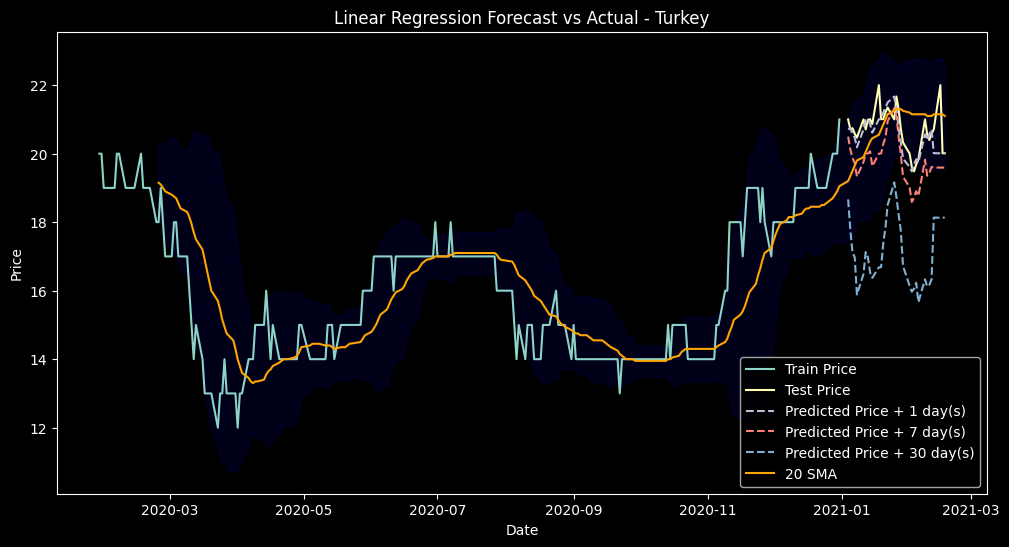

Lead 1 day(s):
Root Mean Squared Error: 1.0918590500566496
Mean Absolute Percentage Error: 4.454916060693302%

Lead 7 day(s):
Root Mean Squared Error: 2.0424285607041206
Mean Absolute Percentage Error: 8.016454599547854%

Lead 30 day(s):
Root Mean Squared Error: 4.917173521096563
Mean Absolute Percentage Error: 20.67924038376499%



lead_1     lead_7    lead_30
Date                                       
2021-01-04  20.708169  20.497826  18.664934
2021-01-05  20.744532  20.117484  17.773702
2021-01-06  20.581748  19.876669  17.113745
2021-01-07  20.466613  19.726711  16.977324
2021-01-08  20.186155  19.330081  15.885243
2021-01-11  20.706179   19.75706  16.485363
2021-01-12  20.985896  20.004147  17.125371
2021-01-13  21.005757  20.003764  16.974519
2021-01-14  20.866518   20.07019  16.532887
2021-01-15  20.611768  19.634095  16.373498
2021-01-18  21.005211  20.000505  16.681177
2021-01-19  21.008896  20.005305  16.685544
2021-01-20  21.200005  20.283013  17.379063
2021-01-21  21.345696  20.475317  17.844384
2021-01-22  21.494481  20.948226  18.503797
2021-01-25  21.668753  21.323784  19.161484
2021-01-26  21.291701  21.083019  18.730768
2021-01-27  20.725984   20.49223  18.218964
2021-01-28  20.325858  19.971086  17.744865
2021-01-29   19.85435  19.328173  16.719108
2021-02-01  19.613352  19.011737   16.14086
2021-02-02  19.482644   18.59117  15.969944
2021-02-03  19.689227  18.714205  16.056218
2021-02-04  19.835342  18.904512  16.229346
2021-02-05  19.750185  18.764801  15.661367
2021-02-08  20.563414  19.821442  16.332249
2021-02-09  20.397386  19.354873  16.119482
2021-02-10  20.578987  19.445371  16.176156
2021-02-11  20.707432  19.612664  16.328347
2021-02-12  20.011401  19.592869  18.132044
2021-02-15  20.011401  19.592869  18.132044
2021-02-16  20.011401  19.592869  18.132044
2021-02-17  20.011401  19.592869  18.132044

In [46]:
linear_regression_forecast(turkey, "Turkey")

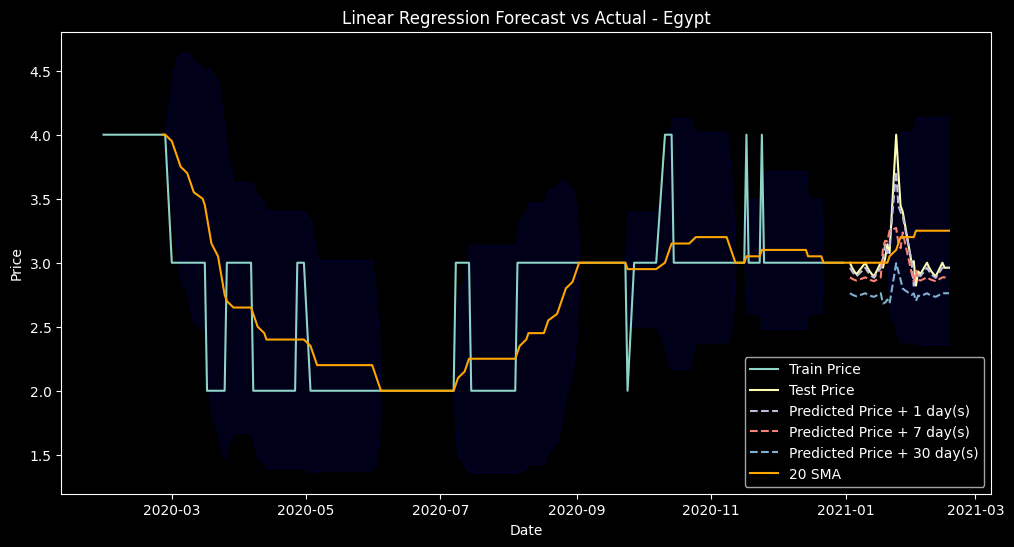

Lead 1 day(s):
Root Mean Squared Error: 0.3464844671867798
Mean Absolute Percentage Error: 5.641144399461203%

Lead 7 day(s):
Root Mean Squared Error: 0.44141036211828183
Mean Absolute Percentage Error: 7.9307399228968105%

Lead 30 day(s):
Root Mean Squared Error: 0.2484789940921705
Mean Absolute Percentage Error: 8.012954707635373%



lead_1    lead_7   lead_30
Date                                    
2021-01-03  2.960922  2.885708  2.761629
2021-01-04  2.931874  2.874703  2.751263
2021-01-05  2.910283  2.866523  2.743557
2021-01-06  2.894233  2.860442   2.73783
2021-01-10  2.960922  2.885708  2.761629
2021-01-11  2.931874  2.874703  2.751263
2021-01-12  2.910283  2.866523  2.743557
2021-01-13  2.894233  2.860442   2.73783
2021-01-14  2.882304  2.855922  2.733572
2021-01-17  2.960922  2.885708  2.761629
2021-01-18  3.036722    3.1138  2.681594
2021-01-19  3.144106  3.171276  2.688601
2021-01-20  3.074971   3.16715  2.712513
2021-01-21   3.12847  3.250137  2.681356
2021-01-24  3.711208  3.271547  2.996413
2021-01-25  3.445505  3.154089  2.932905
2021-01-26  3.396959  3.113629  2.866994
2021-01-27  3.360834  3.236597  2.797265
2021-01-31  3.011962  2.921837  2.748528
2021-02-01  2.820859   2.85471  2.760229
2021-02-02  2.932651  2.937715   2.70129
2021-02-03   2.91086  2.866741  2.743763
2021-02-04  2.894662  2.860605  2.737983
2021-02-07  2.960922  2.885708  2.761629
2021-02-08  2.931874  2.874703  2.751263
2021-02-09  2.910283  2.866523  2.743557
2021-02-10  2.894233  2.860442   2.73783
2021-02-11  2.882304  2.855922  2.733572
2021-02-14  2.960922  2.885708  2.761629
2021-02-15  2.960922  2.885708  2.761629
2021-02-16  2.960922  2.885708  2.761629
2021-02-17  2.960922  2.885708  2.761629

In [47]:
linear_regression_forecast(egypt, "Egypt")

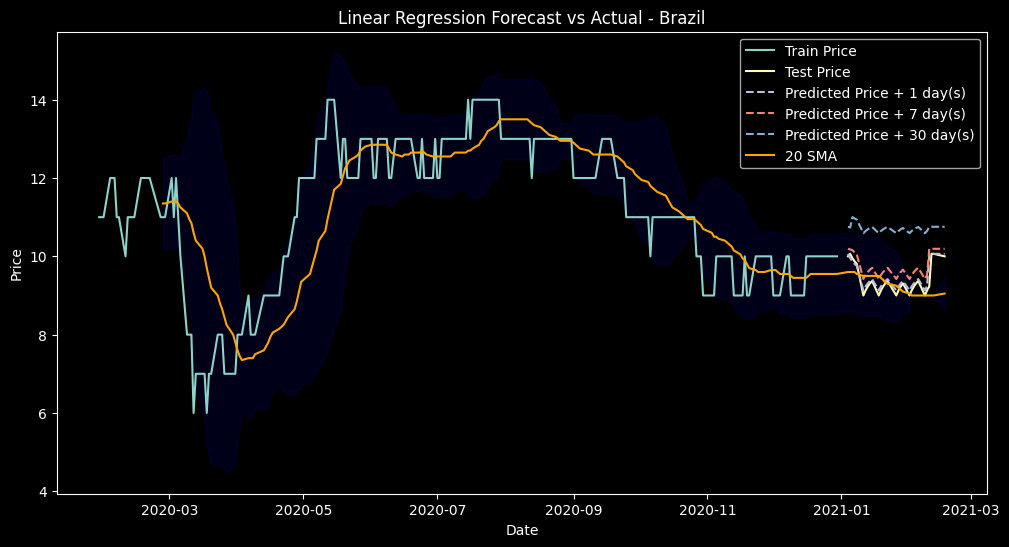

Lead 1 day(s):
Root Mean Squared Error: 0.5544112327046071
Mean Absolute Percentage Error: 4.988231886323093%

Lead 7 day(s):
Root Mean Squared Error: 0.7907099668193447
Mean Absolute Percentage Error: 8.137238330825012%

Lead 30 day(s):
Root Mean Squared Error: 1.5952932471633003
Mean Absolute Percentage Error: 17.090624819916773%



lead_1     lead_7    lead_30
Date                                      
2021-01-04  10.06358  10.192841  10.754621
2021-01-05  9.953569  10.174555  10.735692
2021-01-06  9.870868  10.160396  11.002116
2021-01-07  9.806594  10.096302  10.966461
2021-01-08  9.756639  10.046487  10.938751
2021-01-11  9.129756    9.42136  10.591008
2021-01-12  9.230603   9.521924  10.646949
2021-01-13   9.30898   9.600082  10.690426
2021-01-14  9.369895   9.660827  10.724217
2021-01-15  9.417238   9.708037  10.750479
2021-01-18  9.129756    9.42136  10.591008
2021-01-19  9.230603   9.521924  10.646949
2021-01-20   9.30898   9.600082  10.690426
2021-01-21  9.369895   9.660827  10.724217
2021-01-22  9.417238   9.708037  10.750479
2021-01-26  9.129756    9.42136  10.591008
2021-01-27  9.230603   9.521924  10.646949
2021-01-28   9.30898   9.600082  10.690426
2021-01-29  9.369895   9.660827  10.724217
2021-02-01  9.129756    9.42136  10.591008
2021-02-02  9.230603   9.521924  10.646949
2021-02-03   9.30898   9.600082  10.690426
2021-02-04  9.369895   9.660827  10.724217
2021-02-05  9.417238   9.708037  10.750479
2021-02-08  9.129756    9.42136  10.591008
2021-02-09  9.230603   9.521924  10.646949
2021-02-10  10.06358  10.192841  10.754621
2021-02-11  10.06358  10.192841  10.754621
2021-02-12  10.06358  10.192841  10.754621
2021-02-17  10.06358  10.192841  10.754621

In [48]:
linear_regression_forecast(brazil, "Brazil")

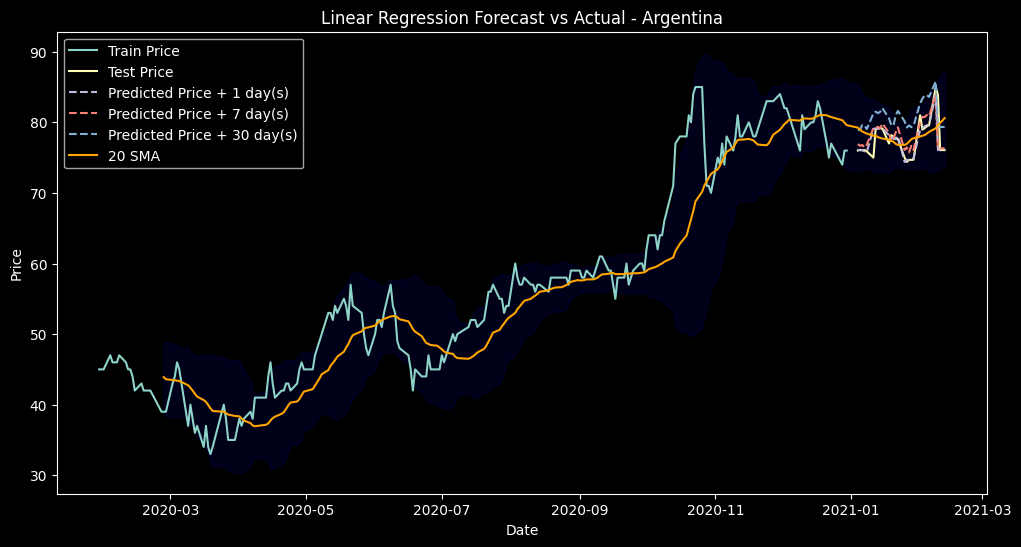

Lead 1 day(s):
Root Mean Squared Error: 4.697526754035376
Mean Absolute Percentage Error: 4.645482550437792%

Lead 7 day(s):
Root Mean Squared Error: 4.388480858415555
Mean Absolute Percentage Error: 4.308617967347658%

Lead 30 day(s):
Root Mean Squared Error: 4.538415903955864
Mean Absolute Percentage Error: 4.599448748681943%



lead_1     lead_7    lead_30
Date                                       
2021-01-04  76.111084   76.91931  78.885347
2021-01-05  76.039313  76.671254  78.972363
2021-01-06  76.080264  76.786372  79.641766
2021-01-07  75.881693  76.424266  79.569553
2021-01-08  75.777778  76.822734  79.037632
2021-01-11  79.089351  79.201973  81.266565
2021-01-12  79.121219  79.271028  81.512099
2021-01-13  79.159606  79.352436  81.294864
2021-01-14  79.129138  79.177972  81.480512
2021-01-15  79.131546  79.817878  82.028237
2021-01-18  78.176598  78.539189  80.550539
2021-01-19   78.01243  77.324084  79.654153
2021-01-20  77.662466  77.667384  79.509037
2021-01-21  77.635406  78.577702  81.010694
2021-01-22  78.023443  79.287502  81.616309
2021-01-25   74.38565  76.088851  80.149051
2021-01-26  74.676037  76.446851  79.267811
2021-01-27  74.686668  75.726423  79.565711
2021-01-28  74.701918  76.674006  79.316866
2021-01-29  74.840803  76.098709  79.491973
2021-02-01  78.966818   80.08824  82.723587
2021-02-02  79.183526  80.750872  83.331872
2021-02-03  79.437293  80.757154  83.809854
2021-02-04  79.585591  81.028408  83.848794
2021-02-05  79.664581  80.848895  83.598093
2021-02-08  83.861635  83.970912  85.801815
2021-02-09  76.069081  76.310136  79.342781
2021-02-10  76.069081  76.310136  79.342781
2021-02-11  76.069081  76.310136  79.342781
2021-02-12  76.069081  76.310136  79.342781

In [49]:
linear_regression_forecast(argentina, "Argentina")

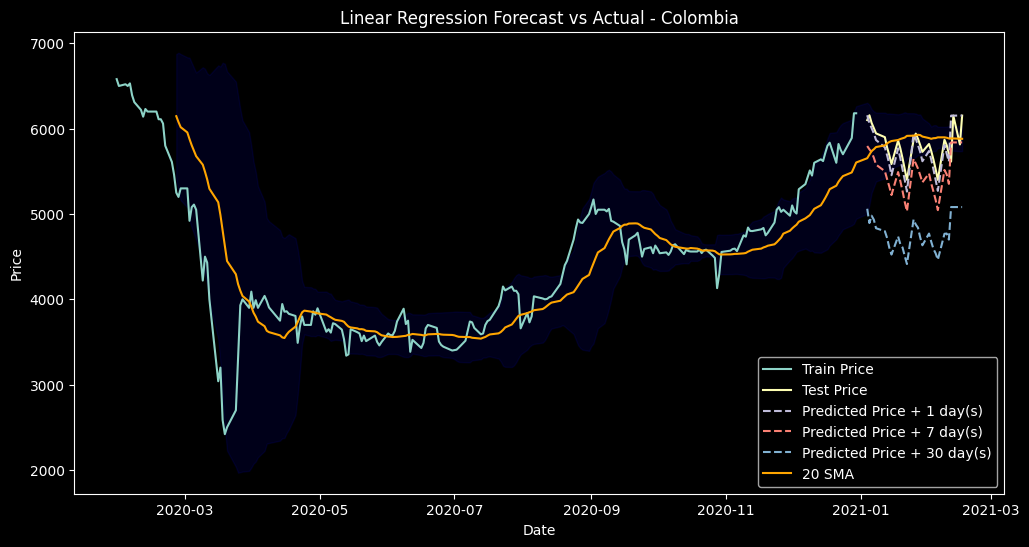

Lead 1 day(s):
Root Mean Squared Error: 312.0670978935632
Mean Absolute Percentage Error: 4.444765317059369%

Lead 7 day(s):
Root Mean Squared Error: 457.5007357048801
Mean Absolute Percentage Error: 6.777783120105566%

Lead 30 day(s):
Root Mean Squared Error: 739.9819820600832
Mean Absolute Percentage Error: 11.82498586253984%



lead_1       lead_7      lead_30
Date                                             
2021-01-04  6156.702778  5796.283626  5061.189086
2021-01-05  6066.161577  5757.215727  4893.611481
2021-01-06   6006.06343  5724.149593  4979.508812
2021-01-07  5944.489544  5659.297376  4933.026467
2021-01-08  5866.490756   5577.98795  4833.084973
2021-01-12  5779.992237  5501.585901  4798.544226
2021-01-13  5689.401076  5409.933266  4719.389849
2021-01-14  5584.697223  5322.284843  4605.944708
2021-01-15  5453.980056   5222.16113  4524.568612
2021-01-18  5769.234519  5491.162136  4735.743843
2021-01-19  5653.538363  5385.502007  4646.908699
2021-01-20  5524.579453  5269.660089  4607.801563
2021-01-21  5400.171656  5141.496771  4508.008592
2021-01-22  5262.437557  5031.868285  4413.545072
2021-01-25  5941.903018  5645.973134  4934.848423
2021-01-26  5881.099326  5590.676668  4876.271963
2021-01-27  5807.139264  5532.502859  4839.304124
2021-01-28  5727.982851  5453.748187  4725.433612
2021-01-29  5618.078166  5370.663902  4633.229025
2021-02-01  5737.852254  5474.819137  4770.344286
2021-02-02  5637.747995  5358.370183  4674.959363
2021-02-03  5523.982574  5263.678574  4590.588493
2021-02-04  5399.284392  5164.016855  4539.151717
2021-02-05  5270.528214  5045.025182  4464.007922
2021-02-08  5807.111427  5515.395504  4767.836331
2021-02-09  5707.233142  5464.211369  4770.772076
2021-02-10  5614.274582  5352.968042  4699.766087
2021-02-11  6152.798802  5838.312951  5081.107192
2021-02-12  6152.798802  5838.312951  5081.107192
2021-02-15  6152.798802  5838.312951  5081.107192
2021-02-16  6152.798802  5838.312951  5081.107192

In [50]:
linear_regression_forecast(colombia, "Colombia")

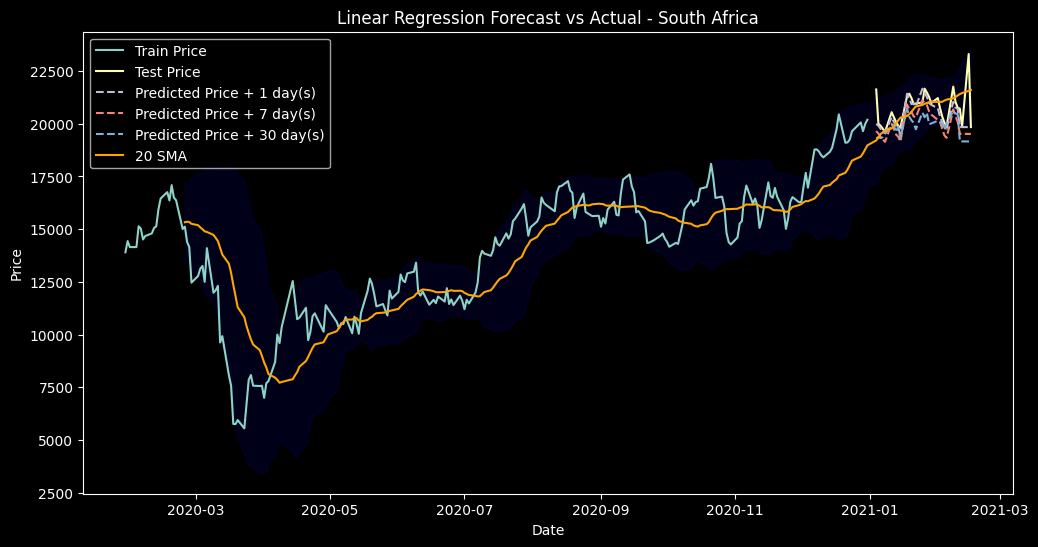

Lead 1 day(s):
Root Mean Squared Error: 1509.395652240767
Mean Absolute Percentage Error: 5.401509573999931%

Lead 7 day(s):
Root Mean Squared Error: 2632.3217930828932
Mean Absolute Percentage Error: 9.618178114951492%

Lead 30 day(s):
Root Mean Squared Error: 6431.213217360735
Mean Absolute Percentage Error: 23.562915822824372%



lead_1        lead_7       lead_30
Date                                                
2021-01-04   19996.33782  19654.550109  19304.710207
2021-01-05  19905.054589  19533.690481  19372.883078
2021-01-06  19760.581828  19386.546175  19321.787606
2021-01-07  19615.121132  19258.028521  19369.416274
2021-01-08   19554.17051  19140.676362   19516.35427
2021-01-11  20314.982943  20004.815511  19928.940514
2021-01-12  20093.333917  19758.678445  19928.294565
2021-01-13  19910.294956   19490.48093  19601.943926
2021-01-14  19814.097762  19385.321349  19869.959123
2021-01-15  19486.638993  19146.784287  19312.127878
2021-01-18  21426.915099  20920.721966  20729.426691
2021-01-19  21227.653453  20691.183982  20333.594643
2021-01-20  20933.005387  20554.965718  20167.054992
2021-01-21  20959.452244  20347.530807  20048.818126
2021-01-22  20812.183493  20299.470241  19736.415312
2021-01-25  21666.265754  21120.389673  20528.994669
2021-01-26  21486.267897  20989.671218  20308.171117
2021-01-27  21274.531297   20890.28889  20527.412734
2021-01-28  20983.591215   20591.29049  19986.089239
2021-01-29  20900.560384  20439.616153  20012.230212
2021-02-01  20735.819142  20180.881456  20145.390118
2021-02-02  20335.084039  20074.031649  20072.912321
2021-02-03  20051.080211  19759.137274  20009.847157
2021-02-04  19879.113992  19444.613795  19696.932864
2021-02-05  19772.514583  19334.853653  20040.590625
2021-02-08  21042.176189  20679.450194  20611.712453
2021-02-09  20763.934309   20362.97152  20487.751277
2021-02-10  20714.075203  20102.315796  20467.532608
2021-02-11  19842.118728  19519.411361  19162.813692
2021-02-12  19842.118728  19519.411361  19162.813692
2021-02-15  19842.118728  19519.411361  19162.813692
2021-02-16  19842.118728  19519.411361  19162.813692

In [51]:
linear_regression_forecast(safrica, "South Africa")

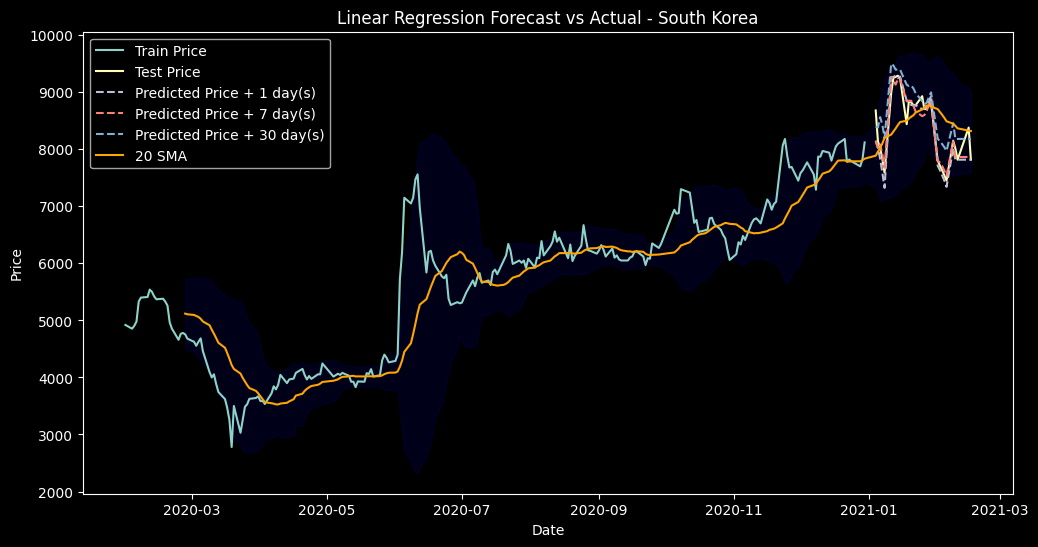

Lead 1 day(s):
Root Mean Squared Error: 769.3087447601254
Mean Absolute Percentage Error: 7.18790370306068%

Lead 7 day(s):
Root Mean Squared Error: 813.6105725355987
Mean Absolute Percentage Error: 8.911905349357548%

Lead 30 day(s):
Root Mean Squared Error: 2425.1116040658912
Mean Absolute Percentage Error: 15.566404578840428%



lead_1       lead_7      lead_30
Date                                             
2021-01-04  8138.590721    8154.4603  8396.829112
2021-01-05  8021.425747  8020.255741  8380.453807
2021-01-06  7832.826067  8082.907818  8563.030001
2021-01-07  7589.538534  7909.211057  8430.177032
2021-01-08  7323.589481  7677.644259  8198.252367
2021-01-11  9252.902077  9270.035168   9499.35535
2021-01-12  9268.838222  9200.270443  9467.536971
2021-01-13   9288.96235  9133.150899  9395.037894
2021-01-14  9245.502774  9226.610608  9400.178916
2021-01-15  9274.151173  9235.725118  9396.764149
2021-01-18  8852.838822  8841.031292  9131.492992
2021-01-19  8820.949822  8845.865418  9107.939209
2021-01-20  8776.994876    8849.9476  9118.944239
2021-01-21  8769.609218  8766.754967  9068.926995
2021-01-22  8772.244952  8663.889251  8988.524307
2021-01-25  8703.501711   8580.18121   8842.14322
2021-01-26  8709.130671  8600.042637  8790.607168
2021-01-27  8756.557066  8666.908235  8809.812154
2021-01-28  8823.190203  8786.618849  8912.936306
2021-01-29  8938.602121  8845.218638  8996.681145
2021-02-01  7712.528432  7803.235631  8189.090618
2021-02-02  7633.169948  7766.388325  8136.215593
2021-02-03  7544.472287  7709.716764  8091.965658
2021-02-04   7451.24697  7629.147275   8036.46583
2021-02-05  7340.918132  7535.806146  7970.916945
2021-02-08  8012.320653  8137.824232  8456.479153
2021-02-09  7817.010718   7864.04432  8180.897649
2021-02-10  7817.010718   7864.04432  8180.897649
2021-02-15  7817.010718   7864.04432  8180.897649
2021-02-16  7817.010718   7864.04432  8180.897649

In [52]:
linear_regression_forecast(skorea, "South Korea")

##### The ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) models are both used for time series forecasting, but they have some key differences: ARIMA handles non-seasonal data, does not handle exogenous variables and is useful for simple, non-seasonal datasets. Whereas SARIMAX handles both seasonal and non-seasonal data, can incorporate exogenous variables (regressors) which can improve the forecast by including external information and is more flexible and powerful for complex datasets with seasonality and external factors.

ADF Statistic: -1.4233235279675926
p-value: 0.5710448680935923
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-714.367, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-768.989, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-716.367, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-800.462, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-833.153, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-837.142, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-837.488, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-858.849, Time=0.73 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-854.015, Time=0.44 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-860.308, Time=0.61 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-860.635, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-862

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



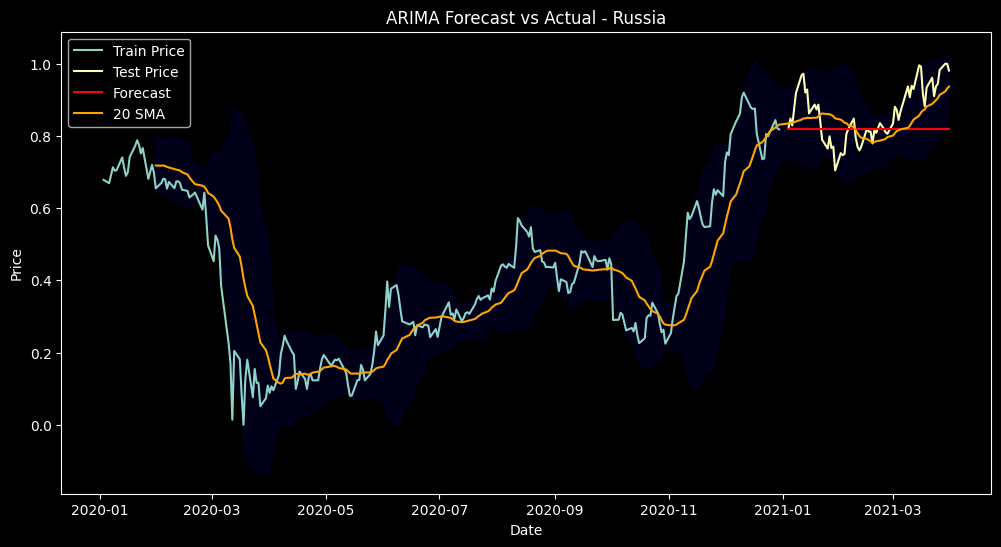

RMSE: 0.08772171000816459
MAPE: 7.681601587605252%


(0.08772171000816459, 0.07681601587605252)

In [53]:
arima(russia, "Russia")

ADF Statistic: -1.5241208674752984
p-value: 0.5215471446531429
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-797.084, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-854.141, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-799.084, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-892.936, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-922.165, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-927.949, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-927.571, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-945.646, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-944.013, Time=0.43 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-942.131, Time=0.60 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-944.547, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-945

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\

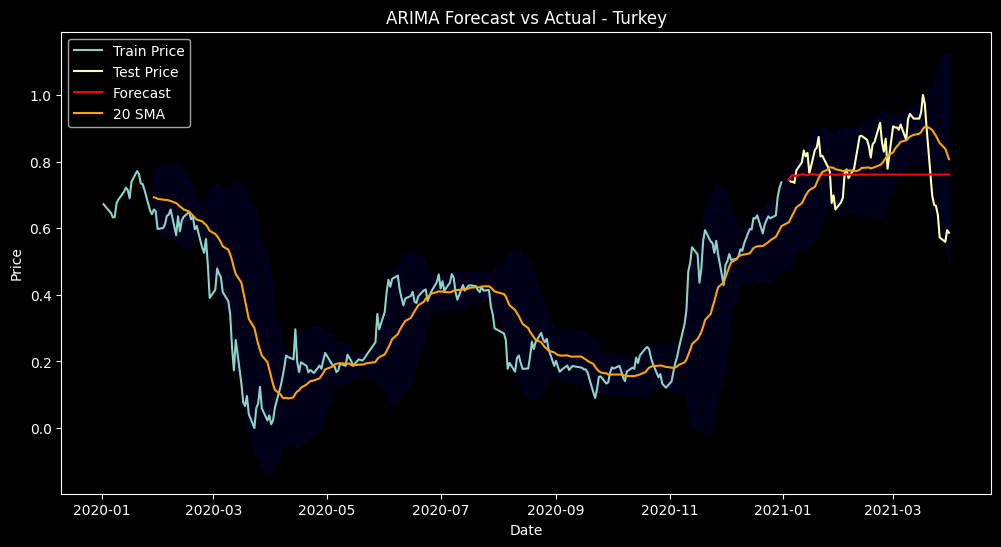

RMSE: 0.11225544063736562
MAPE: 11.812020447527075%


(0.11225544063736562, 0.11812020447527075)

In [54]:
arima(turkey, 'Turkey')

ADF Statistic: -1.542417678277975
p-value: 0.5124333991631931
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-793.410, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-827.126, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-795.357, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-839.237, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-851.955, Time=0.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-856.239, Time=0.42 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-860.433, Time=0.34 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-872.132, Time=0.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-878.806, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-886.700, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-889.504, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, 

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



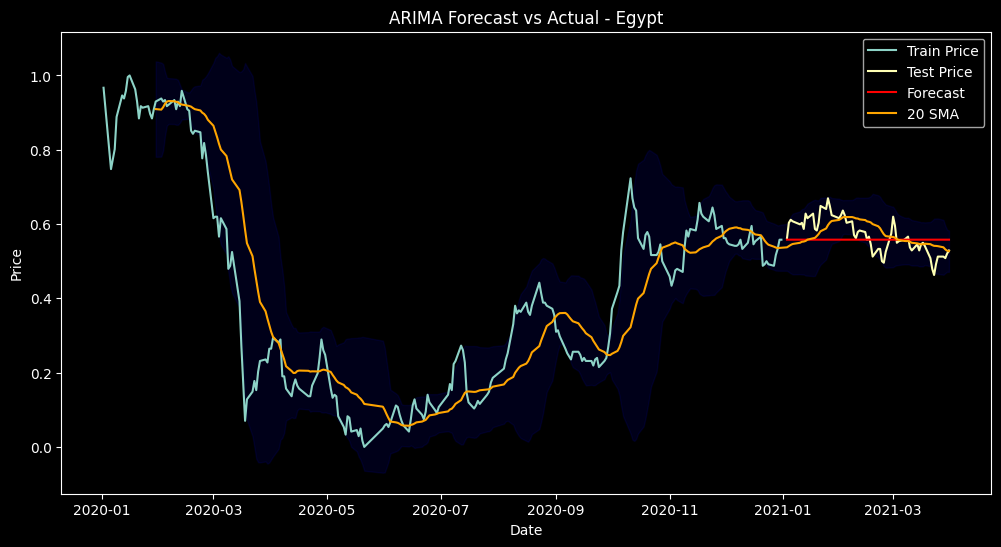

RMSE: 0.04824239864099044
MAPE: 7.001410756345037%


(0.04824239864099044, 0.07001410756345038)

In [55]:
arima(egypt, "Egypt")

ADF Statistic: -2.1956983927966975
p-value: 0.2078103950122735
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-602.897, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-706.077, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-604.894, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-758.596, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-763.158, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-762.039, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-793.811, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-789.029, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-781.775, Time=0.34 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-787.046, Time

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



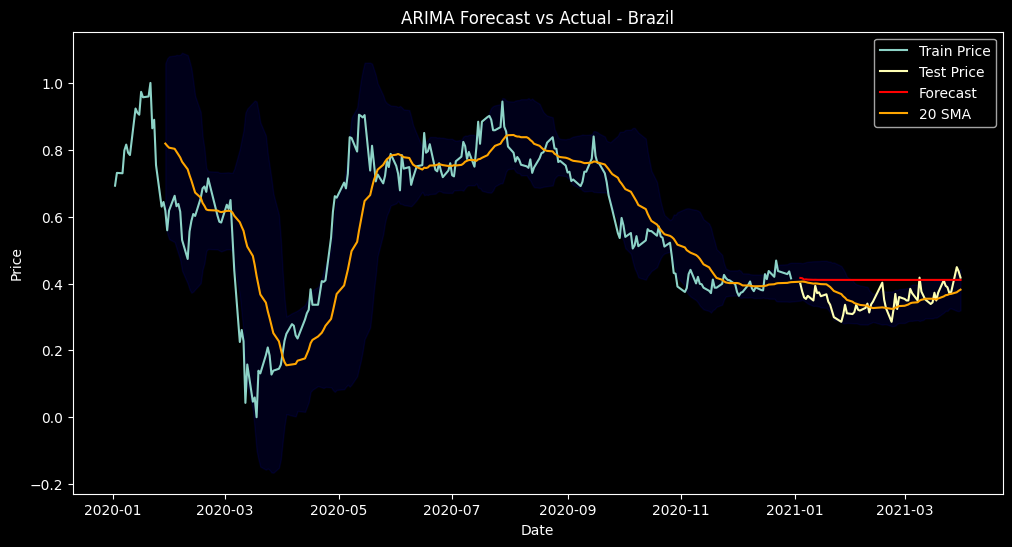

RMSE: 0.06581023094100993
MAPE: 17.491066239355984%


(0.06581023094100993, 0.17491066239355985)

In [56]:
arima(brazil, "Brazil")

ADF Statistic: -0.7426681664185706
p-value: 0.8353858829030216
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-706.629, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-790.796, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-708.629, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-805.669, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-826.419, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-834.228, Time=0.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-837.338, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-863.930, Time=0.53 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-874.289, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-870.298, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-869.659, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-869

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



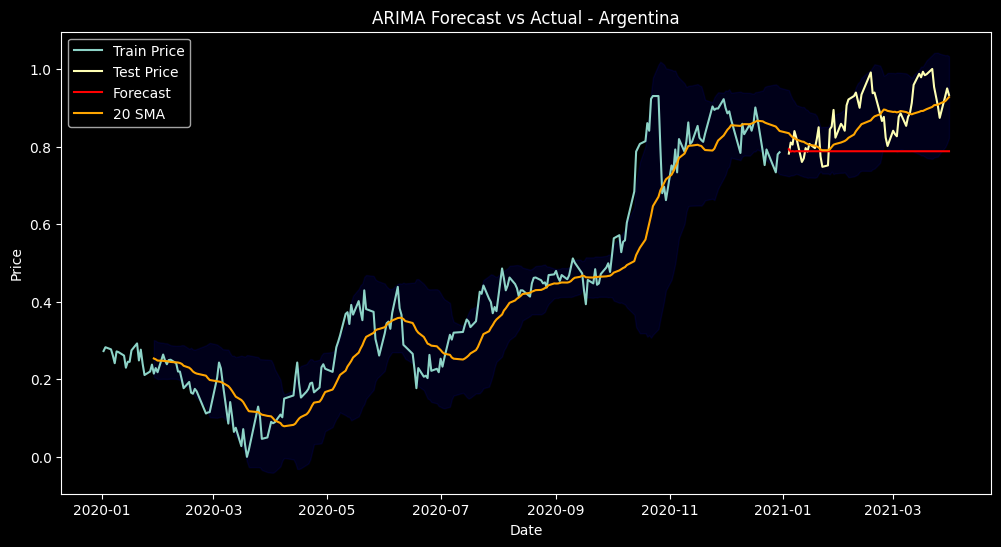

RMSE: 0.11035819608944407
MAPE: 10.002499853423451%


(0.11035819608944407, 0.10002499853423452)

In [57]:
arima(argentina, "Argentina")

ADF Statistic: -1.8521235185529443
p-value: 0.3549077427799207
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-789.409, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-864.380, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-791.408, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-881.453, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-904.315, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-902.334, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-926.650, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-931.578, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-930.385, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-923.163, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-933.517,

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



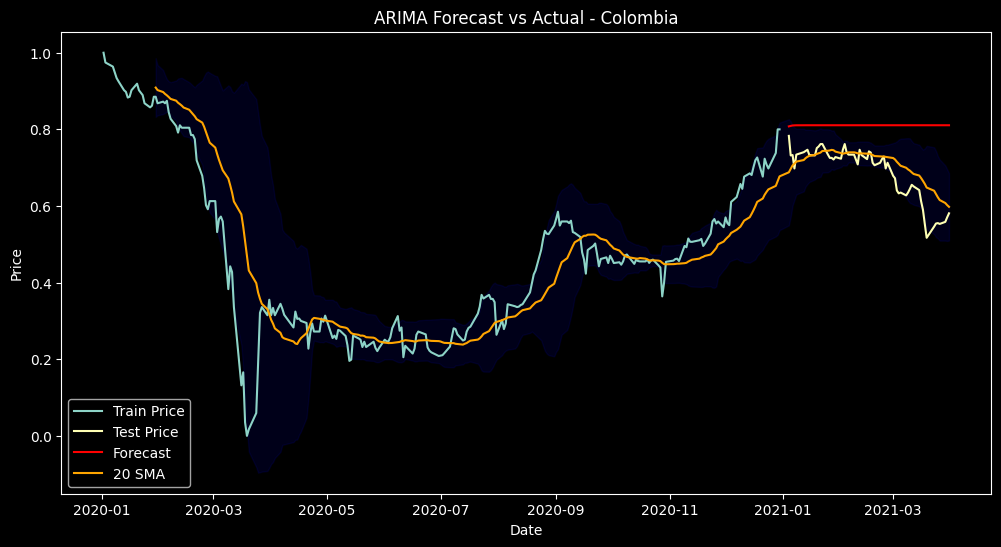

RMSE: 0.14186060570312264
MAPE: 19.37704901185925%


(0.14186060570312264, 0.1937704901185925)

In [58]:
arima(colombia, 'Colombia')

ADF Statistic: -0.9104458387885497
p-value: 0.784512991626399
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-891.072, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-969.059, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-893.071, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1016.859, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1028.943, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1027.778, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1061.394, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1063.308, Time=0.47 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1060.652, Time=0.53 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1060.218, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-10

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



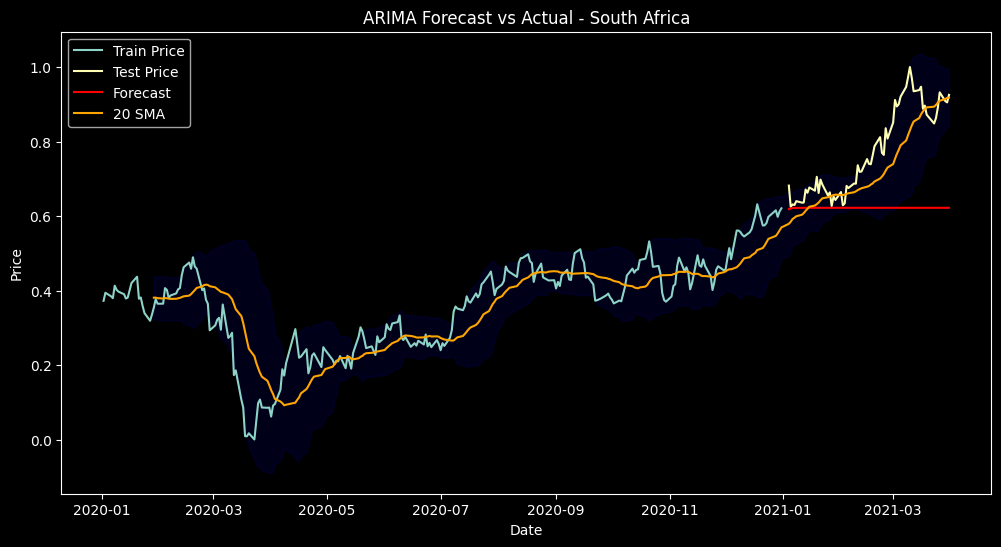

RMSE: 0.19040968948250178
MAPE: 17.619406214638538%


(0.19040968948250178, 0.1761940621463854)

In [59]:
arima(safrica, "South Africa")

ADF Statistic: -0.7147344722777224
p-value: 0.8428959732099582
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1052.480, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1126.884, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1054.477, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1141.821, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1158.553, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1166.284, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1165.879, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1188.415, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1189.382, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1199.263, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



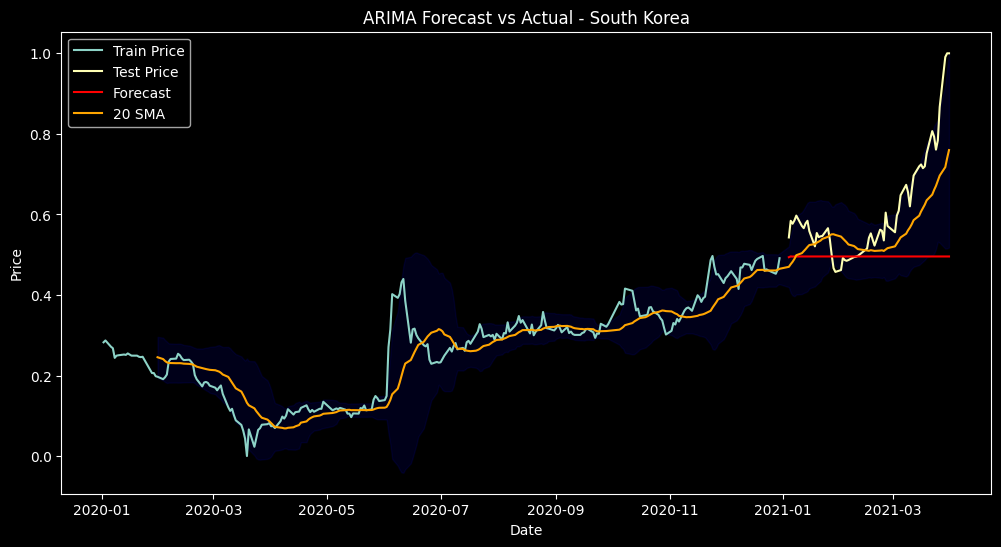

RMSE: 0.17365500401005626
MAPE: 17.03545838708105%


(0.17365500401005626, 0.1703545838708105)

In [60]:
arima(skorea, "South Korea")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1392.977, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1394.453, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1394.400, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1391.044, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1395.383, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.690 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  231
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -694.522
Date:                Sat, 22 Jun 2024   AIC                           1391.044
Time:                        19:21:22   BIC                           1394.482
Sample:                             0   HQIC                          1392.431
               

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



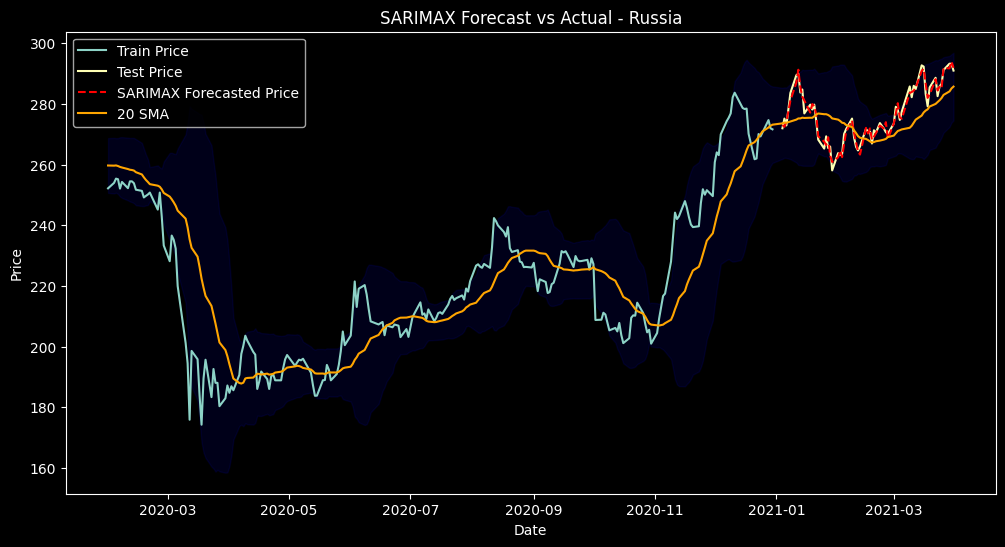

RMSE: 1.9235847094812106
MAPE: 0.5970281535059828%


(1.9235847094812106, 0.005970281535059828)

In [61]:
#SARIMAX
sarimax_forecast(russia, "Russia")

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=252.627, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=392.580, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=336.989, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=247.271, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=249.211, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=249.204, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.733 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  233
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -121.635
Date:                Sat, 22 Jun 2024   AIC                            247.271
Time:                        19:21:35   BIC         

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

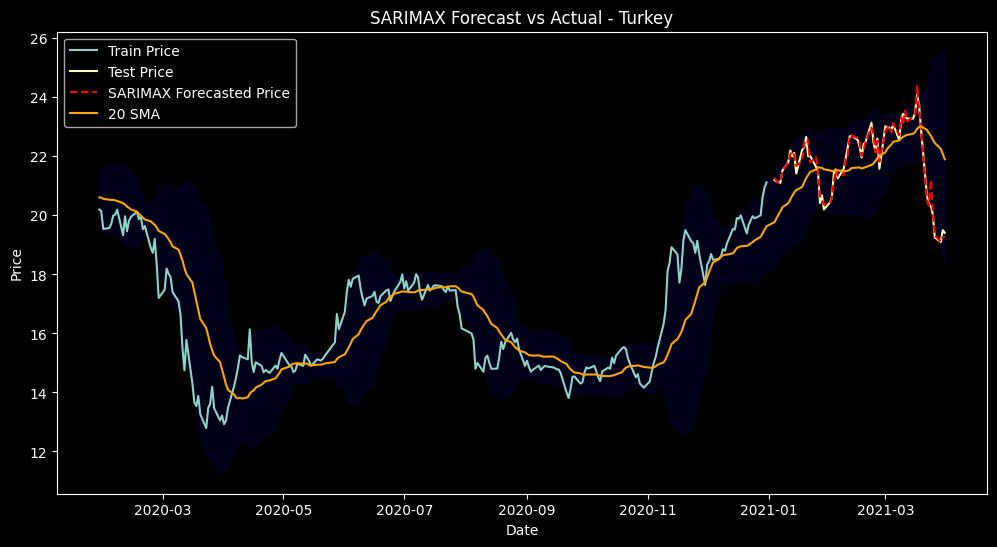

RMSE: 0.20857224058778895
MAPE: 0.6768542763315563%


(0.20857224058778895, 0.0067685427633155625)

In [62]:
sarimax_forecast(turkey, 'Turkey')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-445.802, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-441.855, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-450.721, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-449.317, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-443.398, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-449.456, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-449.797, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-447.985, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-452.431, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-451.202, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-451.576, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-450.983, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-449.778, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.290 seconds
                      

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

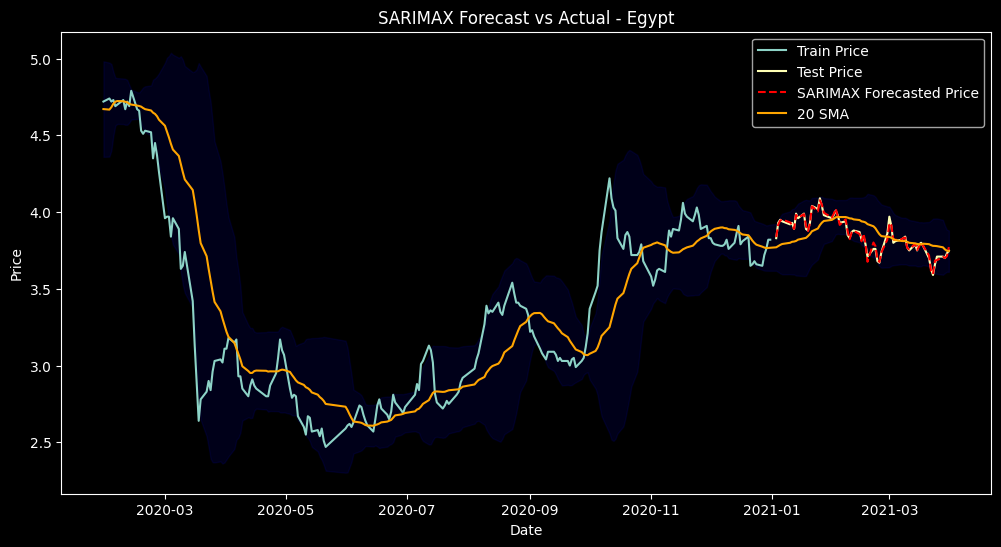

RMSE: 0.014989797019610934
MAPE: 0.296160365710826%


(0.014989797019610934, 0.00296160365710826)

In [63]:
sarimax_forecast (egypt, "Egypt")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=223.314, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=229.789, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=229.290, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=229.755, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=227.874, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=227.065, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=228.294, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=224.717, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=224.798, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=230.707, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=226.854, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=227.751, Time=0.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=226.176, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=221.395, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=225.1

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

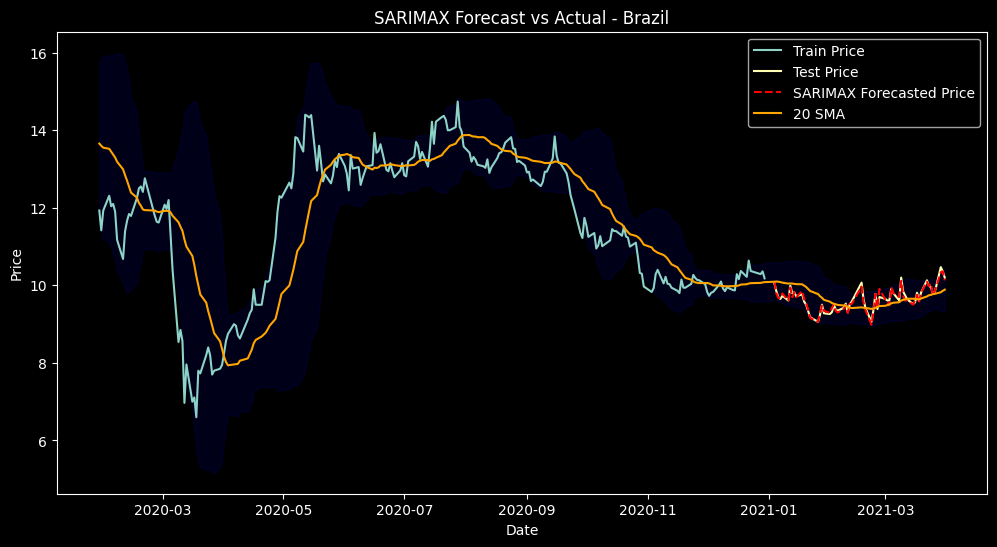

RMSE: 0.06495003738226186
MAPE: 0.5192212503073456%


(0.06495003738226186, 0.005192212503073455)

In [64]:
sarimax_forecast (brazil, "Brazil")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=960.444, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=961.532, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=961.591, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=959.464, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=962.239, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.668 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  221
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -478.732
Date:                Sat, 22 Jun 2024   AIC                            959.464
Time:                        19:23:36   BIC                            962.858
Sample:                             0   HQIC                           960.835
                    

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



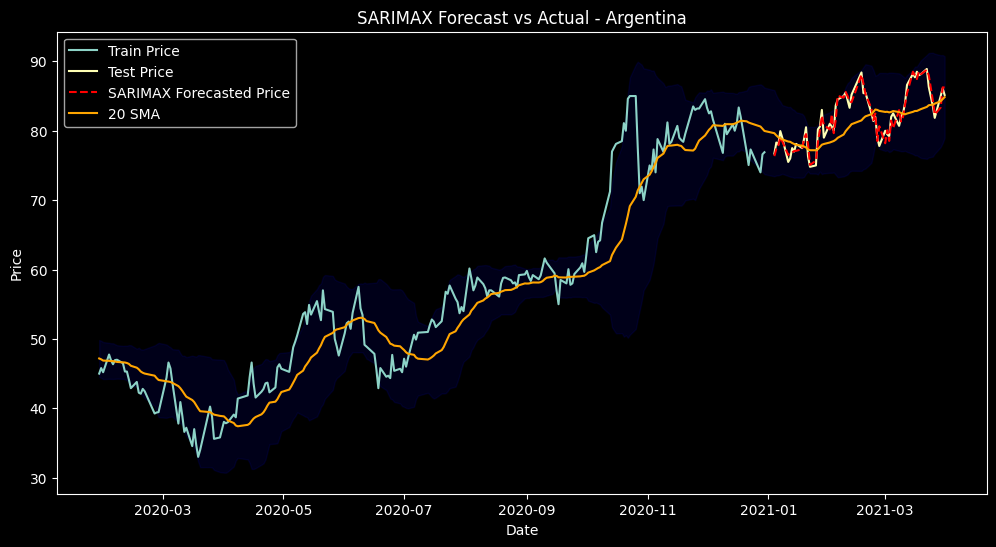

RMSE: 1.0431208361222986
MAPE: 1.0073110703831794%


(1.0431208361222986, 0.010073110703831795)

In [65]:
sarimax_forecast (argentina, "Argentina")

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2893.142, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3024.931, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2955.110, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2893.121, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2894.510, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2894.617, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2895.395, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.681 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1444.560
Date:                Sat, 22 Jun 2024   AIC                           2893.121
Time:                        19:23:46   B

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

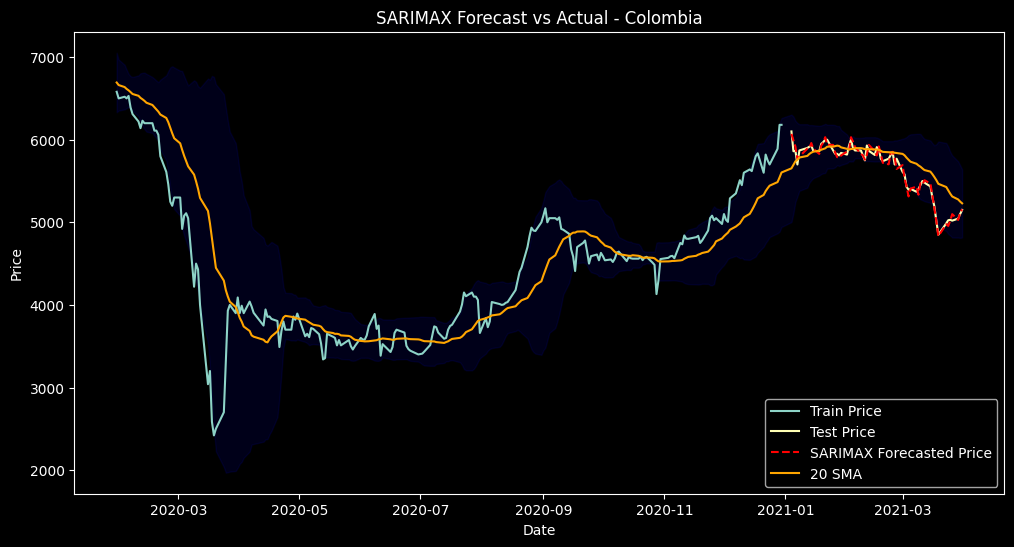

RMSE: 52.345578079835
MAPE: 0.7434527481876495%


(52.345578079835, 0.007434527481876495)

In [66]:
sarimax_forecast (colombia, 'Colombia')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3680.796, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3682.625, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3682.623, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3679.179, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3684.623, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.581 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1838.590
Date:                Sat, 22 Jun 2024   AIC                           3679.179
Time:                        19:24:02   BIC                           3682.626
Sample:                             0   HQIC                          3680.569
               

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



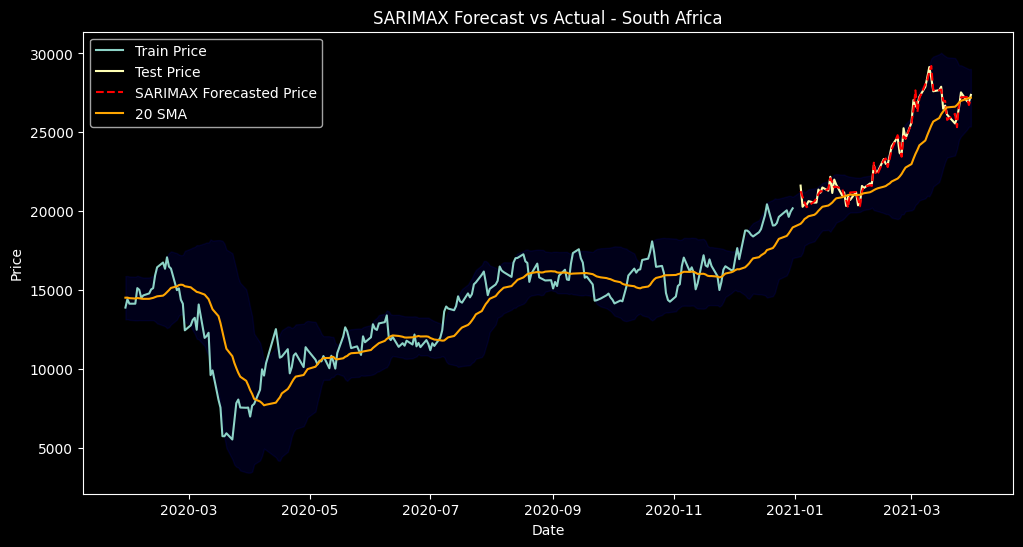

RMSE: 360.19673736179357
MAPE: 1.2242357431003559%


(360.19673736179357, 0.01224235743100356)

In [67]:
sarimax_forecast (safrica, "South Africa")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3131.380, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3128.627, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3130.063, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3130.138, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3127.483, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3131.439, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.515 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  229
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1562.741
Date:                Sat, 22 Jun 2024   AIC                           3127.483
Time:                        19:24:23   BIC                           3130.912
Sample:                             0   HQIC                          3128.866
          

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



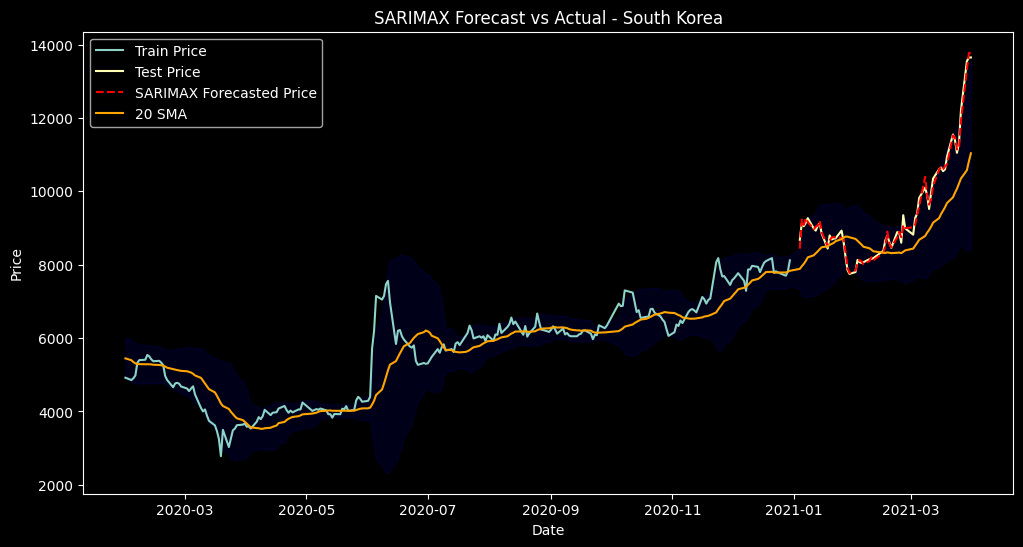

RMSE: 125.79442885003483
MAPE: 1.0394658607551233%


(125.79442885003483, 0.010394658607551233)

In [68]:
sarimax_forecast (skorea, "South Korea")

##### Prophet is a forecasting tool developed by Meta designed to forecast time series data as a sum of several components: trend, seasonality and holidays/events.

19:24:39 - cmdstanpy - INFO - Chain [1] start processing
19:24:39 - cmdstanpy - INFO - Chain [1] done processing


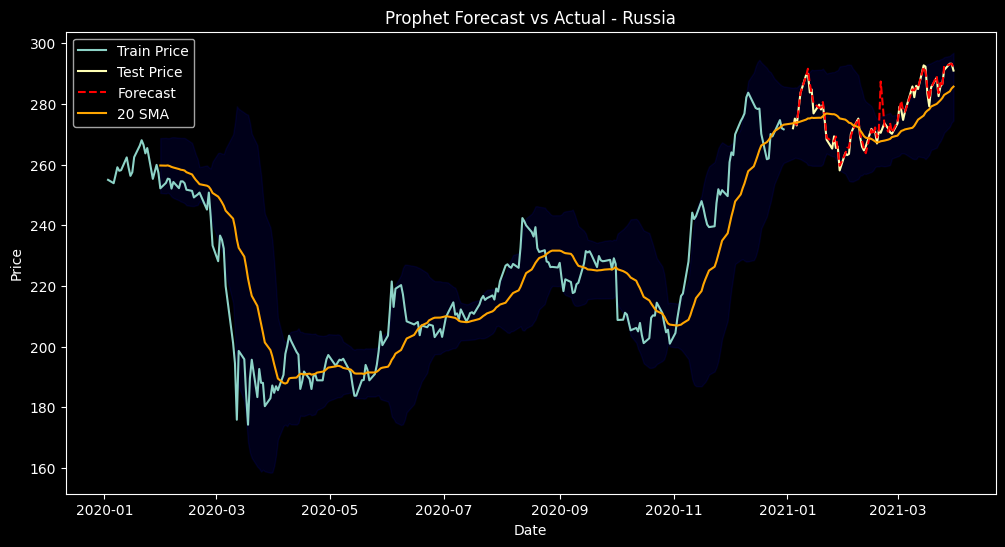

RMSE: 2.6583401196057155
MAPE: 0.5481922498521682%


(2.6583401196057155, 0.005481922498521682)

In [69]:
#Prophet
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russia=preprocess_dataframe(russia)
russia
prophet_forecast(russia, "Russia")

19:24:40 - cmdstanpy - INFO - Chain [1] start processing
19:24:40 - cmdstanpy - INFO - Chain [1] done processing


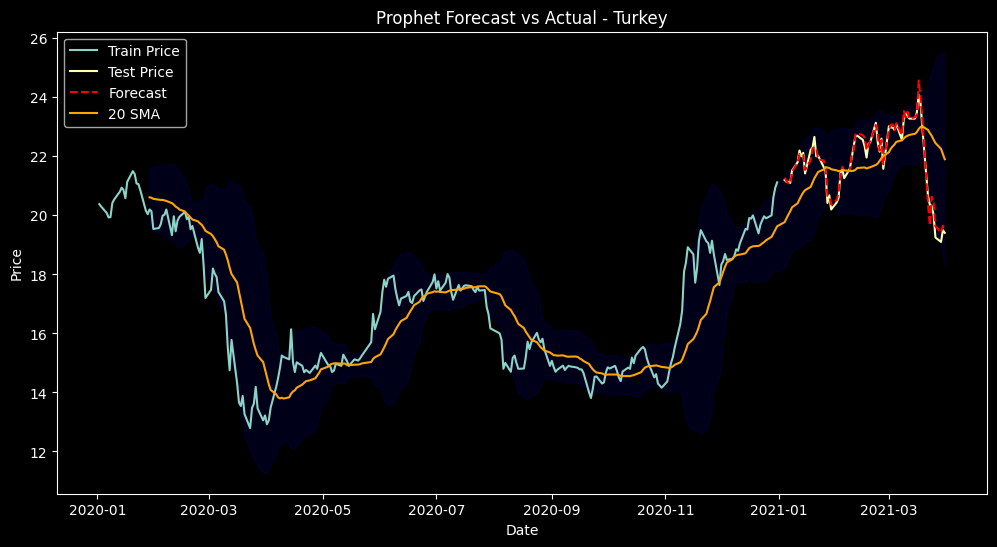

RMSE: 0.20253597056260011
MAPE: 0.7154285558284936%


(0.20253597056260011, 0.007154285558284936)

In [70]:
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
turkey=preprocess_dataframe(turkey)
prophet_forecast(turkey, 'Turkey')

19:24:41 - cmdstanpy - INFO - Chain [1] start processing
19:24:41 - cmdstanpy - INFO - Chain [1] done processing


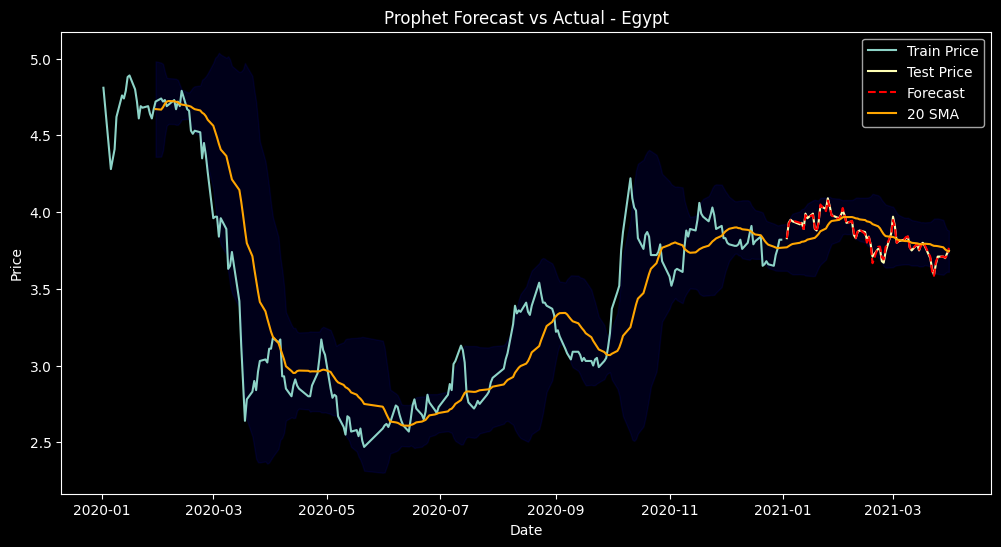

RMSE: 0.012046516459270505
MAPE: 0.23799553506551613%


(0.012046516459270505, 0.002379955350655161)

In [71]:
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
egypt =preprocess_dataframe(egypt)
prophet_forecast (egypt, "Egypt")

19:24:41 - cmdstanpy - INFO - Chain [1] start processing
19:24:41 - cmdstanpy - INFO - Chain [1] done processing


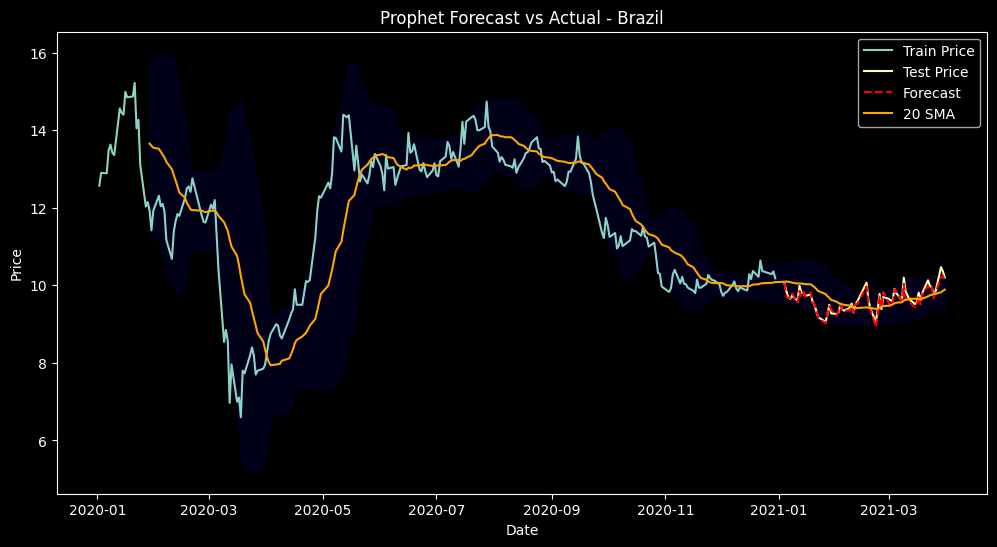

RMSE: 0.08700948151040781
MAPE: 0.6943444436310913%


(0.08700948151040781, 0.006943444436310913)

In [72]:
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
brazil =preprocess_dataframe(brazil)
prophet_forecast (brazil, "Brazil")

19:24:42 - cmdstanpy - INFO - Chain [1] start processing
19:24:42 - cmdstanpy - INFO - Chain [1] done processing


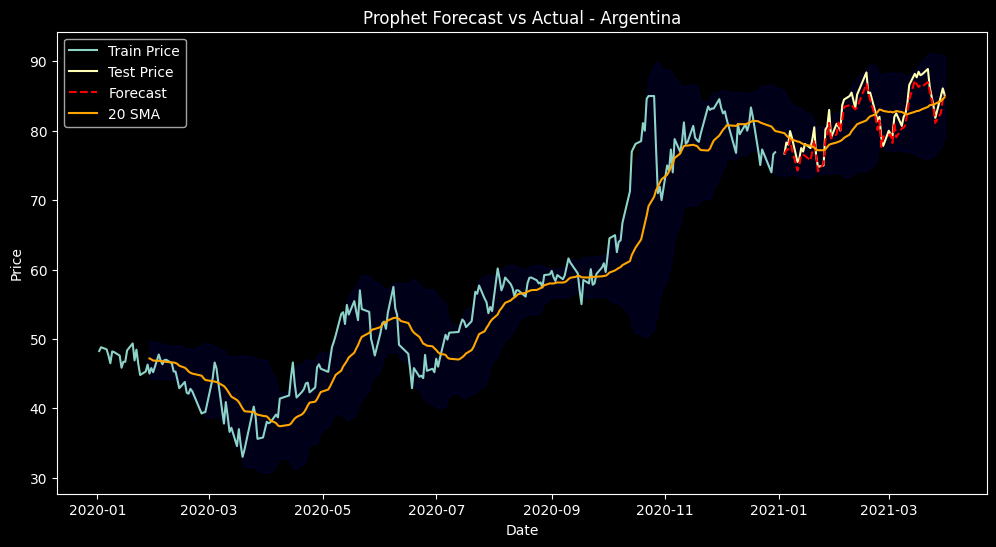

RMSE: 1.3401352293502637
MAPE: 1.386224570533508%


(1.3401352293502637, 0.013862245705335079)

In [73]:
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
argentina =preprocess_dataframe(argentina)
prophet_forecast (argentina, "Argentina")

19:24:43 - cmdstanpy - INFO - Chain [1] start processing
19:24:43 - cmdstanpy - INFO - Chain [1] done processing


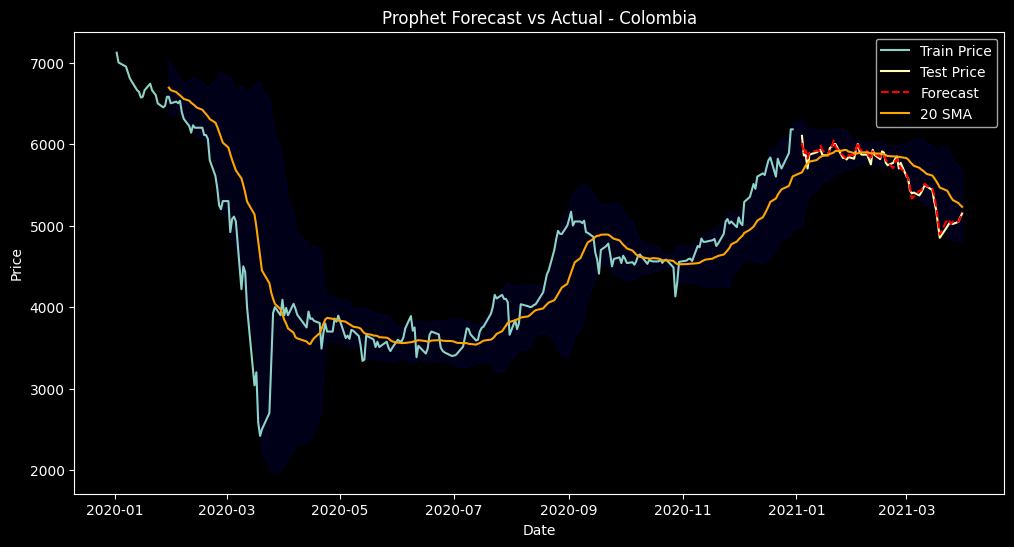

RMSE: 42.228299309946834
MAPE: 0.6114951802117812%


(42.228299309946834, 0.006114951802117812)

In [74]:
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
colombia =preprocess_dataframe(colombia)
prophet_forecast (colombia, 'Colombia')

19:24:43 - cmdstanpy - INFO - Chain [1] start processing
19:24:43 - cmdstanpy - INFO - Chain [1] done processing


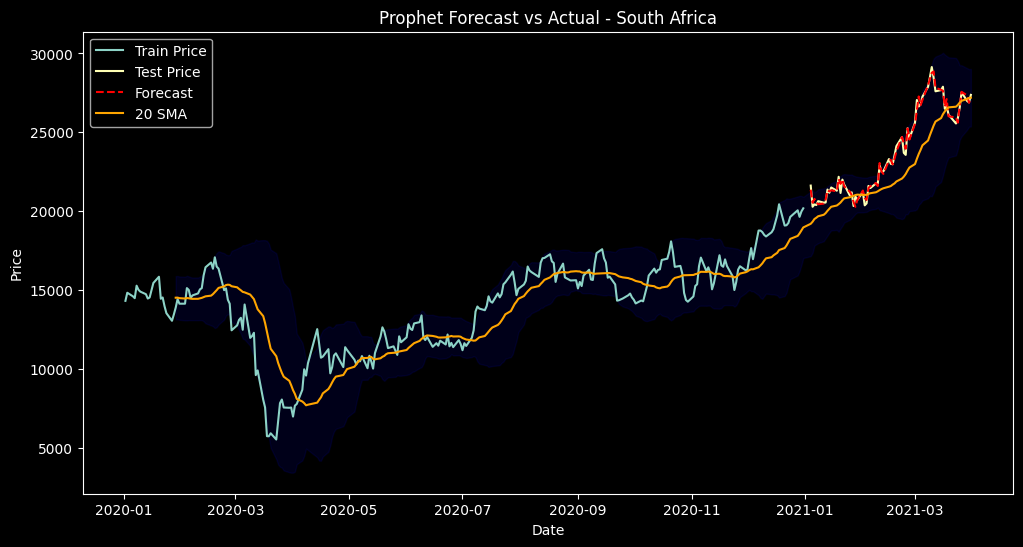

RMSE: 264.94090642229156
MAPE: 0.8599764163332135%


(264.94090642229156, 0.008599764163332135)

In [75]:
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
safrica =preprocess_dataframe(safrica)
prophet_forecast (safrica, "South Africa")

19:24:44 - cmdstanpy - INFO - Chain [1] start processing
19:24:44 - cmdstanpy - INFO - Chain [1] done processing


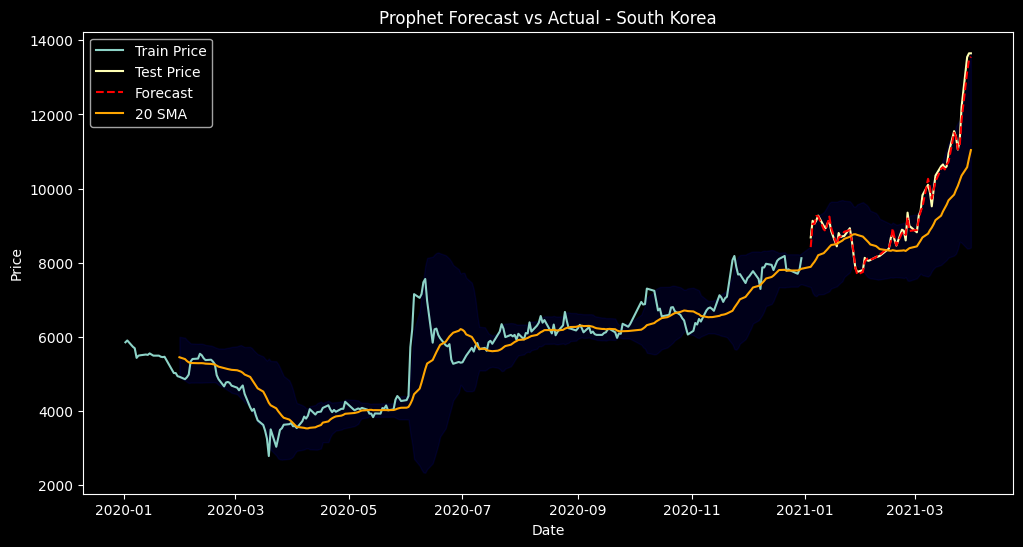

RMSE: 124.00227142160198
MAPE: 0.9323683781038569%


(124.00227142160198, 0.009323683781038568)

In [76]:
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
skorea =preprocess_dataframe(skorea)
prophet_forecast (skorea, "South Korea")

##### Weekly and Monthly Data

In [77]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
print(russiaw)


         Date   Price    Open    High     Low  Volume (M)  Change %  Year  \
0  2020-01-05  255.00  255.99  258.19   253.7       35.85    0.0010  2020   
1  2020-01-12  258.19  254.75  261.76   251.4      120.35    0.0127  2020   
2  2020-01-19  262.50   258.3  263.22  254.21      191.51    0.0170  2020   
3  2020-01-26  265.49   263.2   270.8   261.8      180.10    0.0116  2020   
4  2020-02-02  252.20     261   262.1  252.17      219.33   -0.0503  2020   
..        ...     ...     ...     ...     ...         ...       ...   ...   
61 2021-03-07  277.50     273  283.83  271.13      347.35    0.0272  2021   
62 2021-03-14  284.93   278.8   288.0  277.56      226.86    0.0271  2021   
63 2021-03-21  285.47  286.05  293.88  278.03      390.40    0.0031  2021   
64 2021-03-28  291.22     285  292.75  282.11      271.22    0.0203  2021   
65 2021-04-04  291.02  289.72  295.72  289.26      129.49   -0.0007  2021   

    Month  
0       1  
1       1  
2       1  
3       1  
4       2  
.. 

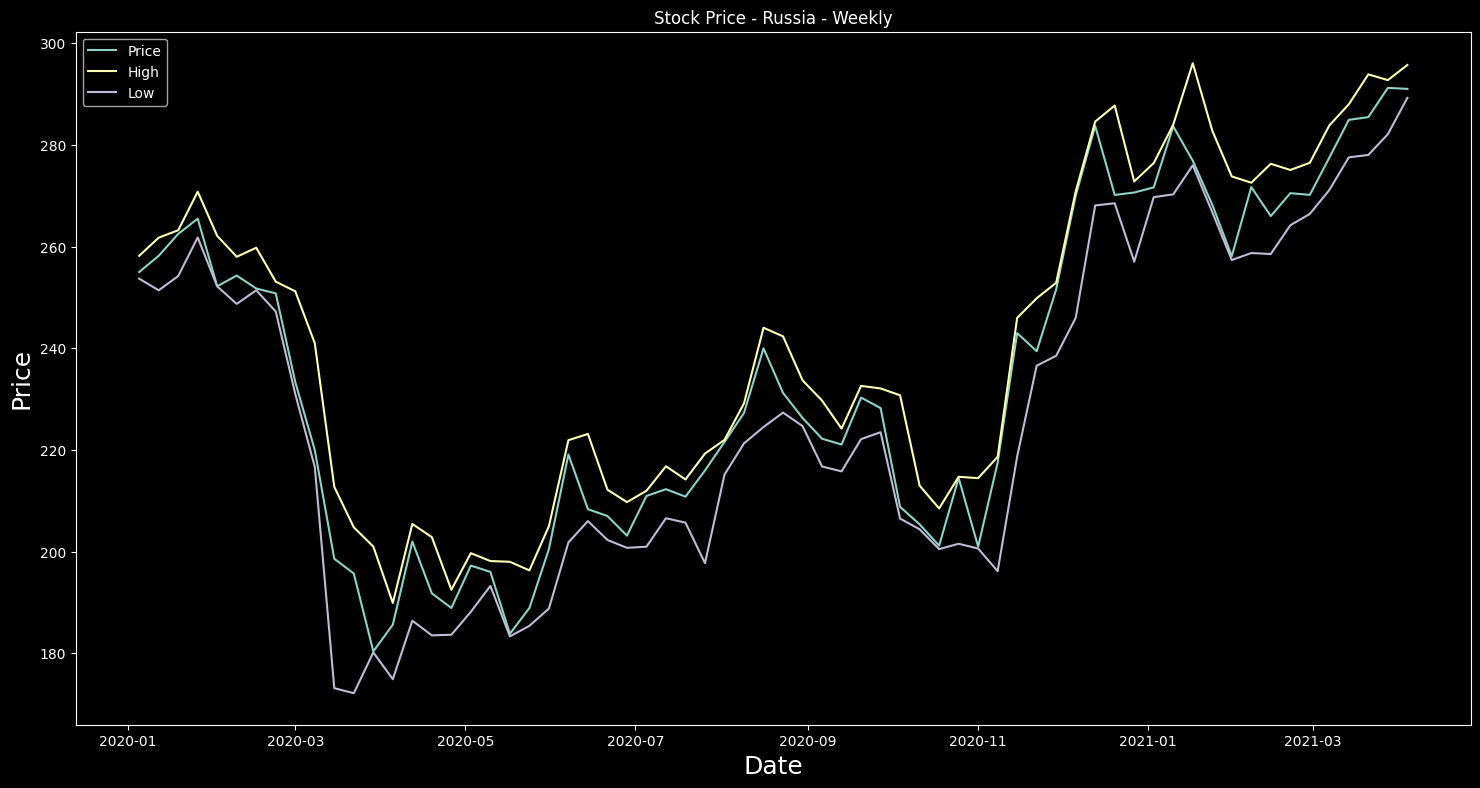

In [78]:
plot_stock_data(russiaw, "Russia - Weekly")
candlestick_volume(russiaw, "Russia - Weekly")

ADF Statistic: -1.1439622805197525
p-value: 0.6972258192509497
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-59.865, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-67.641, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-61.865, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-73.186, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-77.168, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-75.253, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-79.323, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-78.122, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-77.910, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-76.361, Time=0.25 sec


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



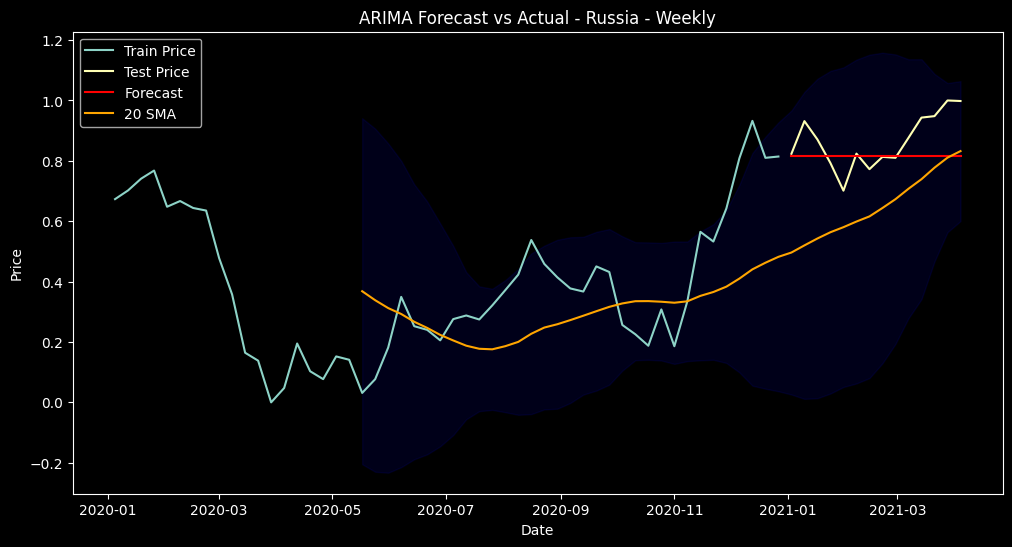

RMSE: 0.0980502255770294
MAPE: 8.360122497751922%


(0.0980502255770294, 0.08360122497751922)

In [79]:
arima(russiaw, "Russia - Weekly")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=244.961, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=246.918, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=246.907, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.050, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=248.698, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.313 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -120.481
Date:                Sat, 22 Jun 2024   AIC                            244.961
Time:                        19:24:48   BIC                            247.893
Sample:                    05-17-2020   HQIC                           245.933
                    

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



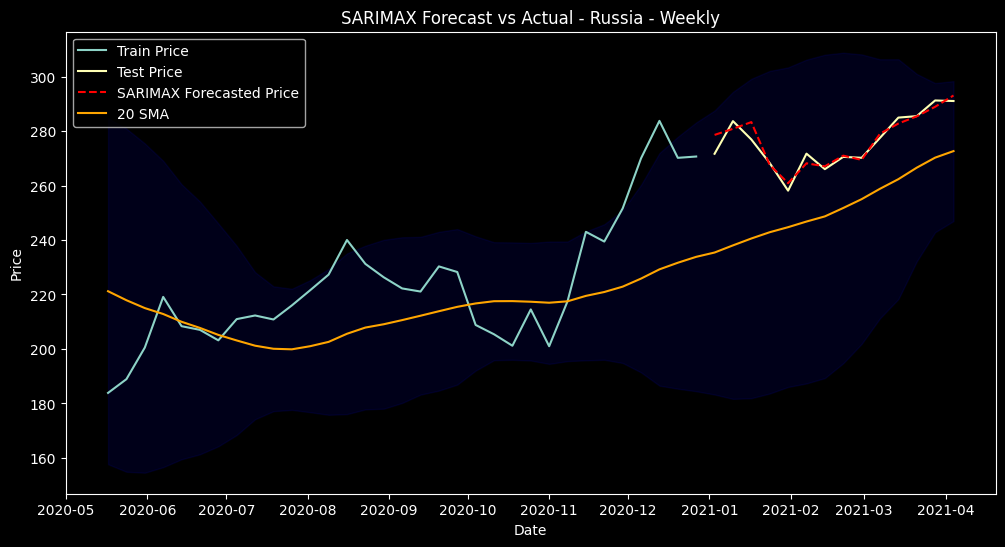

RMSE: 3.111519272025079
MAPE: 0.8667641629087323%


(3.111519272025079, 0.008667641629087322)

In [80]:
sarimax_forecast(russiaw, "Russia - Weekly")

19:24:51 - cmdstanpy - INFO - Chain [1] start processing
19:24:51 - cmdstanpy - INFO - Chain [1] done processing


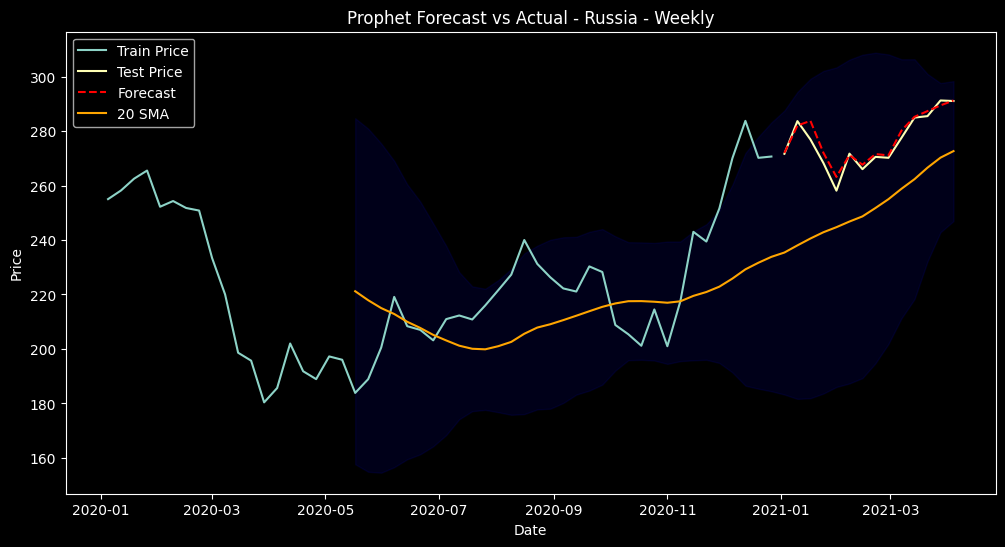

RMSE: 2.7728852124076813
MAPE: 0.7445787083605893%


(2.7728852124076813, 0.007445787083605893)

In [81]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
prophet_forecast(russiaw, "Russia - Weekly")

In [82]:
# Monthly data
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
print(russiam)

         Date   Price    Open    High     Low  Volume (M)  Change %  Year  \
0  2020-01-31  252.20  255.99   270.8   251.4      747.14   -0.0080  2020   
1  2020-02-29  233.36   251.8  259.77   231.0      919.84   -0.0754  2020   
2  2020-03-31  187.21  238.93   241.0  172.15     3001.72   -0.1884  2020   
3  2020-04-30  197.25   183.2  205.44   182.0     1768.20    0.0566  2020   
4  2020-05-31  200.50  195.68   205.0  183.33     1359.04    0.0192  2020   
5  2020-06-30  203.22   203.1  223.15  200.75     1522.28    0.0181  2020   
6  2020-07-31  221.57     205  221.98  197.73     1088.09    0.0881  2020   
7  2020-08-31  226.10  222.27  244.04   221.3     1324.47    0.0226  2020   
8  2020-09-30  229.14   226.7   232.6  215.79     1402.03    0.0152  2020   
9  2020-10-31  200.99  229.08   229.9   200.5     1488.75   -0.1255  2020   
10 2020-11-30  249.63  200.45  252.88  196.15     2310.97    0.2214  2020   
11 2020-12-31  271.65  250.75  287.74   249.8     1660.36    0.0880  2020   

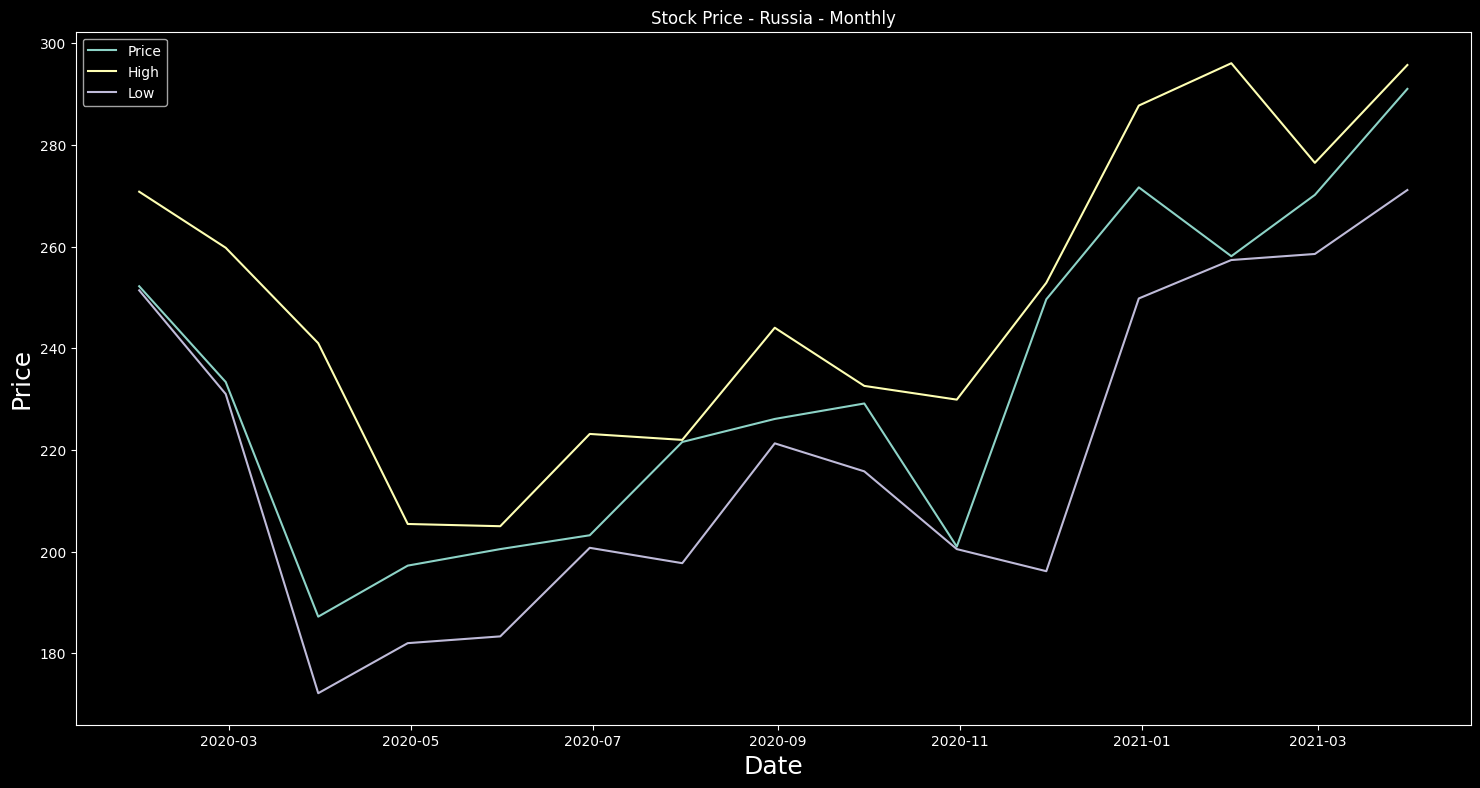

In [83]:
plot_stock_data(russiam, "Russia - Monthly")
candlestick_volume(russiam, "Russia - Monthly")

In [84]:
# Split the data
train_russiam = russiam[russiam['Year'] == 2020]
test_russiam = russiam[russiam['Year'] == 2021]

ADF Statistic: -0.12004692243057899
p-value: 0.9474048119507879
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10.259, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7.304, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8.399, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8.834, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6.714, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8.387, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8.105, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6.160, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8.092, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.698 seconds
    

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



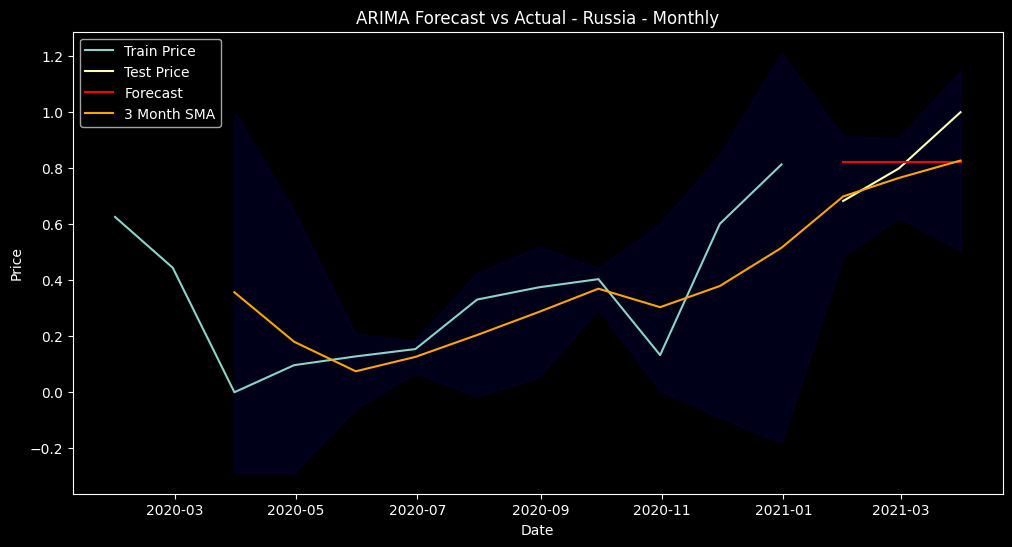

RMSE: 0.13108897664551264
MAPE: 13.637825669925629%


(0.13108897664551264, 0.1363782566992563)

In [85]:
arima_monthly(russiam, "Russia - Monthly")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.163, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=114.640, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=113.298, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=165.947, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=115.016, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.564 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -53.649
Date:                Sat, 22 Jun 2024   AIC                            113

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



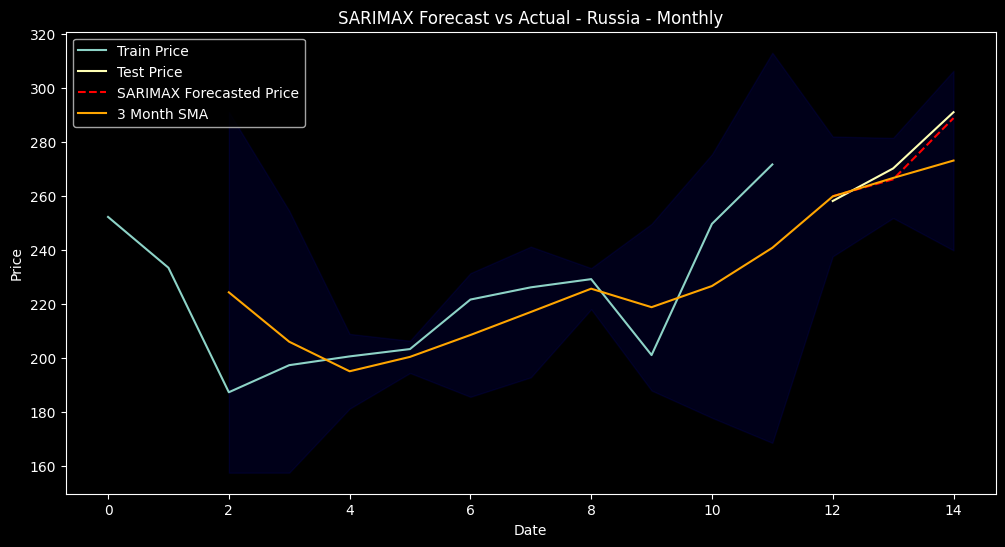

RMSE: 2.8406057166654204
MAPE: 0.9774017007729943%


(2.8406057166654204, 0.009774017007729943)

In [86]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
sarimax_forecast_monthly(russiam, "Russia - Monthly")

19:24:55 - cmdstanpy - INFO - Chain [1] start processing
19:25:02 - cmdstanpy - INFO - Chain [1] done processing


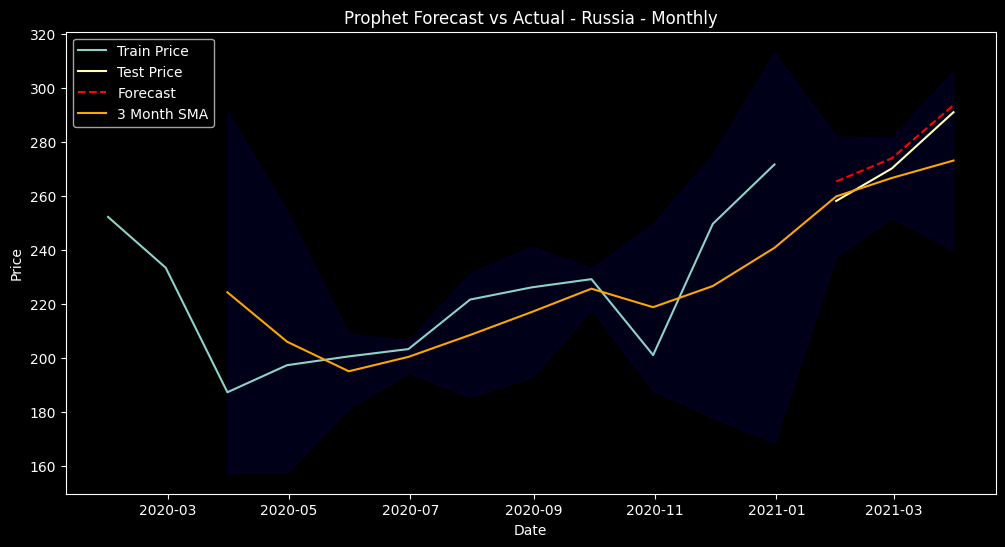

RMSE: 4.941983127908301
MAPE: 1.6981650137467257%


(4.941983127908301, 0.016981650137467257)

In [87]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
prophet_forecast_monthly(russiam, "Russia - Monthly")

##### Recommendation System

##### Even though the ARIMA model had the lowest RMSE and MAPE values, we can see from the chart that the forecasted price is a flat line. The SARIMAX model had the lowest RMSE and MAPE values for the daily and weekly charts for the majority of markets with linear regression and Prophet closely behind. We will use the SARIMAX model for recommendation. For all of our monthly charts, we used a 3-month moving average and the forecasted price never touched the Bollinger Bands on any of our models, therefore we will not try to recommend any buying or selling for that timeframe.

##### We can see that the forecasts are within the Bollinger Bands. In order to determine if we should buy or hold, we will use the first standard deviation Bollinger Bands. If the forecasted price touches the lower band we should buy and exit the position when the price goes back up to the SMA, otherwise we should hold.

##### We start with an account balance of $10,000 for each market. We will keep track of the number of trades taken, the average hold time, average return and cumulative account balance.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1499.638, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1501.228, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1501.180, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1497.685, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1502.372, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.551 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



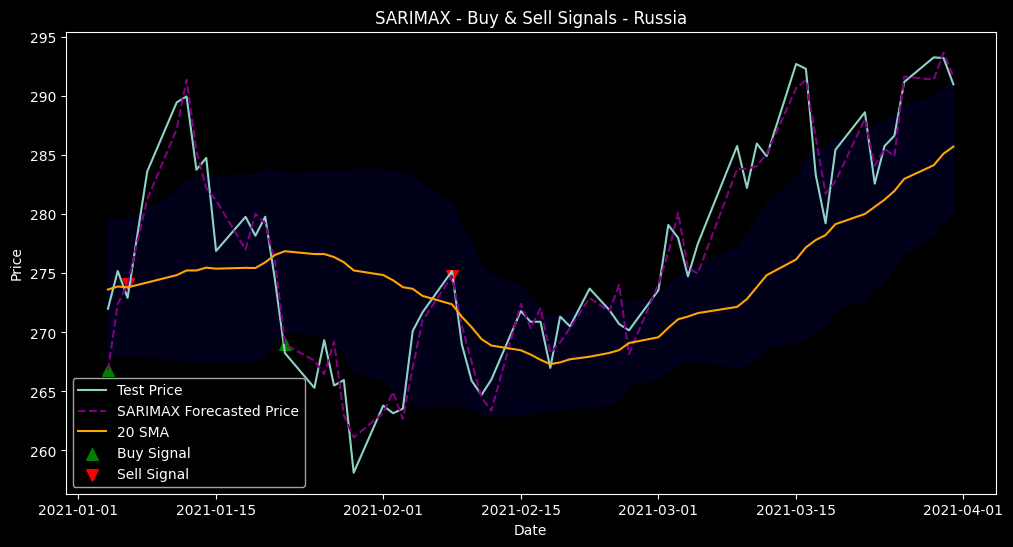

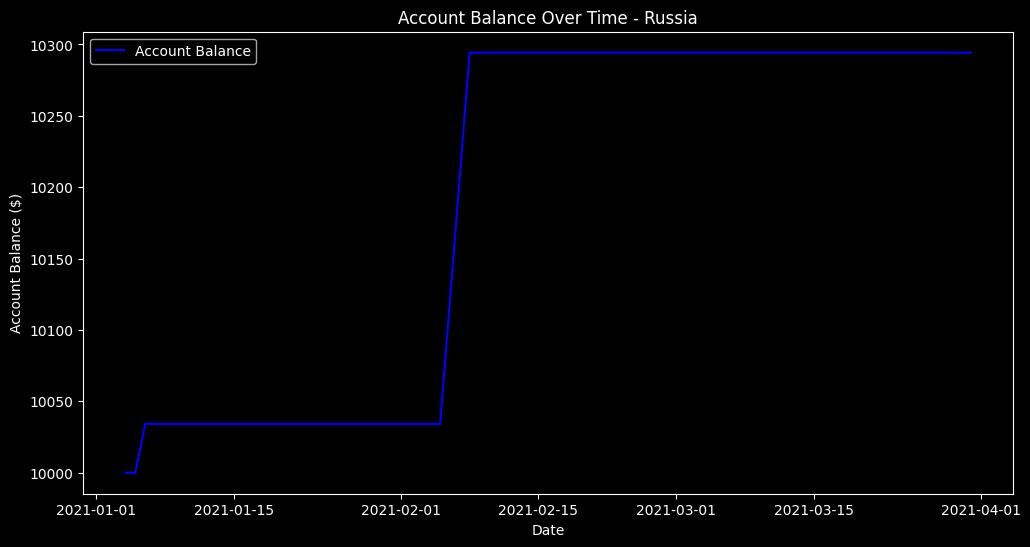

Number of trades: 2
Average hold time: 9.50 days
Average return per trade: 1.47%
Final account balance: $10294.16


Price    Open    High     Low  Change %  Volume (M)  Year  Month  \
Date                                                                            
2021-01-04  272.00  274.67  276.60  270.61    0.0013       48.92  2021      1   
2021-01-05  275.20  272.69  275.70  270.28    0.0118       45.58  2021      1   
2021-01-06  272.93  275.94  275.94  271.62   -0.0082       40.95  2021      1   
2021-01-08  283.64  275.11  283.99  275.11    0.0392       88.93  2021      1   
2021-01-11  289.49  282.86  292.95  279.48    0.0206      112.35  2021      1   
...            ...     ...     ...     ...       ...         ...   ...    ...   
2021-03-25  286.66  286.50  287.03  283.85    0.0030       35.22  2021      3   
2021-03-26  291.22  288.63  292.75  288.32    0.0159       56.07  2021      3   
2021-03-29  293.30  289.72  294.09  289.26    0.0071       43.68  2021      3   
2021-03-30  293.25  294.86  295.72  291.50   -0.0002       38.81  2021      3   
2021-03-31  291.02  294.00  294.42  290.26   -0.0076       47.00  2021      3   

              Forecast Recommendation  Upper_Band  Lower_Band    20_SMA  
Date                                                                     
2021-01-04  266.774901            Buy  279.485593  267.771407  273.6285  
2021-01-05  272.397635           Hold  279.691207  268.085793  273.8885  
2021-01-06  274.065268           Sell  279.622401  268.011599  273.8170  
2021-01-08  281.264408           Hold  280.426038  268.022962  274.2245  
2021-01-11  287.233382           Hold  281.920784  267.788216  274.8545  
...                ...            ...         ...         ...       ...  
2021-03-25  284.918942           Hold  288.464160  275.497840  281.9810  
2021-03-26  291.670911           Hold  289.229914  276.783086  283.0065  
2021-03-29  291.422626           Hold  290.013404  278.312596  284.1630  
2021-03-30  293.695854           Hold  290.773247  279.519753  285.1465  
2021-03-31  291.706014           Hold  291.326212  280.158788  285.7425  

[61 rows x 13 columns]

In [88]:
#Daily buy and sell signals
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russia=preprocess_dataframe(russia)
#lr_recommend(russia, "Russia", leads=[1])
sarimax_recommend(russia, "Russia")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=404.134, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=491.861, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.594, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=448.107, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=712.900, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=400.125, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=400.209, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=398.958, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=404.119, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=402.182, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=402.057, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=406.913, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.467 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



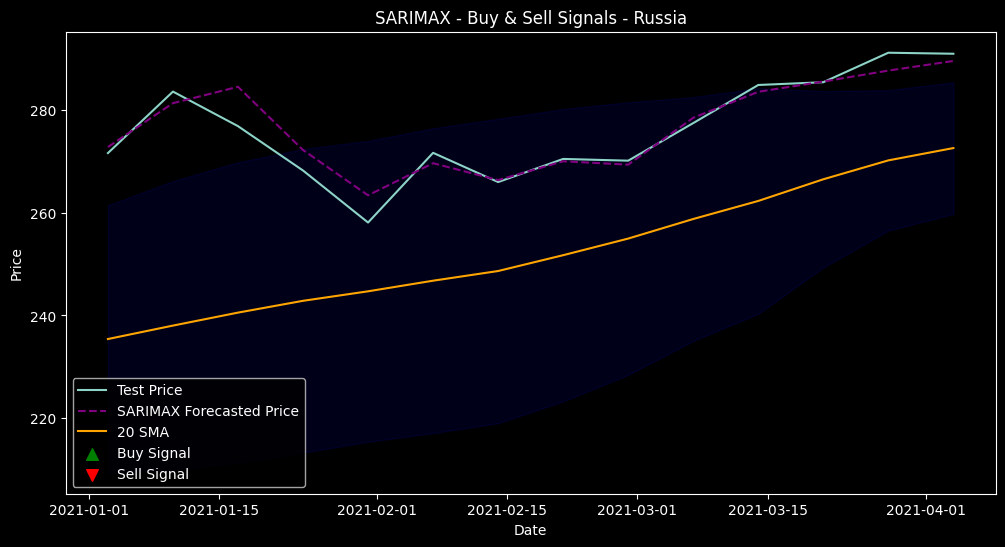

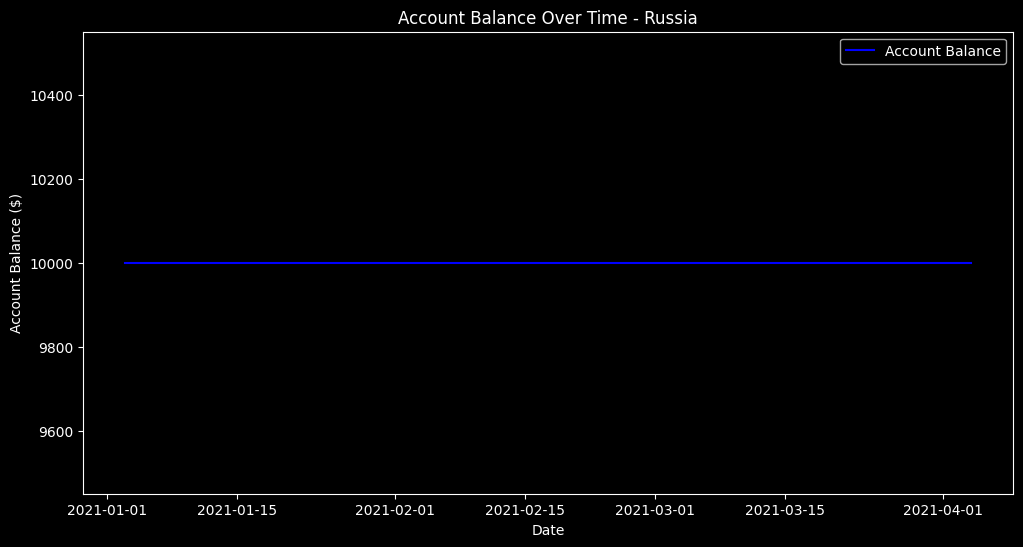

Number of trades: 0
Average hold time: 0.00 days
Average return per trade: 0.00%
Final account balance: $10000.00


Price    Open    High     Low  Volume (M)  Change %  Year  Month  \
Date                                                                            
2021-01-03  271.65  270.90  276.43  269.73      109.59    0.0039  2021      1   
2021-01-10  283.64  274.67  283.99  270.28      224.38    0.0441  2021      1   
2021-01-17  276.90  282.86  296.07  276.00      407.31   -0.0232  2021      1   
2021-01-24  268.25  275.72  282.80  266.78      348.69   -0.0312  2021      1   
2021-01-31  258.11  271.00  273.80  257.36      491.02   -0.0379  2021      1   
2021-02-07  271.70  260.00  272.57  258.73      371.05    0.0518  2021      2   
2021-02-14  266.00  273.01  276.29  258.55      327.22   -0.0208  2021      2   
2021-02-21  270.51  268.49  275.07  264.19      325.91    0.0173  2021      2   
2021-02-28  270.17  270.10  276.48  266.43      266.93   -0.0012  2021      2   
2021-03-07  277.50  273.00  283.83  271.13      347.35    0.0272  2021      3   
2021-03-14  284.93  278.80  288.00  277.56      226.86    0.0271  2021      3   
2021-03-21  285.47  286.05  293.88  278.03      390.40    0.0031  2021      3   
2021-03-28  291.22  285.00  292.75  282.11      271.22    0.0203  2021      3   
2021-04-04  291.02  289.72  295.72  289.26      129.49   -0.0007  2021      4   

              Forecast Recommendation  Upper_Band  Lower_Band    20_SMA  
Date                                                                     
2021-01-03  272.836216           Hold  261.461346  209.324654  235.3930  
2021-01-10  281.382904           Hold  266.190680  209.837320  238.0140  
2021-01-17  284.578430           Hold  269.862098  211.225902  240.5440  
2021-01-24  272.246970           Hold  272.454826  213.237174  242.8460  
2021-01-31  263.415399           Hold  274.030187  215.365813  244.6980  
2021-02-07  269.679602           Hold  276.488872  217.047128  246.7680  
2021-02-14  266.380754           Hold  278.337259  218.974741  248.6560  
2021-02-21  270.054087           Hold  280.245661  223.237339  251.7415  
2021-02-28  269.394813           Hold  281.555216  228.406784  254.9810  
2021-03-07  278.537805           Hold  282.570282  235.024718  258.7975  
2021-03-14  283.601288           Hold  284.336192  240.301808  262.3190  
2021-03-21  285.600252           Hold  283.754161  249.331839  266.5430  
2021-03-28  287.738752           Hold  283.917766  256.540234  270.2290  
2021-04-04  289.612696           Hold  285.476188  259.784812  272.6305

In [89]:
#Weekly buy and sell signals
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
#lr_recommend(russiaw, "Russia", leads=[7])
sarimax_recommend(russiaw, "Russia")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=259.173, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=254.949, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=256.283, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=256.238, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=252.963, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=257.994, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.930 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

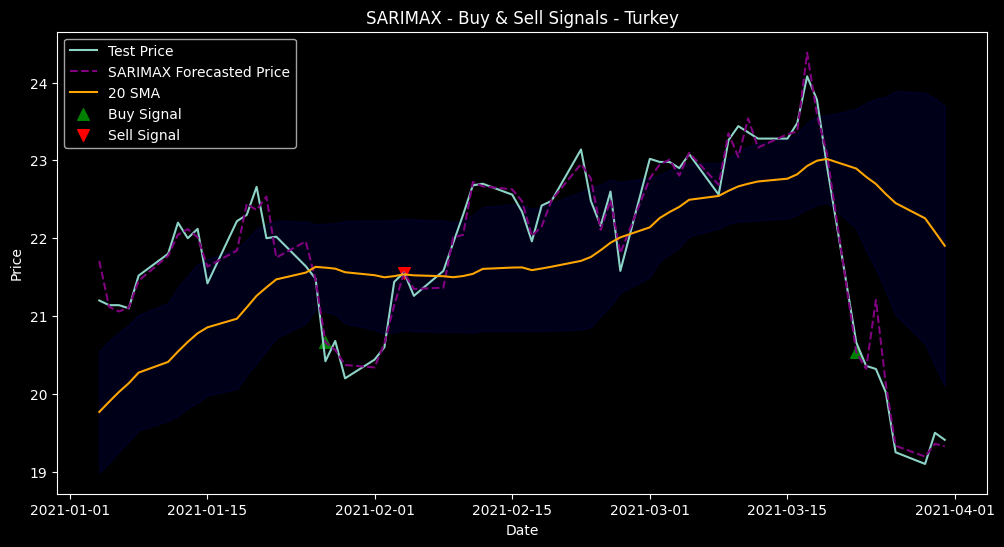

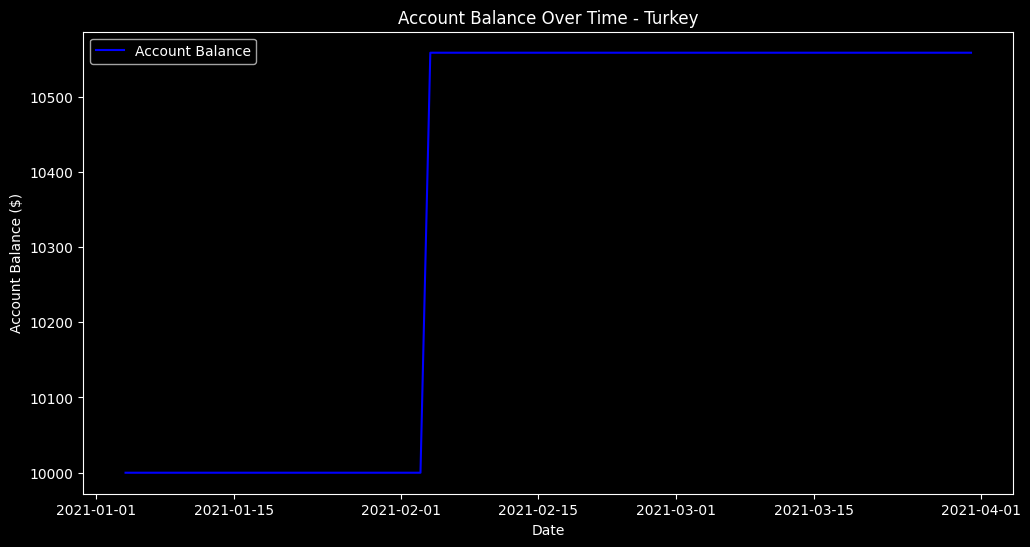

Number of trades: 1
Average hold time: 8.00 days
Average return per trade: 5.58%
Final account balance: $10558.28


Price   Open   High    Low  Change %  Volume (M)  Year  Month  \
Date                                                                        
2021-01-04  21.20  21.12  21.50  21.04    0.0038       10.53  2021      1   
2021-01-05  21.14  21.00  21.60  20.86   -0.0028       15.65  2021      1   
2021-01-06  21.14  21.24  21.34  20.86    0.0000       12.23  2021      1   
2021-01-07  21.10  21.20  21.26  20.88   -0.0019        7.91  2021      1   
2021-01-08  21.52  21.22  21.52  21.12    0.0199       10.36  2021      1   
...           ...    ...    ...    ...       ...         ...   ...    ...   
2021-03-25  20.02  20.50  20.86  20.02   -0.0148       15.93  2021      3   
2021-03-26  19.25  20.28  20.36  19.10   -0.0385       21.35  2021      3   
2021-03-29  19.10  19.24  19.67  19.10   -0.0078       16.56  2021      3   
2021-03-30  19.50  19.12  19.81  19.03    0.0209       21.05  2021      3   
2021-03-31  19.41  19.42  19.63  19.27   -0.0046       13.14  2021      3   

             Forecast Recommendation  Upper_Band  Lower_Band   20_SMA  
Date                                                                   
2021-01-04  21.707901           Hold   20.549662   18.987338  19.7685  
2021-01-05  21.117393           Hold   20.680381   19.117619  19.8990  
2021-01-06  21.059194           Hold   20.792336   19.257664  20.0250  
2021-01-07  21.108259           Hold   20.888260   19.386740  20.1375  
2021-01-08  21.453035           Hold   21.015533   19.531467  20.2735  
...               ...            ...         ...         ...      ...  
2021-03-25  20.129395           Hold   23.815303   21.320697  22.5680  
2021-03-26  19.333383           Hold   23.890086   21.012914  22.4515  
2021-03-29  19.194485           Hold   23.868965   20.642035  22.2555  
2021-03-30  19.359017           Hold   23.797132   20.365868  22.0815  
2021-03-31  19.326270           Hold   23.703831   20.102169  21.9030  

[63 rows x 13 columns]

In [90]:
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
turkey=preprocess_dataframe(turkey)
sarimax_recommend(turkey, 'Turkey')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-467.609, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-460.434, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-473.345, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-472.224, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-461.963, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-471.346, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-471.346, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-469.353, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-474.986, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-472.988, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-472.987, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-473.835, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-470.995, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.355 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

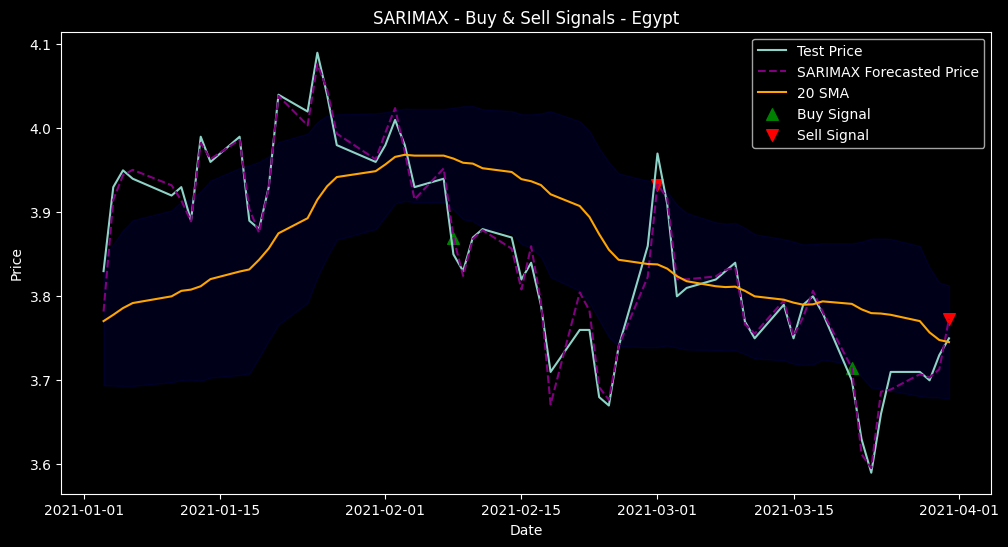

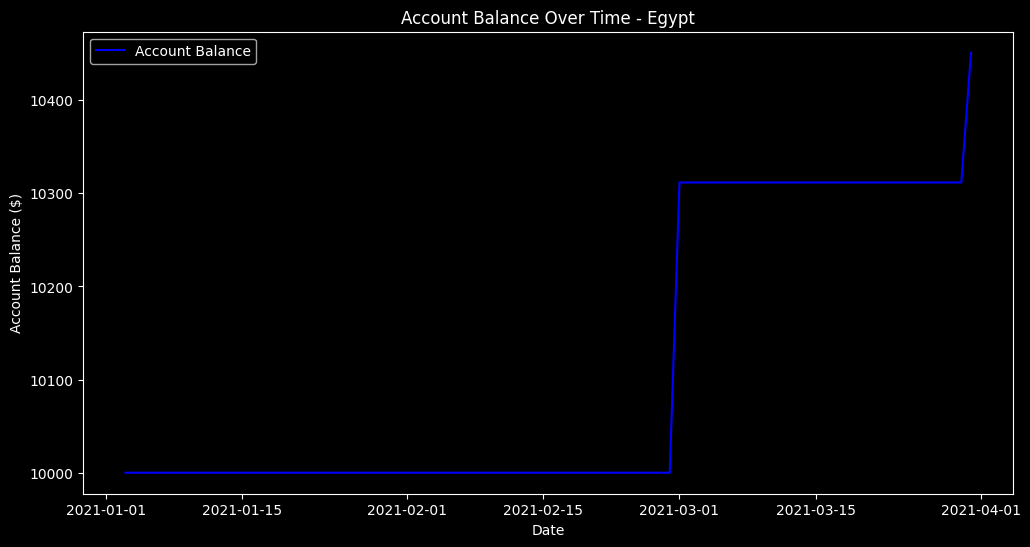

Number of trades: 2
Average hold time: 15.50 days
Average return per trade: 2.23%
Final account balance: $10451.04


Price  Open  High   Low  Change %  Volume (M)  Year  Month  \
Date                                                                     
2021-01-03   3.83  3.79  3.87  3.79    0.0026        3.57  2021      1   
2021-01-04   3.93  3.85  3.98  3.85    0.0261       14.77  2021      1   
2021-01-05   3.95  3.99  3.99  3.91    0.0051        4.39  2021      1   
2021-01-06   3.94  3.95  4.00  3.90   -0.0025        5.85  2021      1   
2021-01-10   3.92  3.99  3.99  3.89   -0.0051        3.36  2021      1   
...           ...   ...   ...   ...       ...         ...   ...    ...   
2021-03-25   3.71  3.62  3.78  3.59    0.0137        2.50  2021      3   
2021-03-28   3.71  3.76  3.76  3.68    0.0000        2.34  2021      3   
2021-03-29   3.70  3.69  3.73  3.68   -0.0027        1.25  2021      3   
2021-03-30   3.73  3.71  3.76  3.67    0.0081        3.43  2021      3   
2021-03-31   3.75  3.74  3.82  3.71    0.0054        1.57  2021      3   

            Forecast Recommendation  Upper_Band  Lower_Band  20_SMA  
Date                                                                 
2021-01-03  3.781891           Hold    3.846898    3.694102  3.7705  
2021-01-04  3.914948           Hold    3.862330    3.693670  3.7780  
2021-01-05  3.944268           Hold    3.878702    3.693298  3.7860  
2021-01-06  3.950581           Hold    3.890707    3.693293  3.7920  
2021-01-10  3.932208           Hold    3.902392    3.697608  3.8000  
...              ...            ...         ...         ...     ...  
2021-03-25  3.689046           Hold    3.868356    3.687644  3.7780  
2021-03-28  3.707295           Hold    3.859912    3.681088  3.7705  
2021-03-29  3.703331           Hold    3.834262    3.679738  3.7570  
2021-03-30  3.713180           Hold    3.816487    3.679513  3.7480  
2021-03-31  3.773165           Sell    3.812893    3.678107  3.7455  

[62 rows x 13 columns]

In [91]:
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
egypt =preprocess_dataframe(egypt)
sarimax_recommend (egypt, "Egypt")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=265.497, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1023.381, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=272.351, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=755.560, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1943.520, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=268.521, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=274.402, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=263.052, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=267.459, Time=0.38 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=261.718, Time=0.44 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=263.998, Time=0.38 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=262.996, Time=0.49 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=262.035, Time=0.63 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=262.380, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=265

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

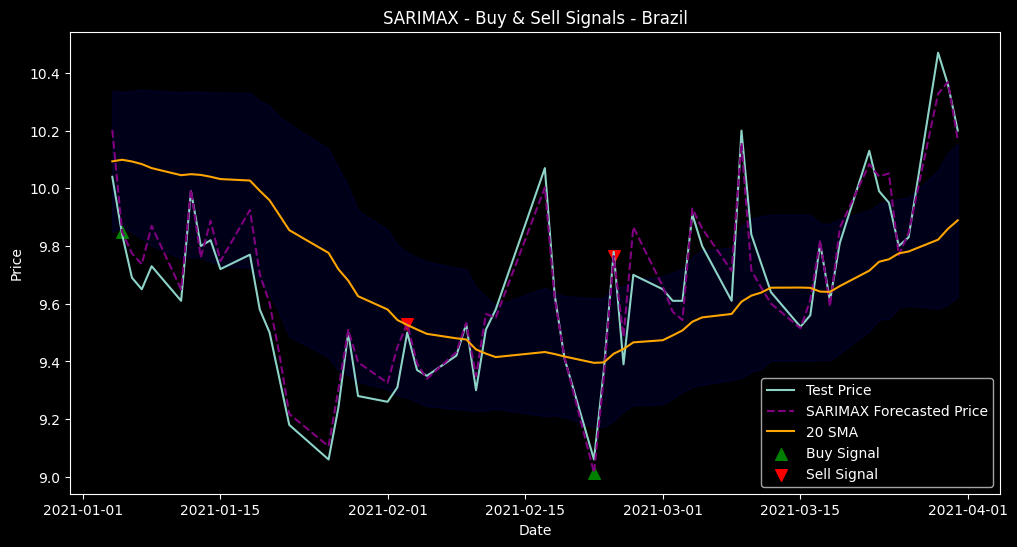

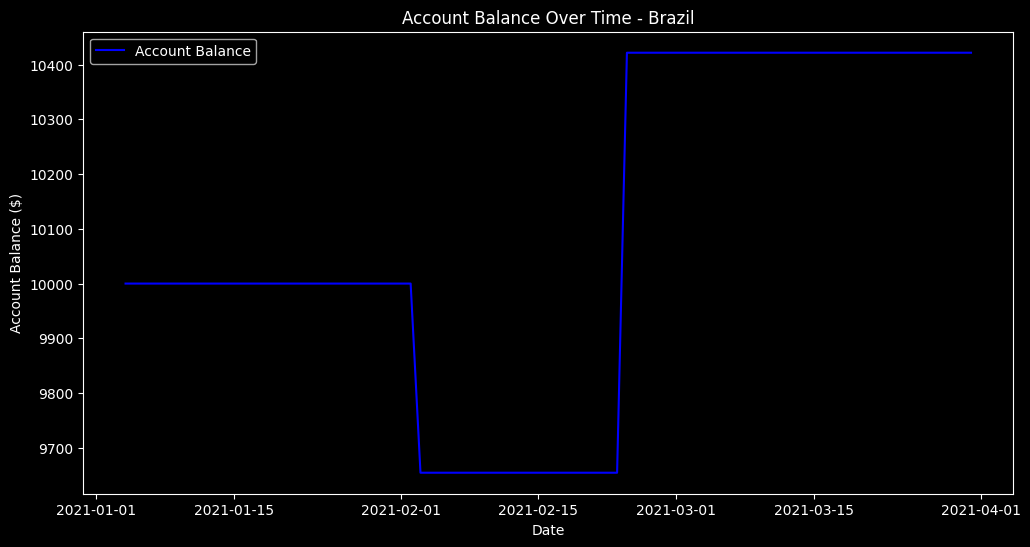

Number of trades: 2
Average hold time: 15.50 days
Average return per trade: 2.25%
Final account balance: $10421.71


Price   Open   High    Low  Change %  Volume (M)  Year  Month  \
Date                                                                        
2021-01-04  10.04  10.23  10.32  10.03   -0.0138        6.12  2021      1   
2021-01-05   9.84  10.07  10.10   9.77   -0.0199       13.66  2021      1   
2021-01-06   9.69   9.85   9.86   9.69   -0.0152        8.36  2021      1   
2021-01-07   9.65   9.75   9.81   9.62   -0.0041        7.77  2021      1   
2021-01-08   9.73   9.67   9.85   9.66    0.0083        7.46  2021      1   
2021-01-11   9.61   9.70   9.80   9.60   -0.0123       10.90  2021      1   
2021-01-12   9.99   9.68  10.03   9.62    0.0395       14.24  2021      1   
2021-01-13   9.80  10.05  10.06   9.68   -0.0190       11.38  2021      1   
2021-01-14   9.82   9.86   9.96   9.73    0.0020        7.00  2021      1   
2021-01-15   9.72   9.80   9.82   9.69   -0.0102        6.36  2021      1   
2021-01-18   9.77   9.77   9.93   9.75    0.0051        5.82  2021      1   
2021-01-19   9.58   9.84   9.88   9.57   -0.0194        6.05  2021      1   
2021-01-20   9.50   9.64   9.72   9.42   -0.0084        6.23  2021      1   
2021-01-21   9.34   9.50   9.61   9.31   -0.0168        6.82  2021      1   
2021-01-22   9.18   9.25   9.32   9.15   -0.0171        6.45  2021      1   
2021-01-26   9.06   9.20   9.28   9.02   -0.0131        7.02  2021      1   
2021-01-27   9.24   9.07   9.38   8.99    0.0199        7.61  2021      1   
2021-01-28   9.50   9.23   9.55   9.16    0.0281        7.24  2021      1   
2021-01-29   9.28   9.44   9.69   9.28   -0.0232        8.77  2021      1   
2021-02-01   9.26   9.42   9.47   9.15   -0.0022        7.15  2021      2   
2021-02-02   9.31   9.34   9.62   9.22    0.0054        9.34  2021      2   
2021-02-03   9.50   9.36   9.57   9.32    0.0204        9.70  2021      2   
2021-02-04   9.37   9.50   9.57   9.31   -0.0137        7.95  2021      2   
2021-02-05   9.35   9.40   9.46   9.30   -0.0021        8.75  2021      2   
2021-02-08   9.42   9.37   9.49   9.31    0.0075        8.46  2021      2   
2021-02-09   9.53   9.39   9.58   9.38    0.0117        5.93  2021      2   
2021-02-10   9.30   9.54   9.56   9.27   -0.0241        4.62  2021      2   
2021-02-11   9.51   9.36   9.53   9.34    0.0226        5.16  2021      2   
2021-02-12   9.58   9.52   9.66   9.37    0.0074        8.31  2021      2   
2021-02-17  10.07   9.65  10.12   9.56    0.0511       14.53  2021      2   
2021-02-18   9.63  10.07  10.07   9.61   -0.0437        9.25  2021      2   
2021-02-19   9.41   9.61   9.70   9.32   -0.0228        7.54  2021      2   
2021-02-22   9.06   9.23   9.33   9.05   -0.0372        9.95  2021      2   
2021-02-23   9.37   9.16   9.45   9.01    0.0342       12.25  2021      2   
2021-02-24   9.78   9.38   9.83   9.28    0.0438        8.48  2021      2   
2021-02-25   9.39   9.80   9.95   9.35   -0.0399        8.03  2021      2   
2021-02-26   9.70   9.75  10.08   9.66    0.0330       24.78  2021      2   
2021-03-01   9.65   9.92   9.94   9.51   -0.0052       13.15  2021      3   
2021-03-02   9.61   9.54   9.75   9.45   -0.0041        9.84  2021      3   
2021-03-03   9.61   9.58   9.84   9.31    0.0000       11.47  2021      3   
2021-03-04   9.91   9.62  10.09   9.61    0.0312       12.96  2021      3   
2021-03-05   9.80   9.86  10.04   9.80   -0.0111        7.61  2021      3   
2021-03-08   9.61   9.65  10.04   9.56   -0.0194       11.74  2021      3   
2021-03-09  10.20   9.76  10.25   9.70    0.0614       17.84  2021      3   
2021-03-10   9.84  10.25  10.30   9.63   -0.0353       16.70  2021      3   
2021-03-11   9.74   9.87   9.91   9.64   -0.0102       11.77  2021      3   
2021-03-12   9.64   9.68   9.76   9.56   -0.0103        7.49  2021      3   
2021-03-15   9.52   9.67   9.69   9.51   -0.0124        8.38  2021      3   
2021-03-16   9.56   9.61   9.70   9.46    0.0042        7.05  2021      3   
2021-03-17   9.81   9.59   9.84   9.51    0.0262        7.72  2021      3   
2021-03-

In [92]:
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
brazil =preprocess_dataframe(brazil)
sarimax_recommend (brazil, "Brazil")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1030.896, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1031.735, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1031.803, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1029.693, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1032.387, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.546 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



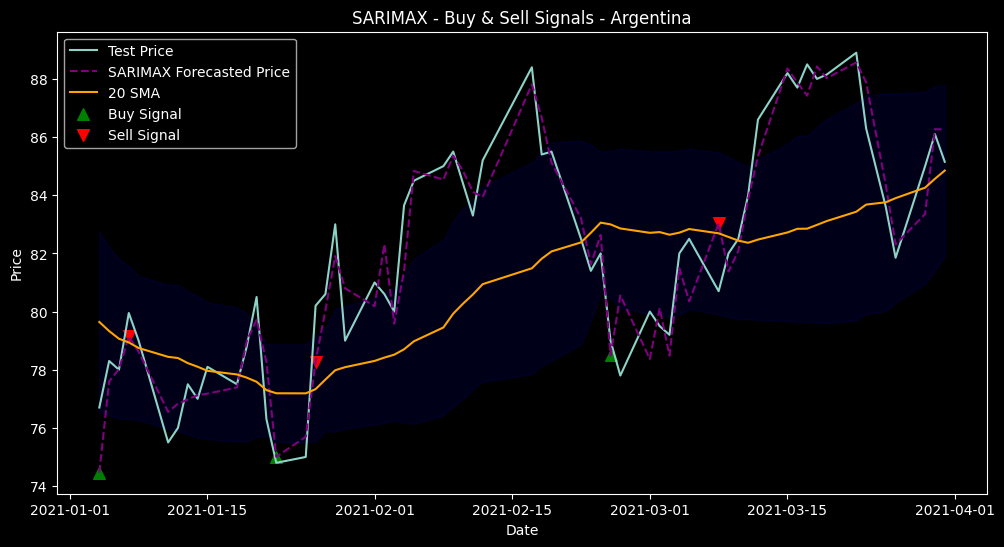

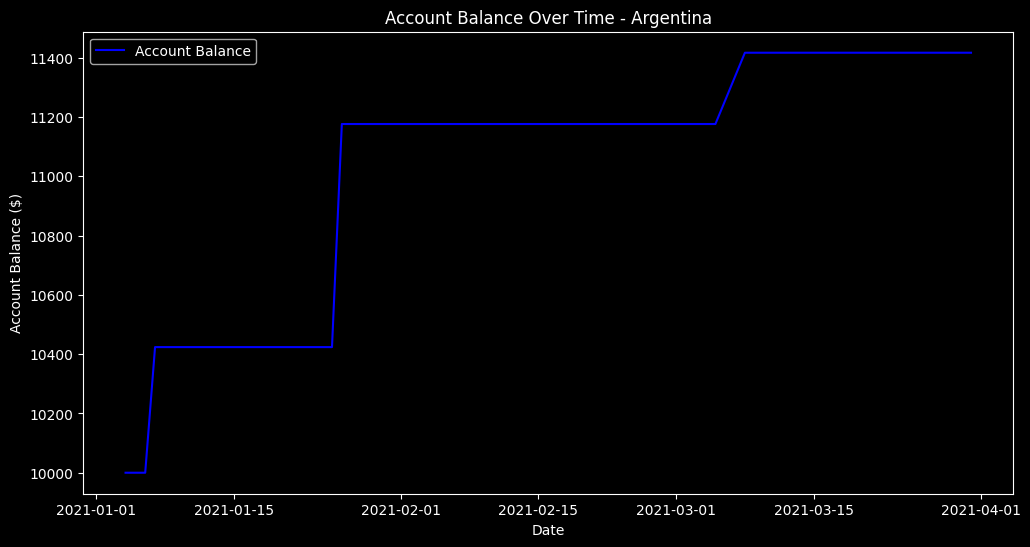

Number of trades: 3
Average hold time: 6.00 days
Average return per trade: 4.54%
Final account balance: $11416.75


Price   Open   High    Low  Change %  Volume (M)  Year  Month  \
Date                                                                        
2021-01-04  76.70  76.90  78.10  76.00   -0.0026    0.000463  2021      1   
2021-01-05  78.30  76.65  78.90  76.20    0.0209    0.000500  2021      1   
2021-01-06  78.00  77.60  78.90  77.00   -0.0038    0.000176  2021      1   
2021-01-07  79.95  76.60  80.40  76.60    0.0250    0.000414  2021      1   
2021-01-08  79.00  79.45  79.90  76.30   -0.0119    0.000836  2021      1   
2021-01-11  75.50  76.70  77.20  73.80   -0.0443    0.000251  2021      1   
2021-01-12  76.00  74.55  78.00  73.20    0.0066    0.000437  2021      1   
2021-01-13  77.50  76.05  78.00  75.50    0.0197    0.000253  2021      1   
2021-01-14  77.00  78.00  78.50  75.80   -0.0065    0.000741  2021      1   
2021-01-15  78.10  77.10  78.10  75.40    0.0143    0.000353  2021      1   
2021-01-18  77.50  76.10  77.50  75.10   -0.0077    0.000172  2021      1   
2021-01-19  78.80  76.10  79.00  76.10    0.0168    0.000569  2021      1   
2021-01-20  80.50  78.70  80.50  77.25    0.0216    0.000393  2021      1   
2021-01-21  76.30  78.10  80.10  75.50   -0.0522    0.000652  2021      1   
2021-01-22  74.80  76.00  76.50  73.80   -0.0197    0.000505  2021      1   
2021-01-25  75.00  75.70  77.50  73.80    0.0027    0.000498  2021      1   
2021-01-26  80.20  76.00  80.25  76.00    0.0693    0.000665  2021      1   
2021-01-27  80.60  80.10  82.20  77.80    0.0050    0.000632  2021      1   
2021-01-28  83.00  81.90  83.00  79.45    0.0298    0.000377  2021      1   
2021-01-29  79.00  83.00  83.50  77.50   -0.0482    0.000141  2021      1   
2021-02-01  81.00  78.50  81.70  77.25    0.0253    0.000334  2021      2   
2021-02-02  80.60  81.25  83.80  80.50   -0.0049    1.110000  2021      2   
2021-02-03  80.00  80.00  82.65  79.00   -0.0074    0.000622  2021      2   
2021-02-04  83.65  79.00  83.75  78.40    0.0456    0.000220  2021      2   
2021-02-05  84.50  83.00  85.05  83.00    0.0102    0.000321  2021      2   
2021-02-08  85.00  84.40  85.20  83.50    0.0059    0.000260  2021      2   
2021-02-09  85.50  84.50  85.90  83.70    0.0059    0.000509  2021      2   
2021-02-10  84.40  86.00  86.00  83.20   -0.0129    0.000398  2021      2   
2021-02-11  83.30  84.30  85.50  82.60   -0.0130    0.000159  2021      2   
2021-02-12  85.20  82.10  85.25  82.10    0.0228    0.000457  2021      2   
2021-02-17  88.40  86.00  88.45  85.60    0.0376    0.000982  2021      2   
2021-02-18  85.40  89.00  90.00  83.90   -0.0339    0.000369  2021      2   
2021-02-19  85.50  86.00  86.80  84.00    0.0012    0.000639  2021      2   
2021-02-22  82.50  85.00  85.00  81.70   -0.0351    0.000504  2021      2   
2021-02-23  81.40  84.50  84.50  78.70   -0.0133    0.000194  2021      2   
2021-02-24  82.00  81.00  83.45  81.00    0.0074    0.000353  2021      2   
2021-02-25  79.00  82.10  84.00  73.90   -0.0366    0.000419  2021      2   
2021-02-26  77.80  78.30  82.45  77.70   -0.0152    0.000305  2021      2   
2021-03-01  80.00  78.00  80.90  78.00    0.0283    0.000347  2021      3   
2021-03-02  79.50  80.00  82.70  78.65   -0.0063    0.000448  2021      3   
2021-03-03  79.20  79.50  81.00  77.50   -0.0038    0.000519  2021      3   
2021-03-04  82.00  78.00  83.90  78.00    0.0354    0.000627  2021      3   
2021-03-05  82.50  81.80  82.80  77.00    0.0061    0.000384  2021      3   
2021-03-08  80.70  82.00  83.00  80.20   -0.0218    0.000375  2021      3   
2021-03-09  82.00  80.50  82.50  80.20    0.0161    0.000420  2021      3   
2021-03-10  82.50  82.00  82.90  80.80    0.0061    0.000685  2021      3   
2021-03-11  84.00  82.50  84.30  82.50    0.0182    0.000391  2021      3   
2021-03-12  86.60  82.00  87.25  82.00    0.0310    0.000597  2021      3   
2021-03-15  88.20  86.80  89.00  86.70    0.0185    0.000624  2021      3   
2021-03-16  87.70  87.05  89.45  86.80   -0.0057    0.000560  2021      3   
2021-03-

In [93]:
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
argentina =preprocess_dataframe(argentina)
sarimax_recommend (argentina, "Argentina")

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3267.144, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3192.285, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3124.092, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3125.324, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3125.454, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3126.455, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.813 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607

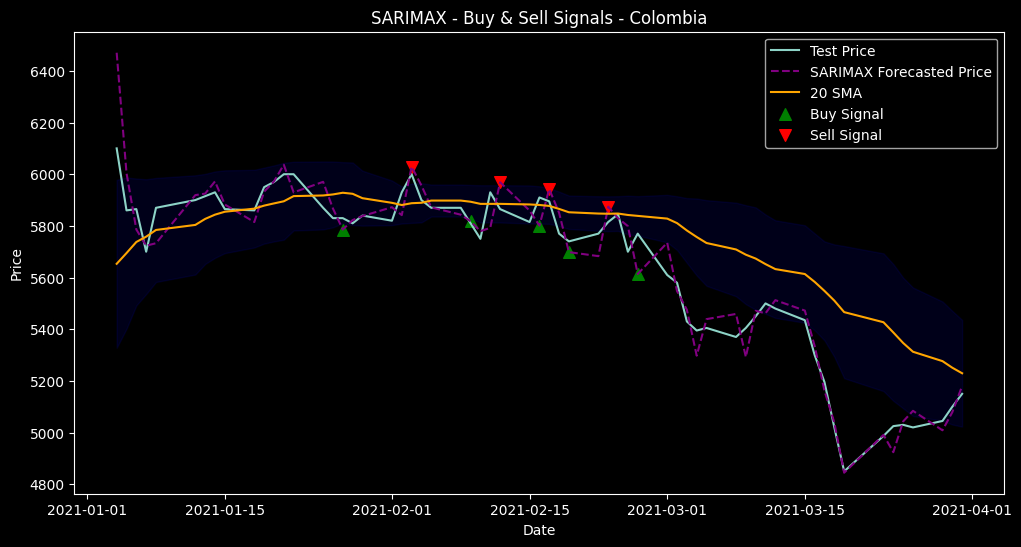

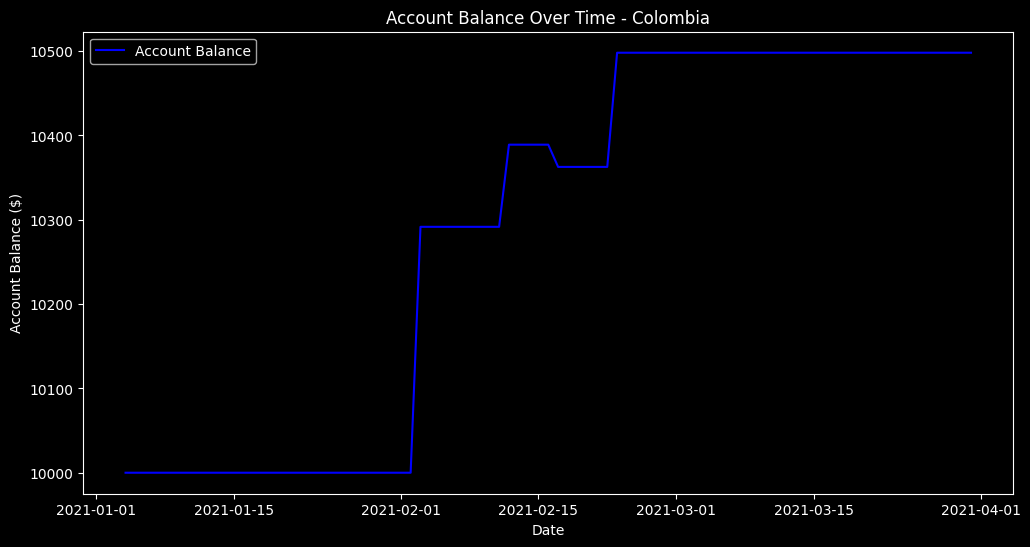

Number of trades: 4
Average hold time: 3.75 days
Average return per trade: 1.23%
Final account balance: $10498.05


Price  Open  High   Low  Change %  Volume (M)  Year  Month  \
Date                                                                      
2021-01-04  6100.0  6110  6160  5900   -0.0129    0.000455  2021      1   
2021-01-05  5860.0  6000  6000  5860   -0.0393    0.000457  2021      1   
2021-01-06  5865.0  5860  5955  5860    0.0009    0.000339  2021      1   
2021-01-07  5700.0  5860  5985  5700   -0.0281    0.000539  2021      1   
2021-01-08  5870.0  5805  5870  5790    0.0298    0.000155  2021      1   
...            ...   ...   ...   ...       ...         ...   ...    ...   
2021-03-25  5030.0  5035  5045  4950    0.0010    0.000317  2021      3   
2021-03-26  5020.0  5085  5085  4980   -0.0020    0.000203  2021      3   
2021-03-29  5045.0  5020  5045  5015    0.0050    0.000118  2021      3   
2021-03-30  5100.0  5010  5100  5010    0.0109    0.000584  2021      3   
2021-03-31  5150.0  5100  5170  5100    0.0098    0.000212  2021      3   

               Forecast Recommendation   Upper_Band   Lower_Band   20_SMA  
Date                                                                       
2021-01-04  6470.238387           Hold  5978.475731  5328.024269  5653.25  
2021-01-05  6004.787111           Hold  5987.605609  5401.894391  5694.75  
2021-01-06  5786.139710           Hold  5983.318487  5492.181513  5737.75  
2021-01-07  5723.355878           Hold  5980.477213  5536.022787  5758.25  
2021-01-08  5732.921416           Hold  5985.641704  5582.858296  5784.25  
...                 ...            ...          ...          ...      ...  
2021-03-25  5043.152186           Hold  5599.823948  5093.876052  5346.85  
2021-03-26  5084.195047           Hold  5561.521899  5064.178101  5312.85  
2021-03-29  5008.907390           Hold  5507.318877  5045.881123  5276.60  
2021-03-30  5078.682825           Hold  5470.958782  5031.241218  5251.10  
2021-03-31  5180.483410           Hold  5436.229697  5022.970303  5229.60  

[61 rows x 13 columns]

In [94]:
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
colombia =preprocess_dataframe(colombia)
sarimax_recommend (colombia, 'Colombia')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3973.469, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3975.306, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3975.309, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3971.787, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3977.309, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.680 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



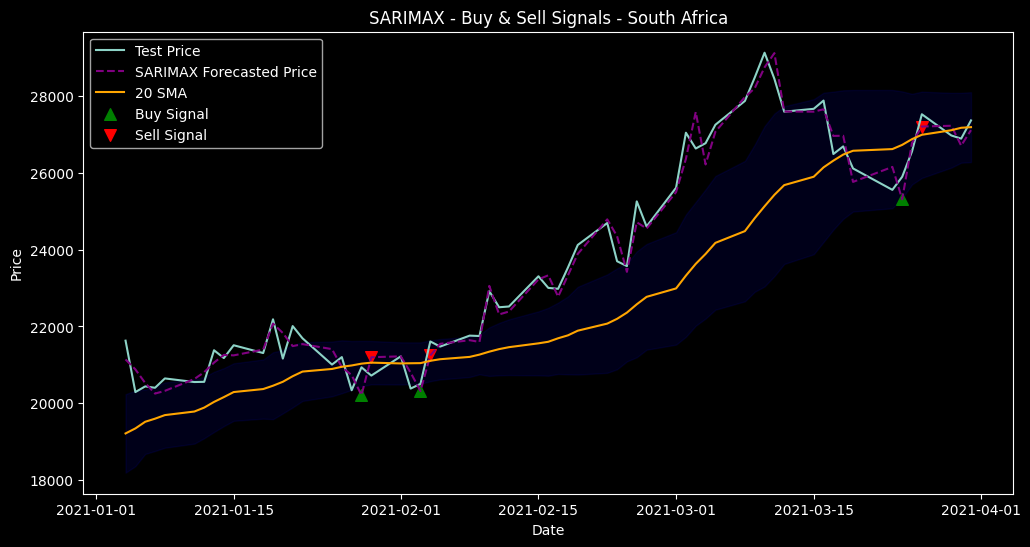

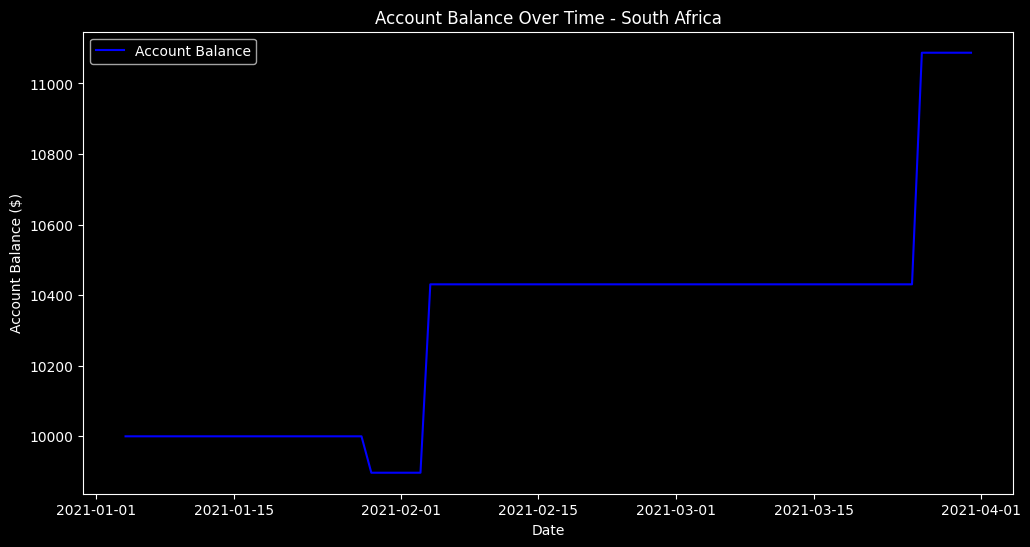

Number of trades: 3
Average hold time: 1.33 days
Average return per trade: 3.55%
Final account balance: $11087.09


Price   Open   High    Low  Change %  Volume (M)  Year  Month  \
Date                                                                          
2021-01-04  21629.0  20451  21629  20420    0.0713        1.79  2021      1   
2021-01-05  20288.0  21575  21598  20147   -0.0620        3.36  2021      1   
2021-01-06  20436.0  20650  21181  20290    0.0073        3.00  2021      1   
2021-01-07  20400.0  20495  20982  20126   -0.0018        3.05  2021      1   
2021-01-08  20644.0  20400  21039  19700    0.0120        3.09  2021      1   
...             ...    ...    ...    ...       ...         ...   ...    ...   
2021-03-25  26564.0  25954  27128  25954    0.0255        2.83  2021      3   
2021-03-26  27533.0  27083  28006  26728    0.0365        3.36  2021      3   
2021-03-29  26980.0  27800  28174  26614   -0.0201        4.44  2021      3   
2021-03-30  26898.0  26766  27443  26360   -0.0030        3.02  2021      3   
2021-03-31  27373.0  26980  27526  26657    0.0177        2.49  2021      3   

                Forecast Recommendation    Upper_Band    Lower_Band    20_SMA  
Date                                                                           
2021-01-04  21139.138014           Hold  20233.941281  18184.758719  19209.35  
2021-01-05  20879.229641           Hold  20324.296946  18356.103054  19340.20  
2021-01-06  20523.887519           Hold  20352.539895  18674.660105  19513.60  
2021-01-07  20248.636511           Hold  20437.182927  18751.717073  19594.45  
2021-01-08  20319.829920           Hold  20538.614502  18836.485498  19687.55  
...                  ...            ...           ...           ...       ...  
2021-03-25  26786.683015           Hold  28065.876055  25702.823945  26884.35  
2021-03-26  27213.718935           Sell  28123.057128  25872.842872  26997.95  
2021-03-29  27233.237874           Hold  28091.376055  26141.823945  27116.60  
2021-03-30  26714.748227           Hold  28091.748575  26269.451425  27180.60  
2021-03-31  27119.613177           Hold  28108.241164  26285.058836  27196.65  

[62 rows x 13 columns]

In [95]:
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
safrica =preprocess_dataframe(safrica)
sarimax_recommend (safrica, "South Africa")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3377.565, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3376.061, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3377.390, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3377.482, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3374.480, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3378.730, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.405 seconds


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



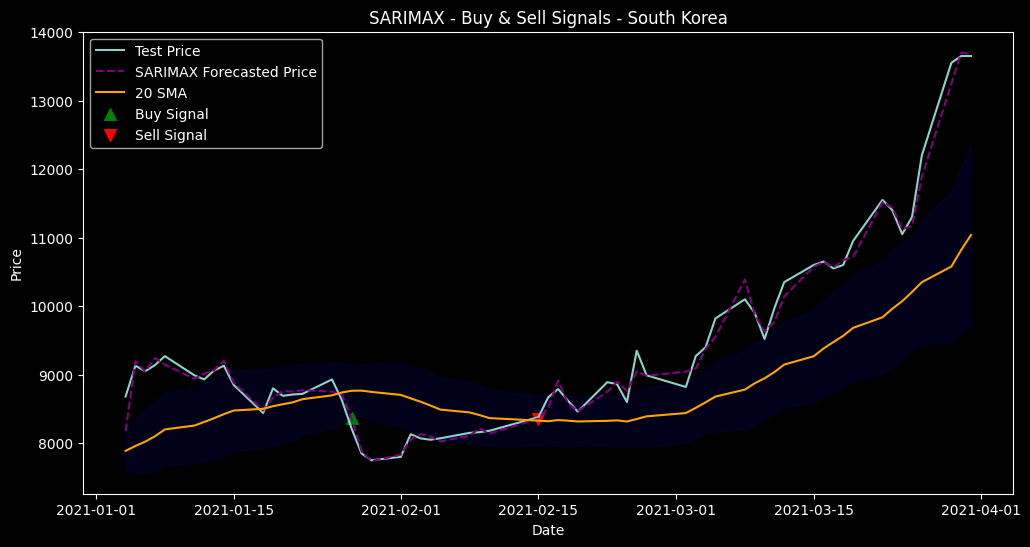

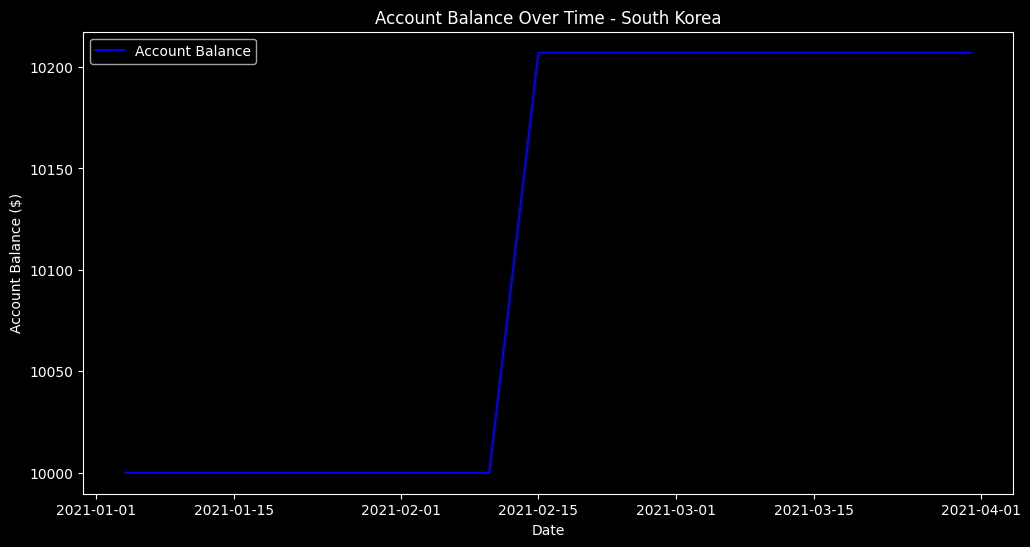

Number of trades: 1
Average hold time: 19.00 days
Average return per trade: 2.07%
Final account balance: $10207.06


Price   Open   High    Low  Change %    Volume (M)  Year  Month  \
Date                                                                            
2021-01-04   8680.0   8120   8690   7990    0.0690  9.630000e-06  2021      1   
2021-01-05   9130.0   8700   9560   8640    0.0518  2.000000e-08  2021      1   
2021-01-06   9050.0   9190   9300   8870   -0.0088  1.300000e-07  2021      1   
2021-01-07   9140.0   9180   9410   9120    0.0099  3.300000e-07  2021      1   
2021-01-08   9270.0   9150   9470   9050    0.0142  2.390000e+00  2021      1   
2021-01-11   8990.0   9270   9280   8670   -0.0302  2.110000e+00  2021      1   
2021-01-12   8930.0   8810   9200   8700   -0.0067  2.000000e-08  2021      1   
2021-01-13   9060.0   9040   9130   8910    0.0146  2.000000e-06  2021      1   
2021-01-14   9130.0   9330   9360   9100    0.0077  3.360000e-06  2021      1   
2021-01-15   8850.0   9160   9210   8840   -0.0307  8.224000e-04  2021      1   
2021-01-18   8440.0   8700   8740   8400   -0.0463  3.300000e-06  2021      1   
2021-01-19   8800.0   8520   8870   8410    0.0427  0.000000e+00  2021      1   
2021-01-20   8690.0   8940   8940   8520   -0.0125  9.897200e-04  2021      1   
2021-01-21   8710.0   8700   8820   8660    0.0023  1.000000e-08  2021      1   
2021-01-22   8720.0   8870   8950   8720    0.0011  7.910100e-04  2021      1   
2021-01-25   8930.0   8790   9000   8660    0.0241  1.600000e-07  2021      1   
2021-01-26   8630.0   8910   8910   8500   -0.0336  5.100000e-07  2021      1   
2021-01-27   8210.0   8610   8610   8180   -0.0487  2.200000e-07  2021      1   
2021-01-28   7850.0   8030   8030   7810   -0.0438  9.879700e-04  2021      1   
2021-01-29   7750.0   7880   7950   7480   -0.0127  9.032300e-04  2021      1   
2021-02-01   7800.0   7590   7840   7590    0.0065  4.484100e-04  2021      2   
2021-02-02   8130.0   7830   8220   7740    0.0423  7.116700e-04  2021      2   
2021-02-03   8070.0   8170   8210   7960   -0.0074  5.781300e-04  2021      2   
2021-02-04   8050.0   8100   8230   7990   -0.0025  5.386600e-04  2021      2   
2021-02-05   8070.0   8070   8170   7950    0.0025  4.375200e-04  2021      2   
2021-02-08   8150.0   8080   8220   7970    0.0099  4.590600e-04  2021      2   
2021-02-09   8160.0   8170   8270   8120    0.0012  3.952900e-04  2021      2   
2021-02-10   8180.0   8230   8260   8070    0.0025  3.804300e-04  2021      2   
2021-02-15   8380.0   8230   8470   8230    0.0244  9.328000e-04  2021      2   
2021-02-16   8670.0   8430   8670   8360    0.0346  6.000000e-08  2021      2   
2021-02-17   8790.0   8810   9110   8710    0.0138  3.900000e-07  2021      2   
2021-02-18   8620.0   8700   8790   8600   -0.0193  1.000000e-07  2021      2   
2021-02-19   8460.0   8630   8740   8300   -0.0186  8.224300e-04  2021      2   
2021-02-22   8890.0   8460   9070   8420    0.0508  4.820000e-06  2021      2   
2021-02-23   8860.0   8880   8990   8710   -0.0034  6.200000e-07  2021      2   
2021-02-24   8600.0   8910   9080   8570   -0.0293  6.000000e-08  2021      2   
2021-02-25   9350.0   8800   9440   8780    0.0872  5.220000e-06  2021      2   
2021-02-26   8990.0   9110   9230   8680   -0.0385  2.680000e+00  2021      2   
2021-03-02   8820.0   9110   9200   8710   -0.0189  1.200000e-07  2021      3   
2021-03-03   9270.0   8750   9780   8630    0.0510  1.090000e-06  2021      3   
2021-03-04   9400.0   9390   9500   9200    0.0140  2.800000e-07  2021      3   
2021-03-05   9820.0   9200   9890   9110    0.0447  2.630000e+00  2021      3   
2021-03-08  10100.0   9920  10700   9920    0.0285  1.220000e-06  2021      3   
2021-03-09   9900.0  10300  10550   9780   -0.0198  1.000000e-08  2021      3   
2021-03-10   9520.0  10050  10150   9510   -0.0384  1.500000e+00  2021      3   
2021-03-11   9970.0   9680  10100   9660    0.0473  2.150000e+00  2021      3   
2021-03-12  10350.0  10100  10450   9880    0.0381  1.740000e+00  2021      3   
2021-03-15  10600.0  10450  10700  10300    0

In [96]:
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
skorea =preprocess_dataframe(skorea)
sarimax_recommend (skorea, "South Korea")

##### Overall, using the SARIMAX model on a daily timefrime generated positive returns (although small) for all the markets. We only had one loss in Brazil. We recommended Buy, Hold and Sell decisions while maximizing capital returns and minimizing losses and hold perdiods.

##### Not a lot of signals are generated from just using the Bollinger Bands and SMA. In order to create more buy and sell signals, maximize capital returns and minimize losses, we can add more conditions to the recommendation system such as the Relative Strenght Index (RSI), a momentum oscillator that measures the speed and change of price movements. Traditionally the RSI is considered overbought when above 70 and oversold when below 30. We could also make trading decisions based on volume, since volume can indiate market strength.